# Mean field Floquet dynamics
Consider the Hamiltonian of the type
\begin{equation}
\hat{H}(t) = \hat{H}_0 + \left(h \cos{(\omega t)} + h_0\right)\; \hat{H}_1,
\end{equation}

where

\begin{eqnarray}
\hat{H}_0 &=& \sum_{ij}J_{ij}\hat{\sigma}^z_i\hat{\sigma}^z_j,\\
\hat{H}_1 &=& \sum_i\hat{\sigma}^x_i.
\end{eqnarray}
here,
\begin{eqnarray}
J_{ij} =\frac{J_\alpha}{N^{1-\alpha}}\sum_{(i<j)}^{N}\frac{1}{r_{ij}}=1\\
\end{eqnarray}
Putting  $\alpha = 0$ for all-to-all interaction we get,
\begin{eqnarray}
J_{ij} =\frac{J_0}{N}C^N_2=\frac{J_0}{N}\frac{N(N-1)}{2}=1\\
J_0 = \frac{2}{N-1}=KacN
\end{eqnarray}
Here, we have $N$ spin-$1/2$ particles in a $1-$dimensional lattice, and $i,j$ are site indices. We will now attempt a numerical evaluation of
the Floquet eigenspectrum of this system.

First, define permutation operator $P_{ij} = \displaystyle\frac{1}{2}\left(1+ \vec{\sigma}_i\cdot\vec{\sigma}_j\right)$,
and note that $[P_{ij}, H]=0$. Thus, we can reduce the problem size from the full $2^N\times 2^N$ Hilbert space
to the subspace spanned by the degenerate eigenvectors of $P_{ij}$ corresponding to a single eigenvalue, say $1$.
This is isomorphic to the subspace spanned by degenerate eigenstates of the operator $S^2=|\vec{S}|^2$ with eigenvalue
$\displaystyle\frac{N}{2}\left(\frac{N}{2}+1\right)$, where

\begin{equation}
\vec{S}=S^x\hat{x}+S^y\hat{y}+S^z\hat{z}\equiv \sum_i \vec{\sigma}_i.
\end{equation}

Note that, since $[S^2, S^z]=0$, these are also eigenstates of $S^z$ in this so-called
TSS subspace. The corresponding eigenvalues are $Ns_n$, where $s_n=-\frac{1}{2}+\frac{n}{N}$ and the index
$n= 0 (1) N$ has $N+1$ values. Thus

\begin{equation}
S^z |s_n\rangle = Ns_n|s_n\rangle,
\end{equation}

and the matrix elements $(S^z)_{ij} = Ns_s\delta_{ij}$. Furthermore, defining ladder operators

\begin{equation}
S_\pm \equiv S^x \pm i S^y,
\end{equation}

and using the result

\begin{equation}
S_\pm |s_n\rangle = \sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_n\left(Ns_{n\pm 1}\right)}\;\;|s_{n\pm 1}\rangle,
\end{equation}

we can obtain the matrix elements $S^x = S_+ + S_-$ to be

\begin{multline}
(S^x)_{nm} = \frac{1}{2}\bigg[\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_n\left(Ns_{n + 1}\right)}\;\;\delta_{n+1, m}  \\
                        +\;\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_n\left(Ns_{n- 1}\right)}\;\;\delta_{n-1,m}\bigg]
\end{multline}

Note that, condidering $i<j$ the Hamiltonian can be readily written as
$H(t) = -\displaystyle\frac{2}{N-1}(S^z)^2 - (h \cos{(\omega t )} + h_0)S^x$, the matrix elements of
\begin{eqnarray}
\left(H_0\right)_{ij} &=& -\frac{2}{N-1} s^2_i \delta_{ij},\nonumber\\
\left(H_1\right)_{ij} &=& \bigg[\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_i\left(Ns_{i + 1}\right)}\;\;\delta_{i+1, j}  \\
    & &                     +\;\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_i\left(Ns_{i- 1}\right)}\;\;\delta_{i-1,j}\bigg]
\end{eqnarray}

Note that, in the continuum limit, $N\rightarrow\infty$, we can ignore the difference between adjacent values
of $s_i$. Thus, the Hamiltonian per particle becomes $h(t)\equiv \displaystyle\frac{1}{N}H(t) = h + h_0\cos{(\omega t)}h_1$, where

\begin{eqnarray}
\left(h\right)_{ij} &\approx& - 2s^2_i \delta_{ij},\nonumber\\
H_0 &\rightarrow& -2s^2\\
\left(h_1\right)_{ij} &\approx& \sqrt{1 - 4s^2_i}\left[\delta_{i+1, j}  + \delta_{i-1,j}\right]\\
H_1 &\rightarrow& \sqrt{1 - 4s^2_i}\;\;\cos{p},
\end{eqnarray}
where we have expanded the matrix elements in a basis of $e^{ipx}$. In this limit, we obtain the Lipkin Model (Insert from previous notebook)
.


References:

[1] Check T. Mori's paper equation (12)

running for N =  30 with 4 processors


/home/mahi/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


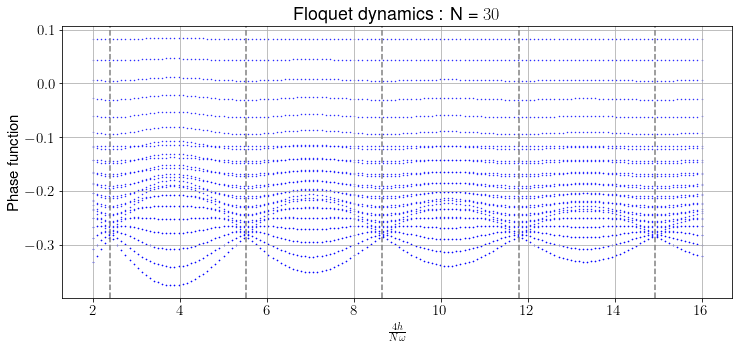

time taken 4.9714495221773785 minute


In [49]:
# Here I have tried to use nearest valued phasefunction

#   Here I have used scatter plot again, but the datafile created here is used 
#   for normal data-curve plotting in codes bellow.

import numpy as np
from odeintw import odeintw
import matplotlib.pyplot as plt
from multiprocessing import Pool
from numpy.linalg import multi_dot, norm, eig
from scipy.special import jn_zeros
import math
import time
start = time.time()

from collections import Counter
# Bessel's root of first order
# 2.40482555769577	5.52007811028631	8.65372791291101	11.7915344390142	14.9309177084877

plt.rcParams.update({
    #"figure.figsize": (16, 12),
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 15,
    "font.sans-serif": ["Helvetica"]})
freezing_pts = jn_zeros(0, 5)

N = 30
kacN = 2/(N-1)
h0 = 0.1
omega = 90
w = omega
tsteps = 200

hsteps = 150
h1 = (N/4) * omega * 2.0
h2 = (N/4) * omega * 16.
hs = np.linspace(h1, h2, hsteps)
hpp = (np.ones((N+1,len(hs))) * hs).T
psi = np.eye(N+1) + 1j * np.zeros((N+1,N+1))
H1 = np.zeros((N+1,N+1))

plotname = 'floquet_dynamics_'+str(N)+'.jpeg'
filename = 'floquet_dynamics_N' + str(N) +'_.jpeg'

def delta_func(x,y):
        if ( x == y ):
            return 1.0
        else:
            return 0.0
        
def find_nearest(a, a0):
    "Element in nd array `a` closest to the scalar value `a0`"
    idx = np.abs(a - a0).argmin()
    return a.flat[idx]

def mode_value(sample):
    c = Counter(sample)
    return [k for k, v in c.items() if v == c.most_common(1)[0][1]]
        
def floq_jac(psi0, t, h, h0, H1, H0, w):    
    drive = h0 + h * np.cos(w * t)
    jac = 1j * (H0 + drive * H1)/N    
    return jac
        
def floq_func(psi0, t, h, h0, H1, H0, w):
    floq_h = np.dot(floq_jac(psi0, t, h, h0, H1, H0, w), psi0)
    return floq_h

def floq_evolv(psi,H0,H1,h,w):
    T = 2 * np.pi/w                                  
    t = np.linspace(0,T,tsteps)                   
    floqEvolution_mat = np.zeros((N+1,N+1)) + 1j * np.zeros((N+1,N+1))
    
    for m in np.arange(N+1):
        psi0 = psi[m]
        psi_t = odeintw(floq_func,psi0,t,args=(h, h0, H1, H0, w))
        floqEvolution_mat[m] = psi_t[-1]        
    evals, evecs = eig(floqEvolution_mat)
    phasefunc = 1j * np.log(evals + 1j * 0) * w/(2 * np.pi)
    return [h,phasefunc.real,evecs]

if __name__ == '__main__':
    nprocs = 4
    p = Pool(processes = nprocs)          
    print("running for N = ", N, "with",nprocs,"processors")
    start = time.time()       
   
    spin = 0.5 * np.arange(N+1)[-1]
    s = np.arange(-spin,spin+1) 
    H0 = np.diagflat(s **2*kacN)  
    for i in range(N+1):
        for j in range(N+1):
            H1[i][j] = (np.sqrt(spin * (spin+1) - s[i] * (s[i]+1)) * delta_func(s[j],s[i]+1)\
                              + np.sqrt(spin * (spin+1) - s[i] * (s[i]-1)) * delta_func(s[j],s[i]-1))
    
    data1 = p.starmap(floq_evolv,[(psi,H0,H1,h,w) for h in hs])
    data = np.asarray(data1,dtype=None).reshape((len(hs),3))
    h_f = data[:,[0]]
    phs_f = data[:,[1]]
    evec_f = data[:,[2]]
    
    plt.figure(figsize = (12,5))
    for xx in np.arange(len(hs)):
        plt.scatter(4 * hpp[xx] /(N*w), phs_f[xx][0].real,\
                    color = 'blue', marker='.', s = 0.8)
    plt.title(r'Floquet dynamics : N = $%3d$'%N)  
    plt.xlabel(r'$\frac{4h}{N\omega}$')
    plt.ylabel(r'Phase function')
    plt.grid()
    #plt.savefig(filename,dpi=300)
    
    for pt in freezing_pts:
        plt.axvline(x=pt, color='gray', linestyle="--")
    
    plt.show()
print('time taken',(time.time()-start)/60,'minute')

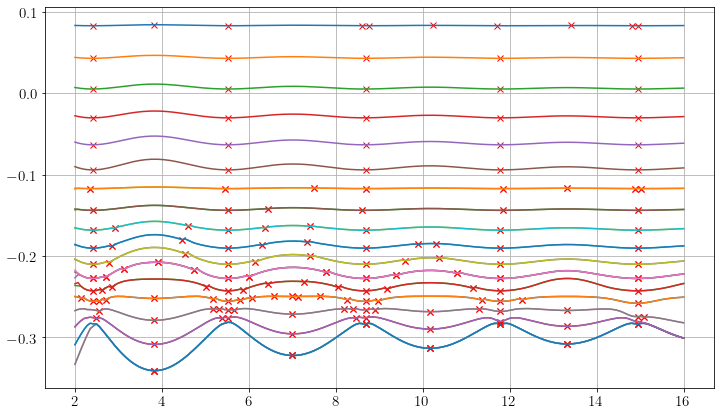

mode is [8.982845260786691]


In [65]:
###### for curve plot do as algorithm below---

plt.figure(figsize = (12,7))
prob = np.zeros(N+1)
valley = []
for j in range(N+1):    
    hh = np.zeros(hsteps)
    ph = np.zeros(hsteps)
    hh[0] = data1[0][0]
    ph[0] = data1[0][1][j]
    prev_ph = data1[0][1][j]
    for i in range(1,hsteps):
        hh[i] = data1[i][0]
        ph[i] = find_nearest(data[i][1],np.array([prev_ph]))        
        prev_ph = ph[i]
    a = (np.diff(np.sign(np.diff(ph))) > 0).nonzero()[0] + 1
    #print('a=',2 * hh[a] * kacN/omega)
    valley = np.hstack((valley,(2 * hh[a] * kacN/omega)))
    plt.plot(4 * hh[a]/(omega*N),ph[a], 'x',color='r')
    plt.plot(4 * hh/(omega*N) ,ph)
plt.grid()
plt.show()

mode_vl = mode_value(valley)
print('mode is',mode_vl)

# Floquet dynamics with harmonic oscillator operator formulation

running for N = 30


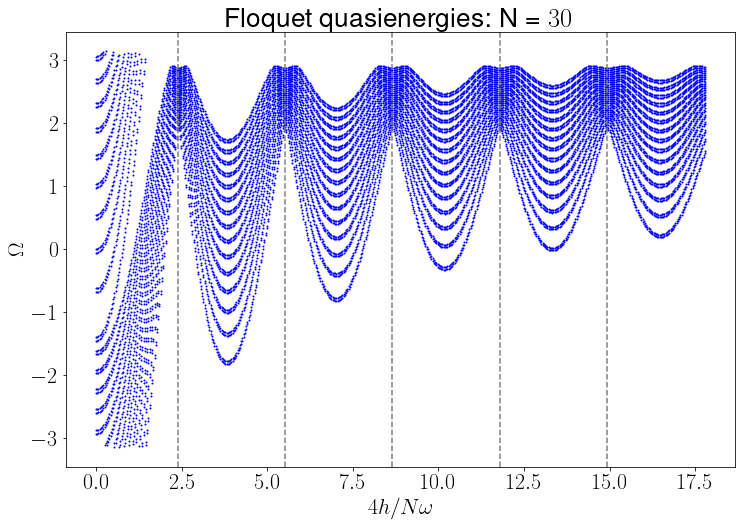

In [37]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Oct 17 22:32:38 2021
Copyright 2021 Analabha Roy (daneel@utexas.edu):
Released under the MIT license @ https://opensource.org/licenses/MIT
"""
from scipy.special import j0
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn_zeros
freezing_pts = jn_zeros(0, 5)

plt.rcParams.update({
    "figure.figsize": (10, 10),
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 22,
    "font.sans-serif": ["Helvetica"]})

N = 30
trunc = 320
dc = 0.0
hsteps = 500
omega = 90.0
args = {'w': omega}
A_vec = np.linspace(0,400, hsteps)

n_arr = np.arange(trunc)
n_arr_2 = np.arange(trunc-2)

q_energies = []

for h in A_vec:
    a = j0(4*h/omega)
    H = np.diagflat(n_arr + 0.5) + 0.5* a * (np.diagflat(np.sqrt((n_arr_2+1) * (n_arr_2+2)),2) +\
                                             np.diagflat(np.sqrt(n_arr_2 * (n_arr_2-1)),-2))
    
    evals = np.linalg.eigvalsh(-H/N)
    q_energies.append(-(1j) * np.log(np.exp(1j * evals)))

q_energies = np.array(q_energies).real

print('running for N =',N)    
plt.figure(figsize=(12,8))
for i in np.arange(N):
    plt.scatter(4*A_vec/omega, q_energies[:,i],c='blue', s=1)
    
for pt in freezing_pts:
    plt.axvline(x=pt, color='gray', linestyle="--")
    
plt.xlabel(r'$4h/N\omega$')
plt.ylabel(r'$\Omega$')
plt.title(r'Floquet quasienergies: N = $%3d$'%N)
plt.show()

### Hilbert Space: LMG model

The Hamiltonian is

\begin{align*}
\mathcal{H}=\frac{2}{N}& \sum_{ij} \hat{S^z}_i \hat{S^z}_j -\sum_i \hat{S^x}_i
\end{align*}


To cconstruct the first part of Hamiltonian i.e. $H_0$ we have devided the $H_0$ in five parts. 
\begin{equation*}
\leftarrow (i-0) \rightarrow \leftarrow \hat{S_z}\rightarrow \leftarrow (j-i-1)\rightarrow \leftarrow \hat{S_z}\rightarrow\leftarrow [(N-1)-j]\rightarrow
\end{equation*}

To realize $H_0$ in hilbert space we do

identity operator of dimenstions $2^{(i-0)} \otimes \hat{S_z} \otimes$ identity operator of dimenstions $2^{(j-i-1)} \otimes \hat{S_z} \otimes$ identity operator of dimenstions $2^{[(N-1)-j]}$


And H1 in hilbert space is
identity operator of dimenstions $2^{i-0} \otimes \hat{S_x}$ identity operator of dimenstions $2^{N-1-i}$ 

running for N= 10  omega 90  with 2  processors!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 1054.38it/s]


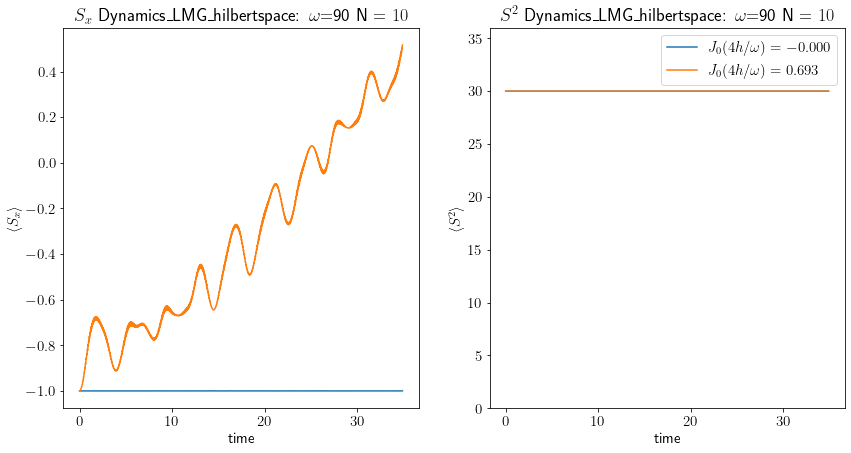

run complete!!
CPU times: user 3.94 s, sys: 1.96 s, total: 5.89 s
Wall time: 1min 25s


In [1]:
%%time
import numpy as np
from multiprocessing import Pool
from qutip import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.special import j0, jn_zeros

freezing_pts = jn_zeros(0, 5)

sigx = 0.5 * np.array([[0,1],[1,0]])
sigy = 0.5 * np.array([[0,-1j],[1j,0]])
sigz = 0.5 * np.array([[1,0],[0,-1]])

plt.rcParams.update({
    "figure.figsize": (15,9),"text.usetex": True,"font.family": "sans-serif",
    "font.size": 15,"font.sans-serif": ["Computer Modern"]})

def drive(t, args):
    h0 = args['h0']
    h = args['h']
    w = args['omega']
    return h0 + h * np.cos(w * t)

def get_floquet_zzx(N, args):
    H0, H1, sx, sy, sz = [], [], [], [], []

    
    for i in range(N-1):
        for j in range(i+1,N):
            H0.append(np.kron(np.eye(2**(i-0)),\
                              np.kron(sigz,np.kron(np.eye(2**(j-i-1)),np.kron(sigz,np.eye(2**(N-1-j))))))) 
    
    for i in range(N):
        sx.append(np.kron(np.eye(2**(i-0)),np.kron(sigx,np.eye(2**(N-1-i)))))
        
    for i in range(N):
        sy.append(np.kron(np.eye(2**(i-0)),np.kron(sigy,np.eye(2**(N-1-i)))))
        
    for i in range(N):
        sz.append(np.kron(np.eye(2**(i-0)),np.kron(sigz,np.eye(2**(N-1-i)))))
    
    #beta = 0.0
    #kacN = 2 * sum([(1/j**beta) for j in range(int(np.floor(N/2)))])     # Emch Radin KacN
    
    kacN = 2/N
    
    H0 = kacN * sum(H0) * 4
    H1 = sum(sx) * 2
    
    return H0, H1, sx, sy, sz

def run_lmg_dynm(h0,h,w,N,times):
    params = {'h0':0.0, 'h':h, 'omega':w} 
    
    H0, H1, sx, sy, sz = get_floquet_zzx(N, params)
    H0, H1, Sx, Sy, Sz = Qobj(H0), Qobj(H1), Qobj(sum(sx)), Qobj(sum(sy)), Qobj(sum(sz))
    
    H = [H0,[H1,drive]]

    en, st = Sx.eigenstates()
    a = np.where(np.isclose(en, min(en)))   # Find ground state energy level number
    
    grket = st[a[0][0]]
    
    S2 =  Sx * Sx + Sy * Sy + Sz * Sz
    out = mesolve(H, grket, times, [], [H1/N, S2], args = params)
    
    return out.expect

N = 10
h0 = 0.0
w = 90      # omega: drive frequency
T = 2 * np.pi/w
times = np.linspace(0, 500 * T, 10000)

h1 = (1/4) * w * freezing_pts[0]
h2 = 26.0
hs = [h1,h2]

nprocs = 2
p = Pool(processes = nprocs)
print("running for N=",N," omega",w," with", nprocs," processors!")
data = np.array(p.starmap(run_lmg_dynm,tqdm([(h0,h,w,N,times) for h in hs])))

###################            LETS PLOTS DATA         ##########################

fig, axs = plt.subplots(1, 2, sharex='col', figsize=(14,7))

lbl1 = r"$J_0(4h/\omega)={:1.3f}$".format(j0(4*hs[0]/w))
lbl2 = r"$J_0(4h/\omega)={:1.3f}$".format(j0(4*hs[1]/w))
lbl = [lbl1,lbl2]

## S_x plot

for i in range(len(hs)):
    axs[0].plot(times,data[i][0],label=lbl[i])

axs[0].set_title(r'$S_x$ Dynamics_LMG_hilbertspace: $\omega$=90 N =  $%3d$'%N)
axs[0].set_xlabel("time")
axs[0].set_ylabel(r"$\langle S_x\rangle$")
#axs[0].legend()

## S^2 plot

for i in range(len(hs)):
    axs[1].plot(times,data[i][1],label=lbl[i])

axs[1].set_title(r'$S^2$ Dynamics_LMG_hilbertspace: $\omega$=90 N =  $%3d$'%N)
axs[1].set_xlabel("time")
axs[1].set_ylabel(r"$\langle S^2\rangle$")

s2range = N/2 *(N/2 +1)
axs[1].set_ylim(0, s2range + s2range /5)
axs[1].legend()

#figname = "sx_s2_lmg_N" + str(N) +".svg"
#plt.savefig(figname, dpi = 300)
plt.show()
print("run complete!!")

running for TSS spin= 7  omega 90.0  with 2  processors!


100%|█████████████████████████████████████████| 100/100 [00:26<00:00,  3.76it/s]


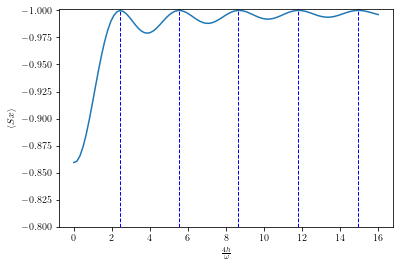

CPU times: user 7.36 s, sys: 921 ms, total: 8.28 s
Wall time: 1min 32s


In [2]:
%%time
import numpy as np
from multiprocessing import Pool
from qutip import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.special import j0, jn_zeros
from numpy.linalg import eigh

plt.rcParams.update({
    "figure.figsize": (14,7),"text.usetex": True,"font.family": "sans-serif",
    "font.size": 20,"font.sans-serif": ["Computer Modern"]})

sigx = 0.5 * np.array([[0,1],[1,0]])
sigy = 0.5 * np.array([[0,-1j],[1j,0]])
sigz = 0.5 * np.array([[1,0],[0,-1]])

def drive(t, args):
    h0 = args['h0']
    h = args['h']
    w = args['omega']
    return h0 + h * np.cos(w * t)

def get_ham_lmg(N):
    H0, H1, sx, sz = [], [], [], []

    for i in range(N-1):
        for j in range(i+1,N):
            H0.append(np.kron(np.eye(2**(i-0)),\
                              np.kron(sigz,np.kron(np.eye(2**(j-i-1)),\
                                                   np.kron(sigz,np.eye(2**(N-1-j))))))) 
    
    for i in range(N):
        sx.append(np.kron(np.eye(2**(i-0)),np.kron(sigx,np.eye(2**(N-1-i)))))
        
    for i in range(N):
        sz.append(np.kron(np.eye(2**(i-0)),np.kron(sigz,np.eye(2**(N-1-i)))))
        
    kacn = 2/N    
    Sx, Sz = sum(sx), sum(sz)
    
    
    H0 = kacn * sum(H0) * 4
    H1 = Sx * 2
    H0, H1, Sx, Sz = Qobj(H0), Qobj(H1), Qobj(Sx), Qobj(Sz)
    return H0, H1, Sx

def run_lmg_ipr(h,omega,T,H0, H1, Sx, nstp): 
    opts = Options(nsteps = nstp)
    params = {'h0':0.0, 'h':h, 'omega':omega}
    times = np.linspace(0,10 * T,nstp)
   
    H = [H0,[H1,drive]]
    
    en, st = H1.eigenstates()
    pp = np.where(np.isclose(en, min(en)))
    grket = st[pp[0][0]]
    out = mesolve(H, grket, times, [],\
                         [H1/N], args = params, options=opts)
    
    return np.average(out.expect)


freezing_pts = jn_zeros(0, 5)

# number of spins
N = 7       
omega = 90.0
w = omega
T = 2* np.pi/w

nstp = 1000
h_fac = 4
h1 = w/h_fac * 0.0
h2 = w/h_fac * 16.0
hsteps = 100
hs = np.linspace(h1,h2,hsteps)

H0, H1, Sx = get_ham_lmg(N)

nprocs = 2
p = Pool(processes = nprocs)
print("running for TSS spin=",N," omega",w," with", nprocs," processors!")

data = np.array(p.starmap(run_lmg_ipr,tqdm([(h,omega,T,H0, H1, Sx, nstp) for h in hs])))

for pt in freezing_pts:
    plt.axvline(x=pt, color='blue', linestyle="--",linewidth=1.0)

plt.plot(4 * hs/omega ,data)
plt.ylim(-.8,-1.001)
plt.xlabel(r"$\frac{4h}{\omega}$")
plt.ylabel(r"$\langle Sx \rangle$")
plt.show()

## TSS

## Relation between  :  TSS and Hilbert Space 

Now we have to understand the relation between Totally Symmetric Subspace (TSS) and Hilbert space representaion.
In Hilbert space spin-1/2 case,TSS corresponds to the subspace with maximum total spin length, $\hat{S}^2_{tot} = (N/2)(N/2+1)$ with $\hat{S}_{tot}:=\sum^N_{i=1}\hat{\sigma}_i/2$. 

Within the TSS, the model with $\alpha = 0$ can be considered to be a seclassical syste, with the effective Planck constant $\hbar_{eff}=1/N$. In the spin-1/2 system, any state $|\Psi(t)\rangle$ in the TSS is expanded as $|\Psi(t)\rangle =\sum_q \Psi_t (q)|q\rangle$, where $|q\rangle$ is a simultaneuous eigenstate of $\hat{S^2}_{tot}$ and $\hat{S^z}_{tot}$ with eigenvalues(N/2)(N/2+1) and Nq respectively, where $Nq \epsilon {-N/2, -N/2+1,.... ,N/2}$. 

We know in general, the for considered spin $"s"$ for which $\hat{S^2} = s(s+1)$.
Now for Hilbert space spin 1/2 system (i.e. q= 1/2) with N spin lattice point we have $Nq= N/2$ and it ranges in between {$-N/2, -N/2+1,.... ,N/2$}. This is the case where $\hat{S^2}_{tot}= (N/2)(N/2+1)$.

So when we are numerically (in computer) studying LMG model which is basically in Hilbert space, the Hamiltonian becomes ($2^N \times 2^N$) matrix. So when we take larger system size with larger N. The computer RAM memory is never sufficient (till today's technology). We canover come this problem using TSS.

In Hilbert space representation, we take a long spin-1/2 chain with spin lattice size N and we usually sum up all the possible two spin orientations all over the spin chain. For this case considered spin is $s = N/2$. 

In TSS we find spin "s" and corresponding $\hat{S^2} = s(s+1), and \hat{S^x}, \hat{S^y}, \hat{S^z}$

So to get consistency in TSS and Hilber space we have to do


<ol>
<li> Hilbert space spin length $N_{Hilbert}$ = TSS spin $\frac{N_{TSS}}{2}$ </li>
<li> In TSS to get $\hat{S}_{tot}:=\sum^N_{i=1}\hat{\sigma}_i/2$</li>
<ol>
    
    
Our Hamiltonian is 
    
\begin{align*}
\mathcal{H} =& \frac{N}{2}H_0 + H_1\\
    =& \frac{N}{2}\hat{S^z}\hat{S^z} + 2 \times \hat{S^x_{tot}}
\end{align*}
    
Here we shall put $H_0 = \hat{S^z}\hat{S^z} $ and $H_1 = 2 \times \hat{S^x_{tot}}$ (from (2))

### Compare TSS and LMG

running for TSS spin= 5.0  omega 90  with 2  processors!


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 369.10it/s]


running for LMG N= 10  omega 90  with 2  processors!


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 328.36it/s]


CPU times: user 590 ms, sys: 62.6 ms, total: 652 ms
Wall time: 3min 57s


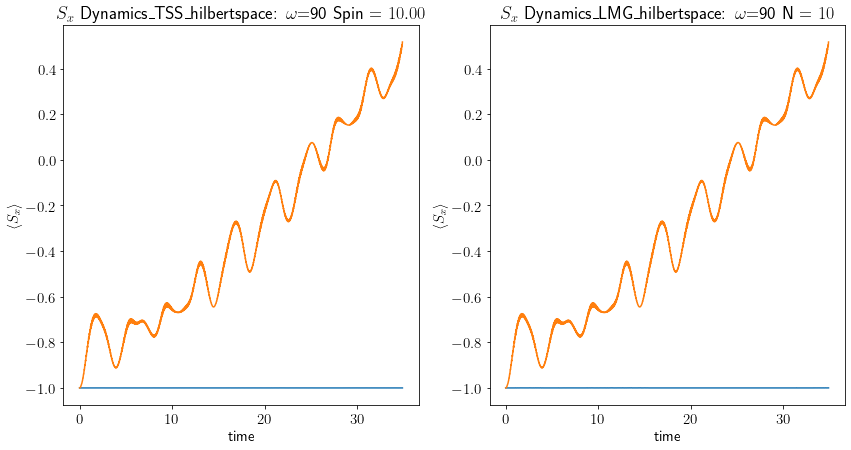

In [4]:
%%time
from qutip import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from multiprocessing import Pool
from scipy.special import j0, jn_zeros
import numpy as np
freezing_pts = jn_zeros(0, 5)

sigx = 0.5 * np.array([[0,1],[1,0]])
sigy = 0.5 * np.array([[0,-1j],[1j,0]])
sigz = 0.5 * np.array([[1,0],[0,-1]])

def drive(t, args):
    h0, h, w = args['h0'], args['h'], args['omega']
    return h0 + h * np.cos(w * t)

def get_ham_tss(N):
    sx,sy,sz = jmat(N,"x"),jmat(N,"y"),jmat(N,"z")
    kn =  2.0/N
    H0 = kn * sz **2
    H1 = 2 * sx
    return H0,H1,sx,sy,sz

def run_dynm_tss(h,omega,times,N_tss):
    N = N_tss
    params = {'h0':0.0, 'h':h, 'omega':omega}
        
    H0, H1, Sx, Sy, Sz = get_ham_tss(N)
    
    en, st = (H1).eigenstates()
    #a = np.where(np.isclose(en, 1.0, rtol=1e-05, atol=1e-08))
    #print("en",en,"\npoint\n", a[0][0])
    a = np.where(np.isclose(en, min(en)))
    grket = st[a[0][0]]
    
    H = [H0,[H1,drive]]

    S2 =  Sx * Sx + Sy * Sy + Sz * Sz 
    out = mesolve(H, grket, times,[], [H1/(2*N), S2], args = params)
    return out.expect


def get_floquet_zzx_lmg(N_lmg, args):
    H0, H1, sx, sy, sz = [], [], [], [], []
    N = N_lmg
    
    for i in range(N-1):
        for j in range(i+1,N):
            H0.append(np.kron(np.eye(2**(i-0)),\
                              np.kron(sigz,np.kron(np.eye(2**(j-i-1)),np.kron(sigz,np.eye(2**(N-1-j))))))) 
    
    for i in range(N):
        sx.append(np.kron(np.eye(2**(i-0)),np.kron(sigx,np.eye(2**(N-1-i)))))
        
    for i in range(N):
        sy.append(np.kron(np.eye(2**(i-0)),np.kron(sigy,np.eye(2**(N-1-i)))))
        
    for i in range(N):
        sz.append(np.kron(np.eye(2**(i-0)),np.kron(sigz,np.eye(2**(N-1-i)))))
    
    kacN = 2/N
    
    H0 = kacN * sum(H0) * 4
    H1 = sum(sx) * 2
    
    return H0, H1, sx, sy, sz

def run_lmg_dynm(h0,h,w,N_lmg,times):
    N = N_lmg
    params = {'h0':0.0, 'h':h, 'omega':w} 
    
    H0, H1, sx, sy, sz = get_floquet_zzx_lmg(N, params)
    H0, H1, Sx, Sy, Sz = Qobj(H0), Qobj(H1), Qobj(sum(sx)), Qobj(sum(sy)), Qobj(sum(sz))
    
    H = [H0,[H1,drive]]

    en, st = H1.eigenstates()
    a = np.where(np.isclose(en, min(en)))   # Find ground state energy level number
    
    grket = st[a[0][0]]
    
    S2 =  Sx * Sx + Sy * Sy + Sz * Sz
    out = mesolve(H, grket, times, [], [H1/N, S2], args = params)
    
    return out.expect


if __name__ == '__main__':
    
    N = 10
    N_tss = N/2.0             #total spin in TSS
    h0 = 0.00
    omega = 90
    w = omega
    T = 2 * np.pi/w
    hs = [(1/4) * omega * freezing_pts[2], 26]
    times = np.linspace(0, 500 * T, 50000)
    nprocs = 2
    p = Pool(processes = nprocs)
    print("running for TSS spin=",N_tss," omega",w," with", nprocs," processors!")
    
    data_tss = np.array(p.starmap(run_dynm_tss,tqdm([(h,omega,times,N_tss) for h in hs])))
    
    
    fig, axs = plt.subplots(1, 2, sharex='col', figsize=(14,7))

    lbl1 = r"$J_0(4h/\omega)={:1.3f}$".format(j0(4*hs[0]/w))
    lbl2 = r"$J_0(4h/\omega)={:1.3f}$".format(j0(4*hs[1]/w))
    lbl = [lbl1,lbl2]

    for i in range(len(hs)):
        axs[0].plot(times,data_tss[i][0],label=lbl[i])

    axs[0].set_title(r'$S_x$ Dynamics_TSS_hilbertspace: $\omega$=90 Spin =  $%4.2f$'%N)
    axs[0].set_xlabel("time")
    axs[0].set_ylabel(r"$\langle S_x\rangle$")
    #axs[0].legend()
    
    
    #--------------------lmg
    N_lmg = N                          # spin chain lenth
    h0 = 0.0
    #w = 90      # omega: drive frequency
    #T = 2 * np.pi/w
    #times = np.linspace(0, 5 * T, 1000)

    h1 = (1/4) * w * freezing_pts[0]
    h2 = 26.0
    hs = [h1,h2]

    nprocs = 2
    p = Pool(processes = nprocs)
    print("running for LMG N=",N_lmg," omega",w," with", nprocs," processors!")
    data_lmg = np.array(p.starmap(run_lmg_dynm,tqdm([(h0,h,w,N_lmg,times) for h in hs])))
    
    lbl1 = r"$J_0(4h/\omega)={:1.3f}$".format(j0(4*hs[0]/w))
    lbl2 = r"$J_0(4h/\omega)={:1.3f}$".format(j0(4*hs[1]/w))
    lbl = [lbl1,lbl2]

    ## S_x plot

    for i in range(len(hs)):
        axs[1].plot(times,data_lmg[i][0],label=lbl[i])

    axs[1].set_title(r'$S_x$ Dynamics_LMG_hilbertspace: $\omega$=90 N =  $%3d$'%N)
    axs[1].set_xlabel("time")
    axs[1].set_ylabel(r"$\langle S_x\rangle$")
    #axs[0].legend()

# Introduction

Dynamical Freezing (DMF) is a phenomenon whereby periodically driven Many Body Systems are prevented from thermalizing to infinite temperature due to a dynamical hysteresis that prevents observables from reaching their diagonal averaged values.

DMF can, under certain resonance conditions in the drive parameters, cause the response to ‘freeze’ completely to its initial value for all times. This has been demonstrated (via the Jordan-Wigner Transformation) in the driven TFIM with nearest neighbour interactions, and is shown to be protected when translational invariance is explicitly broken (say, by disorder). 

We have suspected that this is also protected against the loss of other symmetries, for example, in long range systems where JW transformation produces nonlocalities. To prove this, we introduce a long-range power law dependence in the TFIM, where the exchange $J_{ij}\sim 1/|i-j|^\beta$. Here, for $\beta=\infty$, we recover the short range TFIM and freezing at resonant drive parameters. When $\beta=0$, taking $N\rightarrow\infty$ allows us to describe the exact dynamics by the periodically driven Lipkin-Meshkov-Glick (LMG) model, which we have solved numerically to obtain a similar kind of DMF and ‘freezing’ as the$\beta=\infty$ case.

Now, we compare the degree of localization of the quasi-stationary Floquet modes in both cases. In order to do so, we look at the Inverse Participation Ratios (IPR) of the modes in the representation given by the eigenstates of the symmetry-breaking field. 

What we're seeing is that there appears to be a high degree of localization in the TFIM case, as consistent with analytical treatments using the Rotated Wave Approximation (RWA), where only the slowest rotating terms in the Fourier expansion of the Hamiltonian in a frame co-rotating with the symmtry-breaking driving field are retained. 

However, the degree of localization in the LMG model is much lower, with the RWA breaking down substantially, requiring higher order terms in the expansion for agreement with numerical simulations. These terms cause the unperturbed (and localized) Floquet states to mix, reducing the localization noticeably.


## Background
A generic interacting quantum many body system, if driven time-periodically for a sufficiently long time, is expected to follow a dynamical route to thermalization at infinite temperature. This can be demonstrated by the Eigenstate Thermalization Hypothesis (ETH), where long-time averages of observables, resolved in the basis of stationary states, approach the average predicted by the microcanonical ensemble. 

For instance, if the stationary states are expressed by $|e_i\rangle$, with corresponding eigenvalues $e_i$ of Hamiltonian $H$, then the time-evolution of an observable $O$ on a closed isolated quantum system starting from $|\psi_0\rangle$ at $t=0$ is
\begin{align*}
\langle O (t) \rangle &= \langle e^{iHt}Oe^{-iHt}\rangle\\
                      &= \sum_{ij}e^{-i\big(e_i-e_j\big)t} O_{ij} \langle\psi_0|e_i\rangle \langle e_j|\psi_0\rangle.
\end{align*}
The time-average of this expectation, averaged over very long times and non-degenerate $e_i$, is expected to be
\begin{align*}
\overline{\langle O (t) \rangle} &= \sum_{ij}\overline{e^{-i\big(e_i-e_j\big)t}}O_{ij} \langle\psi_0|e_i\rangle \langle e_j|\psi_0\rangle\\
 &= \sum_{ij}\delta_{ij}O_{ij} \langle\psi_0|e_i\rangle \langle e_j|\psi_0\rangle\\
 &=\sum_i O_{ii}\bigg\vert \langle e_i\vert\psi_0\rangle \bigg\vert^2,
\end{align*}
Thus, after a long time, $\overline{O}$ reaches a diagonal average that, under the conditions of ETH, should thermalize. However, a high degree of degeneracy in the eigenvalues $e_i$ will prevent some of the $\overline{e^{-i\big(e_i-e_j\big)t}}$-terms from reaching $\delta_{ij}$. In the extreme case when all the eigenvalues are equal, the diagonal average values are dynamically suppressed, leading to **Dynamical Many Body Localization** or **Many Body Freezing**. We want to look at localization of Floquet eigenstates in this regime.

# Investigation of IPR in the Floquet Dynamics of Many Body Systems

We're trying to look at localization/freezing in rapidly driven time-periodic systems. Specifically, we want to check whether freezing exists in long raange spin systems in the manner seen for short range systems. We start by defining the *Inverse Participation Ratio* (IPR) for a wavefunction $\psi(x)$ as 
\begin{equation*}
\phi_{IPR}\equiv \int dx\;\vert\psi(x)\vert^4
\end{equation*}

More generally, the IPR of a state $|\phi\rangle$ in a representation given by complete orthonormal basis $|m\rangle$ is $\phi_{IPR} = \sum_m\vert\langle m \vert\phi\rangle\vert^4$.

In the context of localization, the IPR is useful. The smallest value of the IPR corresponds to a fully delocalized state, $\psi(x)=1/\sqrt{N}$ for a system of size $N$, where the IPR yields $\sum_x |\psi(x)|^4=N/(N^{1/2})^4=1/N$. Values of the IPR close to 1 correspond to localized states. For a periodically driven system, we look at the IPR of the Floquet modes at $t=T$, where $t=2\pi/\omega$ for drive frequency $\omega$.

## Transverse-Field Ising model.
First, consider the well-known Hamiltonian of the driven Transverse Field Ising model of $N$ spins:
\begin{align*}
 H(t) &= H_0 + \left(h_0 + h\cos{\omega t}\right) H_1\\
H_0 &= -\frac{1}{2}\sum_{i} \sigma^x_i \sigma^x_{i+1}\\
H_1 &= -\frac{1}{2}\sum_n^N \sigma^z_{n}
\end{align*}

The TFIM model can be readily transformed into a Bogoliubov-type fermionic system via the Jordan-Wigner transformation. This yields an effective Hamiltonian

\begin{equation*}
\mathcal{H}(t)=\sum_{{k}} \psi_{{k}}^{\dagger}\left(\begin{array}{cc}
h_{z}(t)+f_{{k}} & \Delta_{{k}} \\
\Delta_{{k}}^{*} & -h_{z}(t)-f_{{k}}
\end{array}\right) \psi_{{k}},
\end{equation*}

where $h_z(t) = h_0 + h\cos{\omega t}$, $\psi_k = (c_{-k}, c^\dagger_k)^T$, with $f_k = J\cos{k}$, $\Delta_k = J\sin{k}$.Now, for large $\omega \gg f_k$, the RWA approximation yields an effective Hamiltonian [1]

\begin{equation*}
H_{RWA}(t)=-\sum_{{k}}\Delta_k \phi_{k}^{\dagger}\left(\begin{array}{cc}
0 & i  J_0(2h/\omega)e^{-2itf_k} \\
-i J_0(2h/\omega)e^{2itf_k} & 0
\end{array}\right)\phi_{k}
\end{equation*}
Note that, for a particular $k$, the driven TLS, in the RWA, is $H_k^{rwa} = 2J_0(2h/\omega)\Delta_k\;\left[\sigma_x\cos{\left(2f_kt\right)} - \sigma_y\sin{\left(2f_kt\right)}\right]$

For the exact dynamics, a particular Floquet mode can be written as $|\phi\rangle = \prod_{k>0}|\phi^n_k\rangle$. We plot the reduced IPR, defined for the two values of $|\phi^n_k\rangle\; \forall k$ to be
\begin{equation*}
\phi^{(n)}_{IPR}(k) = \left\vert \langle 0 |\phi^n_k\rangle  \right\vert^4 + \left\vert \langle +k, -k |\phi^n_k\rangle  \right\vert^4,
\end{equation*}
where $n=0,1$. The code cell below plots $\phi^n_{IPR}(k)$.



## References:

[1] Das, A. arXiv:0904.2172 (2009)

In [40]:
%%time
import numpy as np
from qutip import tensor, sigmax, sigmay, sigmaz, qeye, mesolve 
from qutip.floquet import floquet_modes
from scipy.special import j0

def drive(t, args):
    h0 = args['h0']
    h = args['h']
    w = args['omega']
    return h0 + h * np.cos(w * t)

def get_floquet_isingfermion(k, args, **kwargs):
    
    sx = sigmax()
    sz = sigmaz()
    
    # construct the hamiltonian
    H0 = np.sin(k) * sx + np.cos(k) * sz
    H1 = sz
    
    H = [H0,[H1,drive]]    
    T = 2 * np.pi/args['omega']

    return floquet_modes(H, T, args, **kwargs)

def get_iprvals_exact(k, params, **kwargs):
    f_states, f_energies = get_floquet_isingfermion(k, params, **kwargs)
    floquet_matrix = np.array(f_states)[:,:,0]
    return np.sum(np.abs(floquet_matrix)**4, axis=-1)

CPU times: user 33 µs, sys: 3 µs, total: 36 µs
Wall time: 37.9 µs


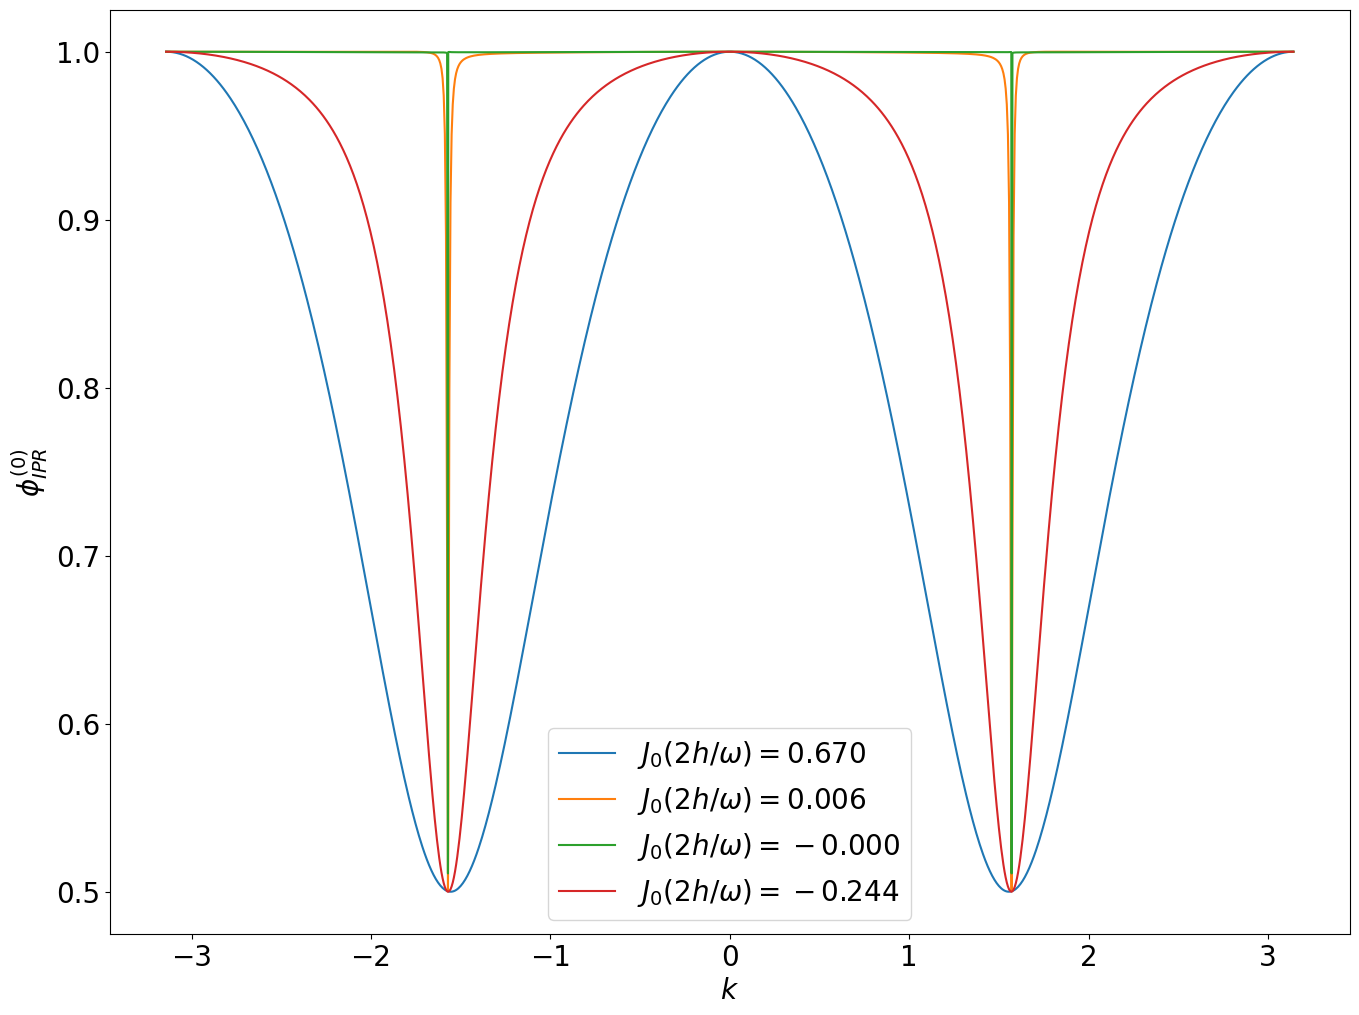

CPU times: user 13.1 s, sys: 230 ms, total: 13.3 s
Wall time: 13.1 s


In [3]:
%%time
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.special import j0, jn_zeros
from tqdm import tqdm
import traceback

plt.rcParams.update({
    "figure.figsize": (16, 12),
    "text.usetex": False,
    "font.size": 20})

freezing_pts = jn_zeros(0, 5)
max_pts = jn_zeros(1,5)

#
# set up the calculation
#
omega = 90.0
w = omega
hfrz = omega * freezing_pts/2
hmed = 0.995 * omega * freezing_pts/2
hmax = 1.25 * omega * max_pts/2
hfin = 0.5 * omega * freezing_pts/2


delta = 1e-4
fbz = np.linspace(-np.pi+delta, np.pi-delta, 1000)
aa = [-np.pi/2.0,np.pi/2.0]
fbz = np.sort(np.append(fbz,aa))

for h in np.sort([hfrz[0], hmed[0], hmax[0], hfin[0]]):
    params = {'h0':0.0, 'h':h, 'omega':omega}
    iprvals_exact = np.array([get_iprvals_exact(k, params, sort=True) for k in fbz])
    plt.plot(fbz, iprvals_exact[:,0], label=fr"$J_0(2h/\omega)={j0(2*h/w):1.3f}$")

plt.ylabel(f'$\phi^{{({{0}})}}_{{IPR}}$')
plt.xlabel(r'$k$')
plt.legend()

plt.show()

In [66]:
%%time
import numpy as np
from tqdm import tqdm
from scipy.special import jn_zeros

freezing_pts = jn_zeros(0,3)

#
# set up the calculation
#
omega = 90.0
w = omega
hfrz = omega * freezing_pts/2

delta = 0.0
fbz = np.linspace(-np.pi+delta, np.pi-delta, 100)
hvals = np.linspace(0.0, 16*omega/2, 100)
#include freezing points
hvals = np.sort(np.append(hvals, hfrz))

iprmat = np.empty([len(hvals), len(fbz)])
for x, h in tqdm(enumerate(hvals)):
    params = {'h0':np.pi/32, 'h':h, 'omega':omega}
    iprvals_exact = np.array([get_iprvals_exact(k, params, sort=True) for k in fbz])
    iprmat[x,:] = iprvals_exact[:,0]

103it [00:30,  3.36it/s]

CPU times: user 30.7 s, sys: 297 ms, total: 31 s
Wall time: 30.7 s


/home/mahi/anaconda3/envs/work3p8/lib/python3.8/site-packages/matplotlib_inline/backend_inline.py:27: UserWarning: The Figure parameters 'tight_layout' and 'constrained_layout' cannot be used together. Please use 'layout' parameter
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))


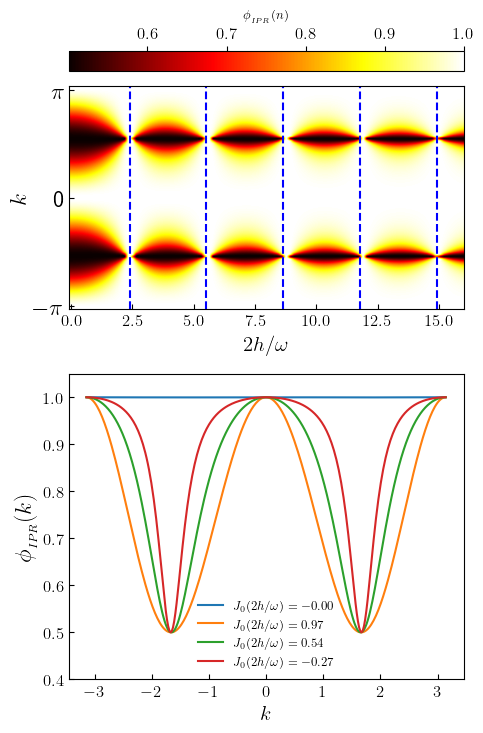

In [106]:
import matplotlib.pyplot as plt
from scipy.special import j0,jn_zeros
from scipy.interpolate import make_interp_spline

plt.rcParams.update({
    "figure.figsize": (5,7.5),
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 12,
    "font.sans-serif": ["Computer Modern"]})

freezing_pts = jn_zeros(0,5)

etas = 2 * hvals/w

fig = plt.figure(tight_layout=True, constrained_layout=True)

ipr_ax, crosssec_ax = fig.subplots(2,1)

# find minimum of minima & maximum of maxima
minmin = np.min(np.min(iprmat))
maxmax = np.max(np.max(iprmat))
asp = 1.4

im = ipr_ax.imshow(iprmat.T, aspect=asp, interpolation='spline16',\
                cmap='hot', origin='lower',extent = [etas[0]-0.1 , etas[-1],\
                                                     -np.pi -.1, np.pi+.1], vmax=maxmax, vmin=minmin)

for pt in freezing_pts:
    ipr_ax.axvline(pt, color='blue', ls='--')
    

clb = plt.colorbar(im, ax=ipr_ax, shrink=1.0, location = 'top')
clb.ax.set_title(r'$\phi_{{_{{IPR}}}}(n)$', fontsize= 9)

ipr_ax.set_yticks([-np.pi, 0.0, np.pi])
ipr_ax.set_yticklabels([r"$-\pi$", str(0), r"$\pi$"], fontsize = 17)
ipr_ax.tick_params(which='both',axis="x", direction="in")
ipr_ax.tick_params(axis="y", direction="in")
#ipr_ax.set_xlabel(r'$\frac{2h}{\omega}$', fontsize = 13)
ipr_ax.set_xlabel(r'$2h/ \omega$', fontsize = 15)
ipr_ax.set_ylabel(r'$k$', fontsize = 17, labelpad=1)


#Freezing point
idx, = np.where(np.isclose(etas, freezing_pts[0], atol=1e-3))
n0 = idx[0]

#High IPR
idx = np.where(iprmat[20:] == iprmat[20:].min())
n1 = idx[0][0]

#Intermediate IPR
idx, = np.where(np.isclose(etas, 1.5, atol=0.2))
n2 = idx[0]

#Another IPR
idx, = np.where(np.isclose(etas, 4.8, atol=0.2))
n3 = idx[0]

for i, n in enumerate([n0,n1, n2, n3]):
    xdata = fbz
    ydata =  iprmat[n]
    xnew = np.linspace(xdata.min(), xdata.max(), 300)
    gfg = make_interp_spline(xdata, ydata, k=3)
    crosssec_ax.plot(xnew, gfg(xnew), label=fr"$J_0(2h/\omega)={j0(etas[n]):1.2f}$")


crosssec_ax.set_xlabel(r"$k$", fontsize = 15)
crosssec_ax.yaxis.tick_left()
crosssec_ax.yaxis.set_label_position("left")
crosssec_ax.set_ylabel(r"$\phi_{{_{{IPR}}}}(k)$", fontsize = 17)
crosssec_ax.set_ylim(0.4, 1.05)

plt.legend(frameon = False, fontsize = 9)
crosssec_ax.tick_params(which='both',axis="x", direction="in")
crosssec_ax.tick_params(axis="y", direction="in")

plt.savefig("ising_exact_ipr.jpeg", dpi=600)
plt.savefig("ising_exact_ipr.svg", dpi=600)
plt.show()

The plots above are for the **exact** dynamics of the TFIM in Fermionic representation, with the reduced IPR plotted for the entire Brillouin zone for a few drive amplitudes. The frequency is set to $\omega = 90$ and the IPR of one of the two Floquet modes are plotted at time $t=T$ for $4$ chosen amplitudes. As can be seen, the exact result is consistent with the RWA approximation. When $J_0(2h/\omega) = 0$, the RWA Hamiltonian vanishes, yielding an IPR of unity. At other points, the IPR is unity only when $k=\pm \pi$ (since $\Delta_k=0$) and $k=0$ (since $f_k = 0$ and the Hamiltonian for each $k$ $\sim \sigma_x$); other than that, there is "delocalization" due to the ensuing dynamics.


The Hamiltonian in momentum space-
$$
H(t) = \sum_k \Psi^\dagger_k
\begin{pmatrix}
h_z + f_k & \Delta_k\\
\Delta_k^* & -h_z - f_k
\end{pmatrix}\Psi_k
$$
We can write 

$$
H(t) = \sum_k \Psi^\dagger_k
\Bigg[\begin{pmatrix}
 f_k & \Delta_k\\
\Delta_k^* & - f_k
\end{pmatrix} + h_z \begin{pmatrix}
1 & 0\\
0 & - 1
\end{pmatrix}\Bigg]\Psi_k = \sum_k \Psi^\dagger_k
\Big[\sigma_z f_k + \sigma_x \Delta_k + \sigma_z h_z\Big]\Psi_k
$$

We consider $H_s = \sigma_z f_k + \sigma_x \Delta_k$ and $H_d = \sigma_z h_z = h \cos{\omega t}\sigma_z$ . So the Unitary transformation operator $U = e^{i\int H_d dt} = exp \Big[\frac{ih}{\omega}\sin{\omega t}\Big]\sigma_z$

$$
\begin{align*}
H'(t) &= U^\dagger H_s U \\
&=e^{-i\frac{h}{\omega}\sin{\omega t}\sigma_z} H_s e^{i\frac{h}{\omega}\sin{\omega t}\sigma_z}\\
\end{align*}
$$

We consider, $\chi = i\frac{h}{\omega}\sin{\omega t}$
$$
\begin{align*}
H'(t) &= \begin{pmatrix}e^{-\chi}&0\\0&e^{\chi}\end{pmatrix} \begin{pmatrix}\cos{k}&\sin{k}\\\sin^*{k}&-\cos{k}\end{pmatrix}\begin{pmatrix}e^{\chi}&0\\0&e^{-\chi}\end{pmatrix}\\
&= \begin{pmatrix}\cos{k}&e^{2\chi}\sin{k}\\e^{-2\chi}\sin{k}&-\cos{k}\end{pmatrix}\\
&= \Delta \sigma^x \Bigg[J_0(\eta) + 2 \sum_{n=1}^\infty J_{2n} (\eta) \cos{(2n\omega t)}\Bigg] -2\Delta \sigma^y \sum_{n=1}^\infty J_{2n-1} (\eta) \sin{\big([(2n-1)\omega t]\big)} + \sigma^z f_k
\end{align*}
$$


We can, in principle, look at higher order effects by treating the $J_1, J_2,\dots-$term as a time-dependent perturbation (provided it is small enough compared to the $J_0-$term). We did not do it, since the exact numerics shows no appreciable influence of these higher order terms for our chosen values of $\omega = 90$.

Let us now look at the Floquet Matrix $H_F$ at $k\approx \pi/2$ for both a frozen and non-frozen case.

In [4]:
%%time
%matplotlib inline
import numpy as np
from qutip import hinton
from scipy.special import j0, jn_zeros
from IPython.display import display, Math

freezing_pts = jn_zeros(0, 5)

k=np.pi/2-0.01
#
# set up the calculation
#
omega = 90.0
w = omega
h_frz = omega * freezing_pts[0]/2
h_nfrz = 0.7 * h_frz
params_frz = {'h0':0, 'h':h_frz, 'omega':w}
params_nfrz = {'h0':0, 'h':h_nfrz, 'omega':w}


for i,p in enumerate([params_frz, params_nfrz]):
    h, w = p['h'], p['omega']
    f_states, f_energies = get_floquet_isingfermion(k, p, sort=True)    
    HF = 0
    for j, Omega in enumerate(f_energies):
        HF += Omega * f_states[j].proj()
    #display(Math(r'$\omega = {:1.2f}, J_0(2h/\omega)={:1.2f}$, $k={:1.2f}$'.format(w, j0(2*h/w), k)))
    #display(HF.tidyup(atol=1e-6))

CPU times: user 29.7 ms, sys: 4.18 ms, total: 33.9 ms
Wall time: 388 ms


Finally, let us look at quantitative comparisons between the exact result and the RWA result. In general, the exact RWA expansion of the Hamiltonian in the rotated frame is given above. We compare IPR's of the Floquet states obtained with the zeroth and first order terms in the RWA expansion with the exact case. 

$$
\begin{equation*}
H_{RWA} =\Delta \sigma^x \Bigg[J_0(\eta) + 2 \sum_{n=1}^\infty J_{2n} (\eta) \cos{(2n\omega t)}\Bigg] -2\Delta \sigma^y \sum_{n=1}^\infty J_{2n-1} (\eta) \sin{\big([(2n-1)\omega t]\big)} + \sigma^z f_k\Bigg]
\end{equation*}
$$

In [12]:
%%time

#Modded from qutip to allow parallelism
import numpy as np
import scipy.linalg as la
from numpy import angle, pi
from qutip import Qobj, propagator

def floquet_modes_mod(H, T, args=None, parallel=False, sort=False, U=None):
    """
    Calculate the initial Floquet modes Phi_alpha(0) for a driven system with
    period T.

    Returns a list of :class:`qutip.qobj` instances representing the Floquet
    modes and a list of corresponding quasienergies, sorted by increasing
    quasienergy in the interval [-pi/T, pi/T]. The optional parameter `sort`
    decides if the output is to be sorted in increasing quasienergies or not.

    Parameters
    ----------

    H : :class:`qutip.qobj`
        system Hamiltonian, time-dependent with period `T`

    args : dictionary
        dictionary with variables required to evaluate H

    T : float
        The period of the time-dependence of the hamiltonian. The default value
        'None' indicates that the 'tlist' spans a single period of the driving.

    U : :class:`qutip.qobj`
        The propagator for the time-dependent Hamiltonian with period `T`.
        If U is `None` (default), it will be calculated from the Hamiltonian
        `H` using :func:`qutip.propagator.propagator`.

    Returns
    -------

    output : list of kets, list of quasi energies

        Two lists: the Floquet modes as kets and the quasi energies.

    """
    if 'opts' in args:
        options = args['opts']
    else:
        options = Options()
        options.rhs_reuse = True
        rhs_clear() 
    
    if U is None:
        # get the unitary propagator
        U = propagator(H, T, [], args, parallel=parallel, progressbar=True, options=options)
    
    # find the eigenstates for the propagator
    evals, evecs = la.eig(U.full())

    eargs = angle(evals)

    # make sure that the phase is in the interval [-pi, pi], so that
    # the quasi energy is in the interval [-pi/T, pi/T] where T is the
    # period of the driving.  eargs += (eargs <= -2*pi) * (2*pi) +
    # (eargs > 0) * (-2*pi)
    eargs += (eargs <= -pi) * (2 * pi) + (eargs > pi) * (-2 * pi)
    e_quasi = -eargs / T

    # sort by the quasi energy
    if sort:
        order = np.argsort(-e_quasi)
    else:
        order = list(range(len(evals)))

    # prepare a list of kets for the floquet states
    new_dims = [U.dims[0], [1] * len(U.dims[0])]
    new_shape = [U.shape[0], 1]
    kets_order = [Qobj(np.matrix(evecs[:, o]).T,
                       dims=new_dims, shape=new_shape) for o in order]

    return kets_order, e_quasi[order]

CPU times: user 30 µs, sys: 59 µs, total: 89 µs
Wall time: 94.2 µs


In [13]:
%%time
import numpy as np
from qutip import tensor, sigmax, sigmay, sigmaz, qeye, mesolve 
from qutip.floquet import floquet_modes
from scipy.special import j0

def drive(t, args):
    h0 = args['h0']
    h = args['h']
    w = args['omega']
    return h0 + h * np.cos(w * t)

def get_floquet_isingfermion(k, args, **kwargs):
    
    sx = sigmax()
    sz = sigmaz()
    
    # construct the hamiltonian
    H0 = np.sin(k) * sx + np.cos(k) * sz
    H1 = sz
    
    H = [H0,[H1,drive]]    
    T = 2 * np.pi/args['omega']

    return floquet_modes(H, T, args, **kwargs)

def get_iprvals_exact(k, params, **kwargs):
    f_states, f_energies = get_floquet_isingfermion(k, params, **kwargs)
    floquet_matrix = np.array(f_states)[:,:,0]
    return np.sum(np.abs(floquet_matrix)**4, axis=-1)

CPU times: user 39 µs, sys: 76 µs, total: 115 µs
Wall time: 121 µs


In [14]:
%%time
import numpy as np
from qutip import tensor, sigmax, sigmay, sigmaz, qeye, propagator 
from qutip.floquet import floquet_modes
from scipy.special import jn

def drive_sx_rwa(t, args):
    n = args['order']
    w = args['omega']
    h = args['h']
    eta = 2*h/w
    cos_indices = np.arange(1,n+1)
        
    return np.sum([2 *jn(2*m, eta)*np.cos(2*m*w*t) for m in cos_indices])

def drive_sy_rwa(t, args):
    n = args['order']
    w = args['omega']
    h = args['h']
    eta = 2*h/w
    sin_indices = np.arange(1,n+1)          
    return np.sum([2*jn(2*m-1, eta)*np.sin((2*m-1)*w*t) for m in sin_indices])

def get_floquet_isingfermion_RWA1(k, args, **kwargs):
    h = args['h']
    w = args['omega']
    eta = 2*h/w
    Dk = np.sin(k) 
    fk = np.cos(k)
    n = args['order']
    sx, sy, sz = sigmax(), sigmay(), sigmaz()
    H_rwa = Dk * sx * j0(eta) + sz * fk
    H = [H_rwa, [2 * Dk * sx, drive_sx_rwa] ,[-2 * Dk * sy, drive_sy_rwa]]
    
    T = 2 * np.pi/w
    return floquet_modes_mod(H, T, args, **kwargs)

def get_floquet_isingfermion_RWA(k, args, **kwargs):
    h = args['h']
    w = args['omega']
    eta = 2*h/w
    Dk = np.sin(k) 
    fk = np.cos(k)
    n = args['order']
    sx, sy, sz = sigmax(), sigmay(), sigmaz()
    H_rwa = Dk * sx * j0(eta) + sz * fk
    if n==0:
        H = H_rwa
    else:
        H = [H_rwa, [2 * Dk * sx, drive_sx_rwa] ,[-2 * Dk * sy, drive_sy_rwa]]
    
    T = 2 * np.pi/w
    return floquet_modes_mod(H, T, args, **kwargs)

def get_iprvals_RWA(k, params, **kwargs):
    f_states, f_energies = get_floquet_isingfermion_RWA(k, params, **kwargs)
    floquet_matrix = np.array(f_states)[:,:,0]
    return np.sum(np.abs(floquet_matrix)**4, axis=-1)

CPU times: user 83 µs, sys: 0 ns, total: 83 µs
Wall time: 89.2 µs


#### Ising high frequency $\omega = 90.0$

Running with  10  processors for N =  30  order =  exact


200it [00:29,  6.79it/s]


Running with  10  processors for N =  30  order =  0


200it [00:26,  7.49it/s]


Running with  10  processors for N =  30  order =  1


200it [00:34,  5.73it/s]


Running with  10  processors for N =  30  order =  2


200it [00:42,  4.75it/s]


Running with  10  processors for N =  30  order =  3


200it [00:50,  3.94it/s]


Running with  10  processors for N =  30  order =  4


200it [00:59,  3.36it/s]


Running with  10  processors for N =  30  order =  5


200it [01:09,  2.88it/s]


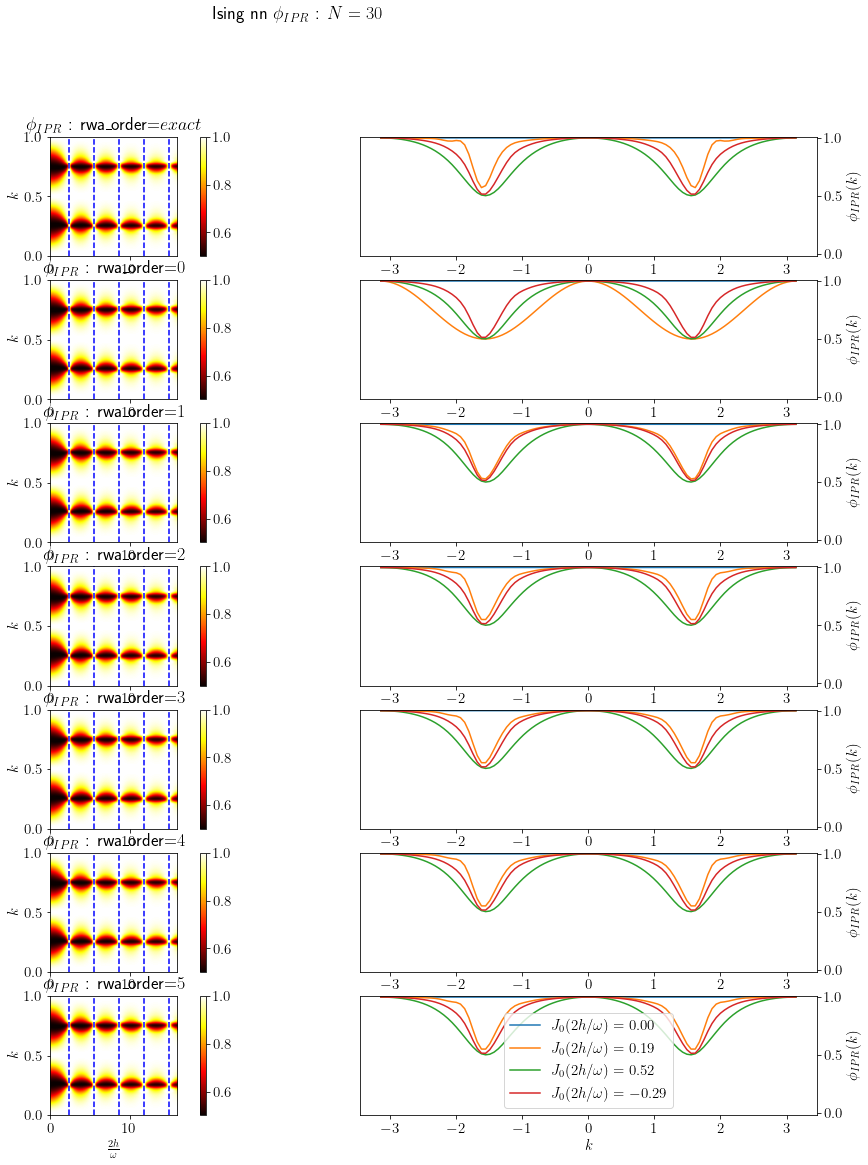

CPU times: user 56.9 s, sys: 1min 53s, total: 2min 50s
Wall time: 5min 27s


In [20]:
%%time
import numpy as np
from tqdm import tqdm
from scipy.special import jn_zeros
from qutip import Options, parfor
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

plt.rcParams.update({"figure.figsize": (6,17),"text.usetex": True,
    "font.family": "sans-serif","font.size": 15,"font.sans-serif": ["Computer Modern"]})

cpus = 10
size = 30
orders = ['exact',0,1,2,3,4,5]

freezing_pts = jn_zeros(0,5)
omega = 90.0
w = omega
hfrz = omega * freezing_pts/2

delta = 1e-7
fbz = np.linspace(-np.pi+delta, np.pi-delta, size)
hvals = np.linspace(0.0,  omega/2 * 16.0, 195)
hvals = np.sort(np.append(hvals, hfrz))

opts = Options(rhs_reuse=False)
fig, axs = plt.subplots(len(orders), 2, figsize=(18,18))
fig.suptitle(fr'Ising nn $ \phi_{{IPR}}$ : $N = {len(fbz)}$')
  

for i,order in enumerate(orders):
    print('Running with ', cpus, ' processors for N = ', size ,' order = ', order)
    iprmat = np.empty([len(hvals), len(fbz)])
    
    for x, h in tqdm(enumerate(hvals)):
        params = {'h0':0.0, 'h':h, 'omega':omega, 'order':order, 'opts':opts}
        if order == 'exact':
            iprvals = np.array(parfor(get_iprvals_exact,fbz, [params]*size, sort=False, num_cpus=cpus))
        else:
            iprvals = np.array(parfor(get_iprvals_RWA,fbz, [params]*size, sort=False, num_cpus=cpus))
        iprmat[x,:] = iprvals[:,0]

    etas = 2 * hvals/w    

    axs[i, 0].set_title(fr'$\phi_{{IPR}}$ : rwa_order=${order}$')
    # find minimum of minima & maximum of maxima
    minmin = np.min(np.min(iprmat))
    maxmax = np.max(np.max(iprmat))
    asp = 15
    axs[i, 0].set_ylabel(r'$k$')

    im = axs[i, 0].imshow(iprmat.T, aspect=asp, interpolation='spline16',\
                    cmap='hot', origin='lower',extent = [etas[0] , etas[-1], 0 , 1], vmax=maxmax, vmin=minmin)

    for pt in freezing_pts:
        axs[i, 0].axvline(pt, color='blue', ls='--')

    fig.colorbar(im, ax=axs[i, 0], orientation='vertical', shrink=1.0)


    #Freezing point
    idx, = np.where(np.isclose(etas, freezing_pts[4], atol=1e-3))
    n0 = idx[0]

    #High IPR
    idx = np.where(iprmat[20:] == iprmat[20:].min())
    n1 = idx[0][0]

    #Intermediate IPR
    idx, = np.where(np.isclose(etas, 1.5, atol=0.09))
    n2 = idx[0]

    #Another IPR
    idx, = np.where(np.isclose(etas, 4.8, atol=0.2))
    n3 = idx[0]

    for j, n in enumerate([n0,n1, n2, n3]):
        xdata = fbz
        ydata =  iprmat[n]
        xnew = np.linspace(xdata.min(), xdata.max(), 100)
        gfg = make_interp_spline(xdata, ydata, k=3)
        axs[i, 1].plot(xnew, gfg(xnew), label=fr"$J_0(2h/\omega)={j0(etas[n]):1.2f}$")

    #axs[i, 1].set_xlabel(r"$k$")
    axs[i, 1].yaxis.tick_right()
    axs[i, 1].yaxis.set_label_position("right")
    axs[i, 1].set_ylabel(r"$\phi_{{IPR}}(k)$")
    axs[i, 1].set_ylim(-0.02, 1.01)

    
lastplot = len(orders)-1
axs[lastplot, 0].set_xlabel(r"$\frac{2h}{\omega}$")
axs[lastplot, 1].set_xlabel(r"$k$")
plt.legend()
figname = "ising_ipr_rwa_order_" + str(order) + "_N_" + str(size) + ".svg"
plt.savefig(figname, dpi=300)
plt.show()

#### Ising low freq $\omega = 2.0$

Running with  12  processors for N =  30  order =  exact


200it [00:30,  6.60it/s]


Running with  12  processors for N =  30  order =  0


200it [00:28,  7.02it/s]


Running with  12  processors for N =  30  order =  1


200it [00:36,  5.55it/s]


Running with  12  processors for N =  30  order =  2


200it [00:42,  4.68it/s]


Running with  12  processors for N =  30  order =  5


200it [01:05,  3.03it/s]


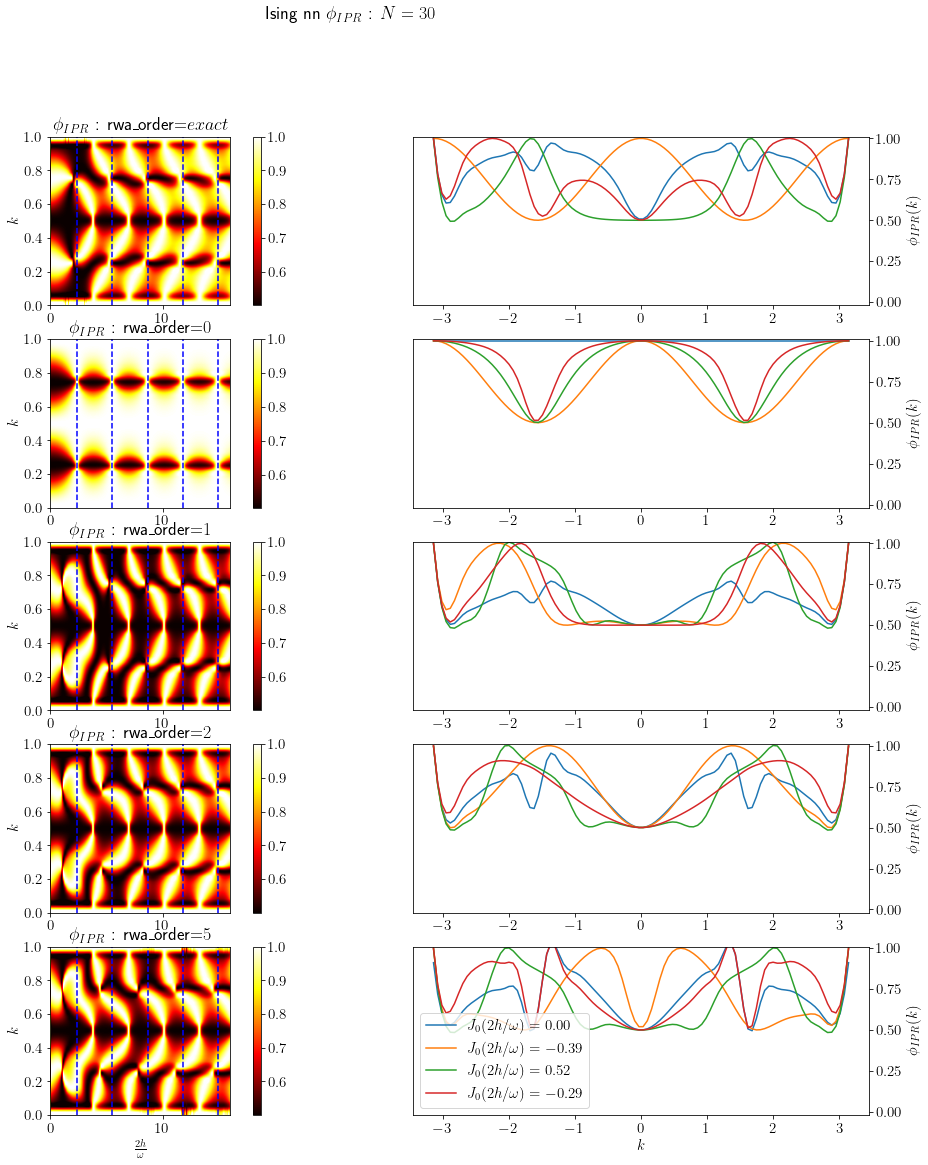

CPU times: user 42.4 s, sys: 1min 28s, total: 2min 10s
Wall time: 3min 33s


In [6]:
%%time
import numpy as np
from tqdm import tqdm
from scipy.special import jn_zeros
from qutip import Options, parfor
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

plt.rcParams.update({"figure.figsize": (6,17),"text.usetex": True,
    "font.family": "sans-serif","font.size": 15,"font.sans-serif": ["Computer Modern"]})

cpus = 12
size = 30
orders = ['exact',0,1,2,5]

freezing_pts = jn_zeros(0,5)
omega = 2.0
w = omega
hfrz = omega * freezing_pts/2

delta = 1e-7
fbz = np.linspace(-np.pi+delta, np.pi-delta, size)
hvals = np.linspace(0.0,  omega/2 * 16.0, 195)
hvals = np.sort(np.append(hvals, hfrz))

opts = Options(rhs_reuse=False)
fig, axs = plt.subplots(len(orders), 2, figsize=(18,18))
fig.suptitle(fr'Ising nn $ \phi_{{IPR}}$ : $N = {len(fbz)}$')
  

for i,order in enumerate(orders):
    print('Running with ', cpus, ' processors for N = ', size ,' order = ', order)
    iprmat = np.empty([len(hvals), len(fbz)])
    
    for x, h in tqdm(enumerate(hvals)):
        params = {'h0':0.0, 'h':h, 'omega':omega, 'order':order, 'opts':opts}
        if order == 'exact':
            iprvals = np.array(parfor(get_iprvals_exact,fbz, [params]*size, sort=False, num_cpus=cpus))
        else:
            iprvals = np.array(parfor(get_iprvals_RWA,fbz, [params]*size, sort=False, num_cpus=cpus))
        iprmat[x,:] = iprvals[:,0]

    etas = 2 * hvals/w    

    axs[i, 0].set_title(fr'$\phi_{{IPR}}$ : rwa_order=${order}$')
    # find minimum of minima & maximum of maxima
    minmin = np.min(np.min(iprmat))
    maxmax = np.max(np.max(iprmat))
    asp = 15
    axs[i, 0].set_ylabel(r'$k$')

    im = axs[i, 0].imshow(iprmat.T, aspect=asp, interpolation='spline16',\
                    cmap='hot', origin='lower',extent = [etas[0] , etas[-1], 0 , 1], vmax=maxmax, vmin=minmin)

    for pt in freezing_pts:
        axs[i, 0].axvline(pt, color='blue', ls='--')

    fig.colorbar(im, ax=axs[i, 0], orientation='vertical', shrink=1.0)


    #Freezing point
    idx, = np.where(np.isclose(etas, freezing_pts[4], atol=1e-3))
    n0 = idx[0]

    #High IPR
    idx = np.where(iprmat[20:] == iprmat[20:].min())
    n1 = idx[0][0]

    #Intermediate IPR
    idx, = np.where(np.isclose(etas, 1.5, atol=0.09))
    n2 = idx[0]

    #Another IPR
    idx, = np.where(np.isclose(etas, 4.8, atol=0.2))
    n3 = idx[0]

    for j, n in enumerate([n0,n1, n2, n3]):
        xdata = fbz
        ydata =  iprmat[n]
        xnew = np.linspace(xdata.min(), xdata.max(), 100)
        gfg = make_interp_spline(xdata, ydata, k=3)
        axs[i, 1].plot(xnew, gfg(xnew), label=fr"$J_0(2h/\omega)={j0(etas[n]):1.2f}$")

    #axs[i, 1].set_xlabel(r"$k$")
    axs[i, 1].yaxis.tick_right()
    axs[i, 1].yaxis.set_label_position("right")
    axs[i, 1].set_ylabel(r"$\phi_{{IPR}}(k)$")
    axs[i, 1].set_ylim(-0.02, 1.01)

    
lastplot = len(orders)-1
axs[lastplot, 0].set_xlabel(r"$\frac{2h}{\omega}$")
axs[lastplot, 1].set_xlabel(r"$k$")
plt.legend()
figname = "ising_ipr_rwa_order_" + str(order) + "_LOWfr_2_N_" + str(size) + ".jpeg"
plt.savefig(figname, dpi=300)
plt.show()

# Comparision LMG: Exact and RWA 

In [2]:
from qutip import mesolve, basis, jmat

#Modded from qutip to allow parallelism
import numpy as np
import scipy.linalg as la
from numpy import angle, pi
from qutip import Qobj, propagator

def floquet_modes_mod(H, T, args=None, parallel=False, sort=False, U=None):
    """
    Calculate the initial Floquet modes Phi_alpha(0) for a driven system with
    period T.

    Returns a list of :class:`qutip.qobj` instances representing the Floquet
    modes and a list of corresponding quasienergies, sorted by increasing
    quasienergy in the interval [-pi/T, pi/T]. The optional parameter `sort`
    decides if the output is to be sorted in increasing quasienergies or not.

    Parameters
    ----------

    H : :class:`qutip.qobj`
        system Hamiltonian, time-dependent with period `T`

    args : dictionary
        dictionary with variables required to evaluate H

    T : float
        The period of the time-dependence of the hamiltonian. The default value
        'None' indicates that the 'tlist' spans a single period of the driving.

    U : :class:`qutip.qobj`
        The propagator for the time-dependent Hamiltonian with period `T`.
        If U is `None` (default), it will be calculated from the Hamiltonian
        `H` using :func:`qutip.propagator.propagator`.

    Returns
    -------

    output : list of kets, list of quasi energies

        Two lists: the Floquet modes as kets and the quasi energies.

    """
    if 'opts' in args:
        options = args['opts']
    else:
        options = Options()
        options.rhs_reuse = True
        rhs_clear() 
    
    if U is None:
        # get the unitary propagator
        U = propagator(H, T, [], args, parallel=parallel, progressbar=True, options=options)
    
    # find the eigenstates for the propagator
    evals, evecs = la.eig(U.full())

    eargs = angle(evals)

    # make sure that the phase is in the interval [-pi, pi], so that
    # the quasi energy is in the interval [-pi/T, pi/T] where T is the
    # period of the driving.  eargs += (eargs <= -2*pi) * (2*pi) +
    # (eargs > 0) * (-2*pi)
    eargs += (eargs <= -pi) * (2 * pi) + (eargs > pi) * (-2 * pi)
    e_quasi = -eargs / T

    # sort by the quasi energy
    if sort:
        order = np.argsort(-e_quasi)
    else:
        order = list(range(len(evals)))

    # prepare a list of kets for the floquet states
    new_dims = [U.dims[0], [1] * len(U.dims[0])]
    new_shape = [U.shape[0], 1]
    kets_order = [Qobj(np.matrix(evecs[:, o]).T,
                       dims=new_dims, shape=new_shape) for o in order]

    return kets_order, e_quasi[order]


def drive(t, args):
    w = args['omega']
    h = args['h']
    h0 = args['h0']
    return h * np.cos(w*t) + h0

def get_hamiltonians(N):
    sx,sy,sz = jmat(N,"x"),jmat(N,"y"),jmat(N,"z")
    kn =  2.0/N                                      # kacNorm
    H0 = kn * sz **2 
    H1 = 2 * sx
    return H0,H1

def floq_evolv(args):
    N = args['N']
    T = 2 * np.pi/args['omega']
    opts = args['opts']
    H0, H1 = get_hamiltonians(N)
    H = [H0,[H1,drive]]
    f_states, _ = floquet_modes_mod(H, T, args=args)
    return f_states


print("Definitions complete!")

Definitions complete!


In [3]:
%%time
from qutip import Qobj, jmat, Options
import numpy as np
from multiprocessing import Pool
from tqdm import tqdm
from scipy.special import jn_zeros

delta = 0.0
freezing_pts = jn_zeros(0,3)+delta
####################################################################################################
#
#                                     Exact Dynamics
#
####################################################################################################

N = 30
h0 = 0.0
omega = 90
nprocs = 11

w = omega

hsteps = 70
#h1 = (1/4) * omega * 0.01
h1 = 0
h2 = (1/4) * omega * 16.0 

hroots = freezing_pts * omega/4

hs = np.linspace(h1, h2, hsteps)

hs = np.sort(np.append(hs, hroots))

p = Pool(processes = nprocs)          
print("running for N = ", N, "with",nprocs,"processors")  

#Qutip Solver Options
opts = Options(nsteps=1e5, num_cpus=1, openmp_threads=1)
params = [{'h0':0, 'h':h, 'omega':omega, 'N':N, 'opts':opts} for h in hs]
f_stateslist = p.map(floq_evolv,tqdm(params, position=0, leave=True))


iprmat = np.zeros((len(hs),2*N+1))

sx = jmat(N,"x")
en, st = sx.eigenstates()

print("\n Done. Now calculating PR ...")
for xx,h in enumerate(hs):
    f_states = f_stateslist[xx]
    iprmat[xx,:] = [np.sum([np.abs(state.overlap(sx_ev))**4 for sx_ev in st]) for state in f_states]
print("Exact simulation complete!")


running for N =  30 with 11 processors


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 73/73 [00:00<00:00, 31791.53it/s]



 Done. Now calculating PR ...
Exact simulation complete!
CPU times: user 3.17 s, sys: 170 ms, total: 3.34 s
Wall time: 55.5 s


/usr/local/anaconda3/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/anaconda3/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.canvas.print_figure(bytes_io, **kw)


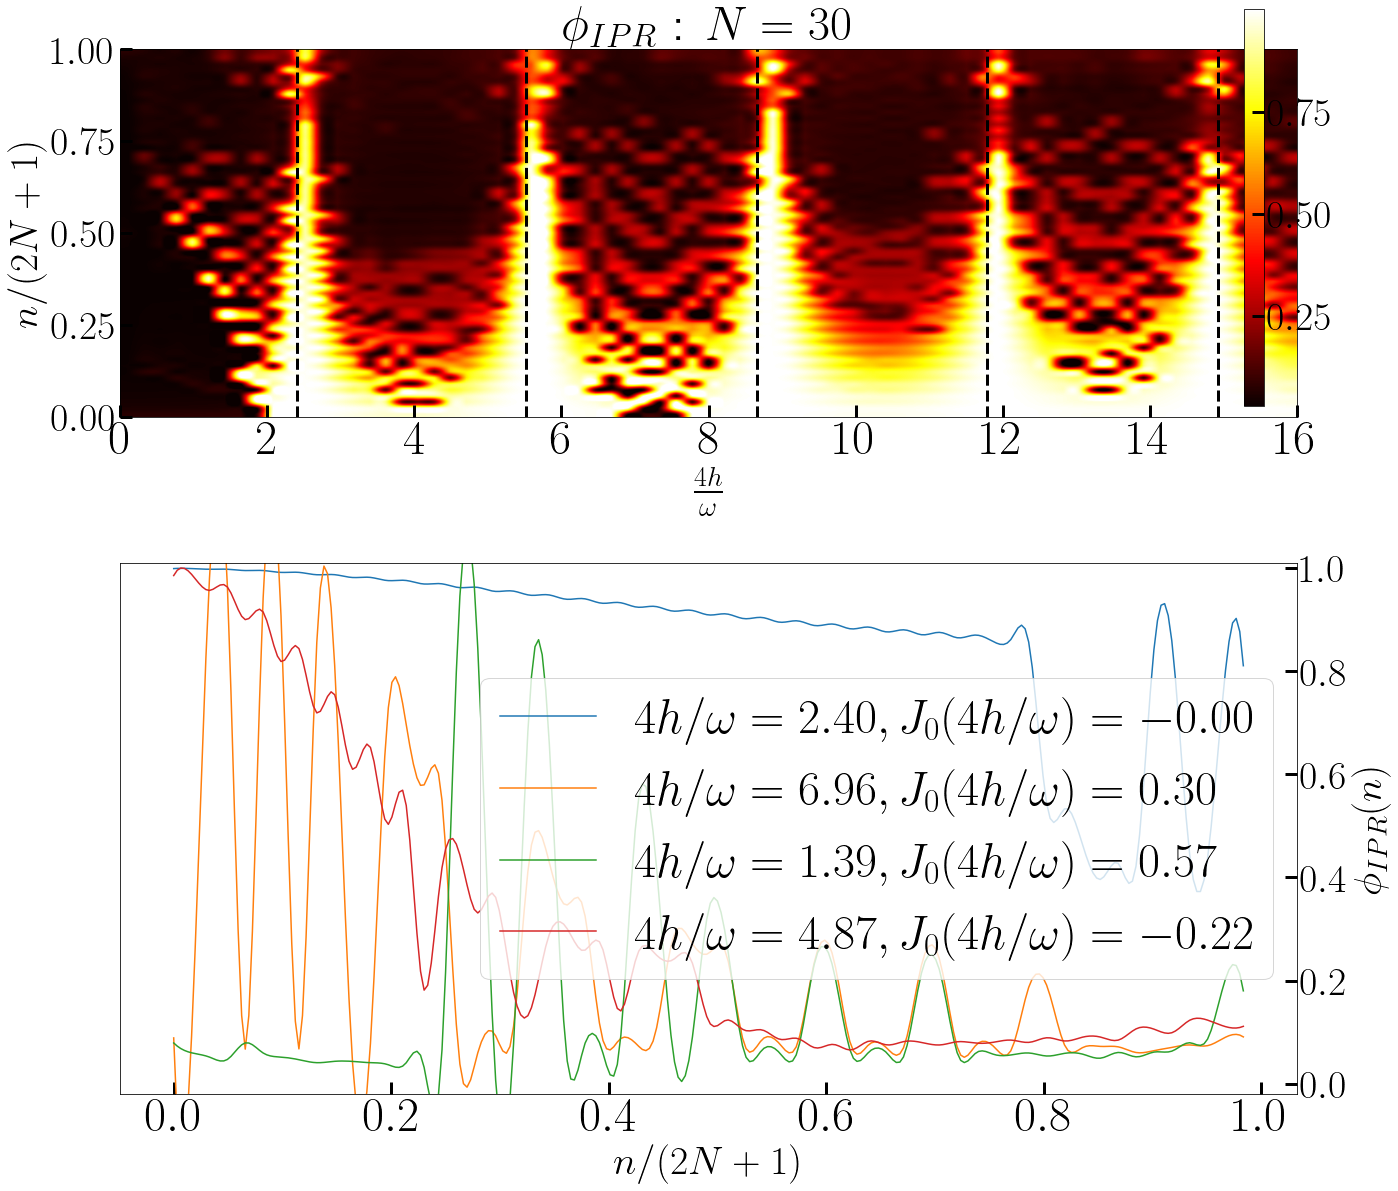

In [4]:
import matplotlib.pyplot as plt
from scipy.special import j0
from scipy.interpolate import make_interp_spline

from scipy.signal import savgol_filter

plt.rcParams.update({
    "figure.figsize": (20, 20),
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 40,
    "font.sans-serif": ["Computer Modern"]})


from scipy.special import jn_zeros
freezing_pts = jn_zeros(0,5) + delta

etas = 4 * hs/w

fig = plt.figure(constrained_layout=True)

ipr_ax, crosssec_ax = fig.subplots(2,1)

ipr_ax.set_title(fr'$\phi_{{IPR}}$ : $N = {N}$')
# find minimum of minima & maximum of maxima
minmin = np.min(np.min(iprmat))
maxmax = np.max(np.max(iprmat))
asp = 5
ipr_ax.set_xlabel(r'$\frac{4h}{\omega}$')
ipr_ax.set_ylabel(r'$n/(2N+1)$')

for pt in freezing_pts:
    ipr_ax.axvline(x=pt, color='black', linestyle="--",linewidth=3.0)

im = ipr_ax.imshow(iprmat.T, aspect=asp, interpolation='spline16',\
                cmap='hot', origin='lower',extent = [etas[0] , etas[-1], 0 , 1], vmax=maxmax, vmin=minmin)

fig.colorbar(im, ax=ipr_ax, orientation='vertical', shrink=0.6)


#Freezing point
idx, = np.where(np.isclose(etas, freezing_pts[0], atol=0.03))
n0 = idx[0]

#High IPR
idx = np.where(iprmat[20:] == iprmat[20:].min())
n1 = idx[0][0]+20

#Intermediate IPR
idx, = np.where(np.isclose(etas, 1.5, atol=0.15))
n2 = idx[0]

#Another IPR
idx, = np.where(np.isclose(etas, 4.8, atol=0.15))
n3 = idx[0]

for i, n in enumerate([n0,n1, n2, n3]):
    xdata = np.arange(2*N+1)/(2*N+1)
    ydata =  iprmat[n]
    xnew = np.linspace(xdata.min(), xdata.max(), 300)
    gfg = make_interp_spline(xdata, ydata, k=3)
    crosssec_ax.plot(xnew, gfg(xnew), label=fr"$4h/\omega={etas[n]:1.2f}, J_0(4h/\omega)={j0(etas[n]):1.2f}$")
    #crosssec_ax.plot(xdata, ydata, label=fr"$4h/\omega={etas[n]:1.2f}, J_0(4h/\omega)={j0(etas[n]):1.2f}$")


crosssec_ax.set_xlabel(r"$n/(2N+1)$")
crosssec_ax.yaxis.tick_right()
crosssec_ax.yaxis.set_label_position("right")
crosssec_ax.set_ylabel(r"$\phi_{{IPR}}(n)$")
crosssec_ax.set_ylim(-0.02, 1.01)
plt.legend()
plt.show()

### Nature of the Floquet Hamiltonian

Here, we're looking at hinton plots of the matrix elements (in the $S^x$ representation) Floquet Hamiltonian $H_F$

CPU times: user 24.5 s, sys: 579 ms, total: 25.1 s
Wall time: 23.6 s


/usr/local/anaconda3/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


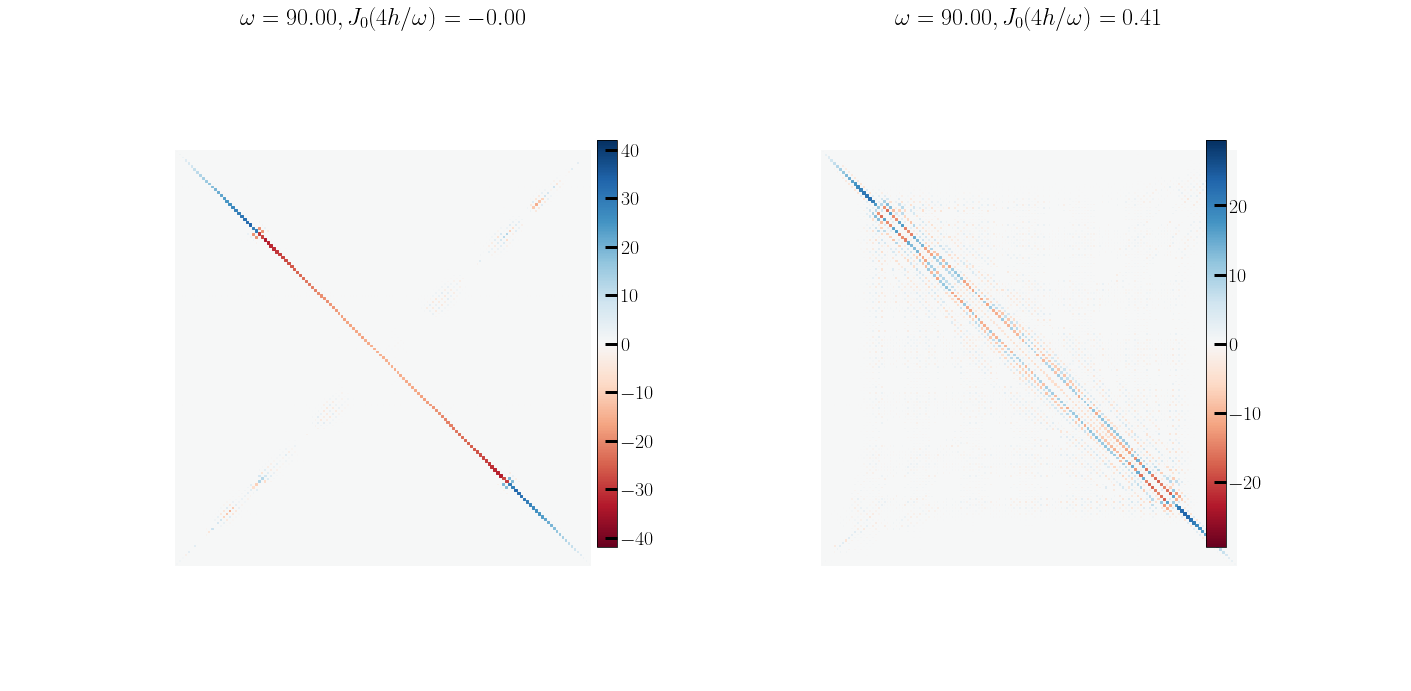

In [8]:
%%time
from qutip import Qobj, hinton, Options, jmat, matrix_histogram
import numpy as np
from multiprocessing import Pool
from tqdm import tqdm
from scipy.special import jn_zeros, j0
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.figsize": (20, 10),
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 20,
    "font.sans-serif": ["Computer Modern"]})


freezing_pts = jn_zeros(0,3)
####################################################################################################
#
#                                     Exact Dynamics
#
####################################################################################################


N = 70
h0 = 0.0
# no anti-diagonal in frozen HF for w =80
# anti-diagonal appears in frozen HF for w =82

omega = 90
nprocs = 13

w = omega
T = 2.0 * np.pi/w

h_frz = freezing_pts[0] * omega/4
h_nfrz = 0.7 * h_frz

H0, H1 = get_hamiltonians(N)
H = [H0,[H1,drive]]
fig, axs = plt.subplots(1,2)
opts = Options(nsteps=1e5, num_cpus=13, openmp_threads=13)

params_frz = {'h0':0, 'h':h_frz, 'omega':w, 'N':N, 'opts':opts}
params_nfrz = {'h0':0, 'h':h_nfrz, 'omega':w, 'N':N, 'opts':opts}
sx = jmat(N,"x")
en, st = sx.eigenstates()

for i,p in enumerate([params_frz, params_nfrz]):
    h, w = p['h'], p['omega']
    f_modes, f_energies = floquet_modes_mod(H, T, args=p, parallel=True)
    HF = 0.
    for j, Omega in enumerate(f_energies):
        HF += Omega * f_modes[j].proj()
    
    HF = HF.transform(st)
    fig, ax = hinton(HF.tidyup(atol=1e-7), ax=axs[i], xlabels=False, ylabels=False)
    ax.set_title(r'$\omega = {:1.2f}, J_0(4h/\omega)={:1.2f} $'.format(w, j0(4*h/w)))
    

We can see noticeable anti-diagonal terms in $H_F$ in the $S^x$ representation when $J_0(4h/\omega)=0$. Thus, the Floquet Hamiltonian is NOT diagonal in this regime, contradicting the analytical assumption that only the lowest order term in the RWA counts in the dynamics. This is very different from the nearest-neighbour case when the lowest order term is all that it took.

### Conclusion
$S^x$ is mostly conserved and $H_F$ is **mostly** diagonal in the $S^x$ representation at freezing, the Floquet states have edge dips in their IPR's away from unity, almost certainly due to higher order effects in the RWA expansion. We can see this by looking at the RWA Hamiltonian to the next order.
# RWA to higher orders

The full Hamiltonian for the LMG model in the rotated basis is

\begin{equation}
\tilde{H}(t) = -\frac{4}{N}\Bigg[\frac{N}{2}\big(\frac{N}{2}+1\big) - \big(S^x\big)^2\Bigg]  -\frac{4}{N}\Big[\big(S^x\big)^2 - \big(S^y\big)^2\Big] \Bigg[\frac12 J_0(\eta) + \sum^\infty_{n=1}J_{2n}(\eta)\cos{\big(2n\omega t\big)}\Bigg] -\frac{4}{N} \big\{S^y, S^z \big\} \sum^\infty_{n=1}J_{2n-1}(\eta)\sin{\Big[\big(2n-1\big)\omega t\Big]}
\end{equation}

We can numerically obtain successive approximations for $H_F$ by truncating this series to higher orders in order to probe for the emergene of the anti-diagonal terms in $H_F$ in the $S^x$ representation.

CPU times: user 23.9 s, sys: 656 ms, total: 24.5 s
Wall time: 21.7 s


/usr/local/anaconda3/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


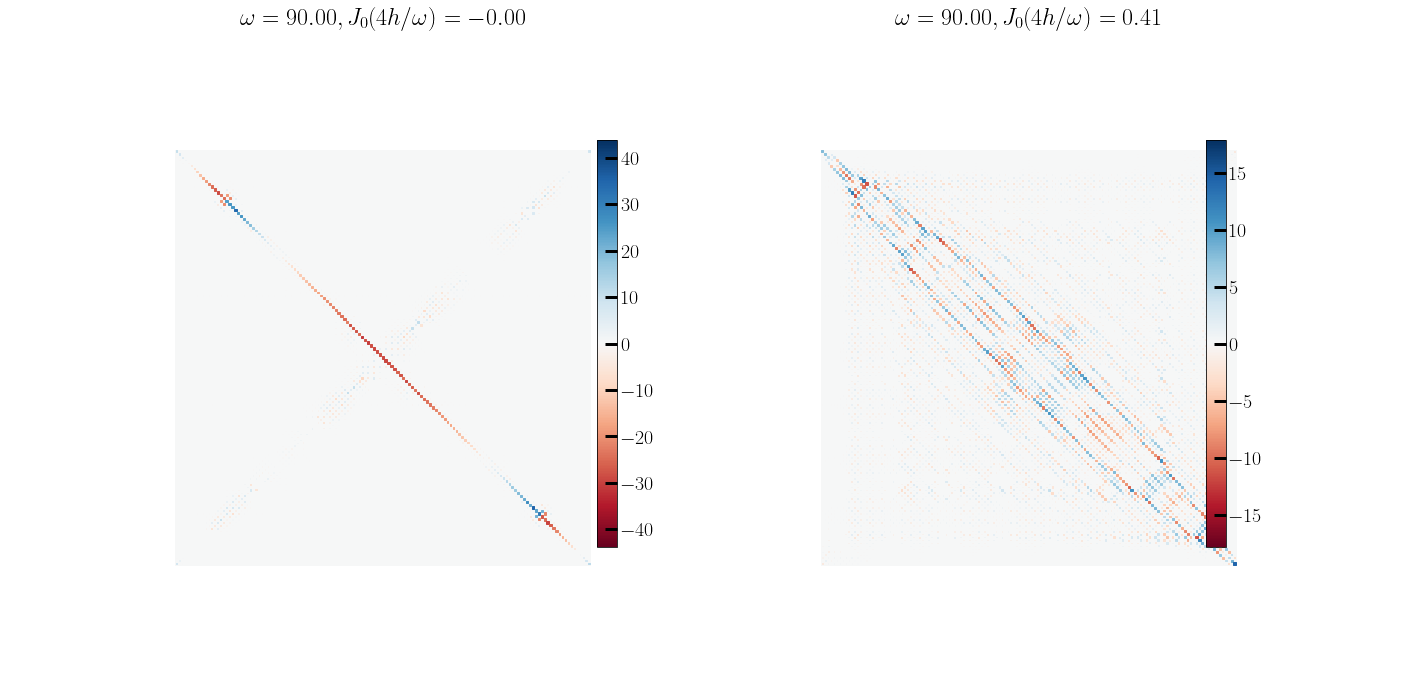

In [9]:
%%time
from qutip import Qobj, hinton, Options, jmat, matrix_histogram
import numpy as np
from multiprocessing import Pool
from tqdm import tqdm
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.special import j0, jn,jn_zeros
from numpy import angle, pi
from qutip import Qobj

def drive2(t, args):
    n = 1
    w, h, h0 = args['omega'], args['h'], args['h0']
    return jn(2*n-1,4*h/w) * np.sin((2*n-1)*w*t)

def get_hamiltonians_RWA(N, args):
    w = args['omega']
    h = args['h']
    sx,sy,sz = jmat(N,"x"),jmat(N,"y"),jmat(N,"z")
    kn =  2.0/N   
    H0 = -kn * (N/2 *(N/2+1) - sx*sx) 
    H0 += (-2* kn) * (sz*sz - sy*sy) * j0(4*h/w)
    H1 = -2 * kn * (sy*sz + sz*sy)
    return H0,H1

plt.rcParams.update({
    "figure.figsize": (20, 10),
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 20,
    "font.sans-serif": ["Computer Modern"]})


freezing_pts = jn_zeros(0,3)

N = 70
h0 = 0.0
omega = 90
w = omega
T = 2.0 * np.pi/w
h_frz = freezing_pts[0] * omega/4
h_nfrz = 0.7 * h_frz

nprocs = 12
fig, axs = plt.subplots(1,2)
opts = Options(nsteps=1e5, num_cpus=nprocs, openmp_threads=1)

params_frz = {'h0':0, 'h':h_frz, 'omega':w, 'N':N, 'opts':opts}
params_nfrz = {'h0':0, 'h':h_nfrz, 'omega':w, 'N':N, 'opts':opts}
sx = jmat(N,"x")
en, st = sx.eigenstates()

for i,p in enumerate([params_frz, params_nfrz]):
    H0,H1 = get_hamiltonians_RWA(N, p)
    H = [H0,[H1,drive2]]
    h, w = p['h'], p['omega']
    f_modes, f_energies = floquet_modes_mod(H, T, args=p, parallel=True)
    HF = 0.
    for j, Omega in enumerate(f_energies):
        HF += Omega * f_modes[j].proj()
    
    HF = HF.transform(st)
    fig, ax = hinton(HF.tidyup(atol=1e-7), ax=axs[i], xlabels=False, ylabels=False)
    ax.set_title(r'$\omega = {:1.2f}, J_0(4h/\omega)={:1.2f} $'.format(w, j0(4*h/w)))

# Classical Lipkin Dynamics

In the continuum limit, the Lipkin system can be described by the $p,q$ Hamiltonian:
\begin{equation*}
H = -2 q^2 - h(t)\;\sqrt{1-4q^2}\;\cos{p},
\end{equation*}
which yields the Hamiltonian dynamical system 
\begin{align*}
\frac{dq}{dt} &= h(t)\;\sqrt{1-4q^2}\;\sin{p}\\
\frac{dp}{dt} &= 4q\bigg[1-\frac{h(t)\cos{p}}{\sqrt{1-4q^2}}\bigg]
\end{align*}
Below are the Poincare sections (strobed at integer multiples of $T=2\pi/\omega$) of the ensuing dynamics for $h(t)=h\cos{\omega t}$ for two cases, one for which $J_0(4h/\omega)=0$ and one at lower value of $h$. These are compaared with the Husimi Q-functions of the Floquet States obtained as above. The quantum phase space is described by the *Spectral Average* of the Husimi functions of all the Floquet modes $|\phi^n\rangle$ for the chosen value of $S^2$, *i.e.* for a coherent state $|q, p\rangle$, we plot
\begin{equation*}
H(q,p)\equiv \frac{1}{\big(2N+1\big)\pi}\sum_n \langle q,p\vert \phi^n\rangle\langle\phi^n\vert q,p\rangle
\end{equation*}

These are shown for two cases, small $\omega$, where the classical plots are chaos dominated, and large $\omega$, where they are regular.

In [20]:
# Lipkin Model Cross-Section
import numpy as np
from scipy.integrate import odeint, odepack
import matplotlib.pyplot as plt
from multiprocessing import Pool
import time
from scipy.special import j0, jn_zeros
import warnings

warnings.filterwarnings("ignore")
from qutip import Options
from qutip.wigner import qfunc

# Maximum number of strobes
nmax = 1000
# Number of Processors
nprocs = 11

def lmg(z, t, h0, h, w):
    q, p = z
    drive = h0 + h * np.cos(w * t)
    sterm = np.sqrt(1.0 - 4.0 * q * q)
    qdot = drive * sterm * np.sin(p)
    pdot = 4.0 * q * (1.0 - (drive * np.cos(p)/sterm) )
    return [qdot, pdot]

def poincare_sec(x0, p0, nmax, args):
    h0, h, omega = args
    T = 2.0 * np.pi/omega
    t = T * np.arange(nmax)
    init = [x0,p0]
    points = odeint(lmg, init, t, args=args)
    points[:,1] = points[:,1] % (2.0 * np.pi)
    return points

plt.rcParams.update({
    "figure.figsize": (20, 20),
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 20,
    "font.sans-serif": ["Computer Modern"]})

# Initial Conditions for classical poincare
n_ic = 15
init_x = np.linspace(-0.45, 0.45, n_ic)
near_zero = np.linspace(-0.01, 0.01, 10)
init_x = np.sort(np.append(init_x, near_zero))
init_p = np.linspace(0.0, 2.0 * np.pi, n_ic)
init_p = np.sort(np.append(init_p, [0.1, np.pi + 0.2]))
xv, pv = np.meshgrid(init_x, init_p, indexing='ij')

# Initial Conditions for quantum husimi
# Choose a size
N = 150
#Qutip Solver Options
opts = Options(nsteps=1e5, num_cpus=13, openmp_threads=13)
n_Q = 100
Q_qvals = np.linspace(-0.5, 0.5, n_Q)
Q_pvals = np.linspace(0.0, 2.0 * np.pi, n_Q)
Q_pvals = np.sort(np.append(Q_pvals, [0.1, np.pi + 0.2]))

Poincare section dynamics for h = 1.503015973559858 w = 2.5 with 11 processes ...
Done in 144.00769186019897 secs
Husimi plots for h = 1.503015973559858 w = 2.5 with 11 processes ...
Done in 20.00970721244812 secs
Poincare section dynamics for h = 54.10857504815489 w = 90.0 with 11 processes ...
Done in 147.22787857055664 secs
Husimi plots for h = 54.10857504815489 w = 90.0 with 11 processes ...
Done in 13.76294755935669 secs


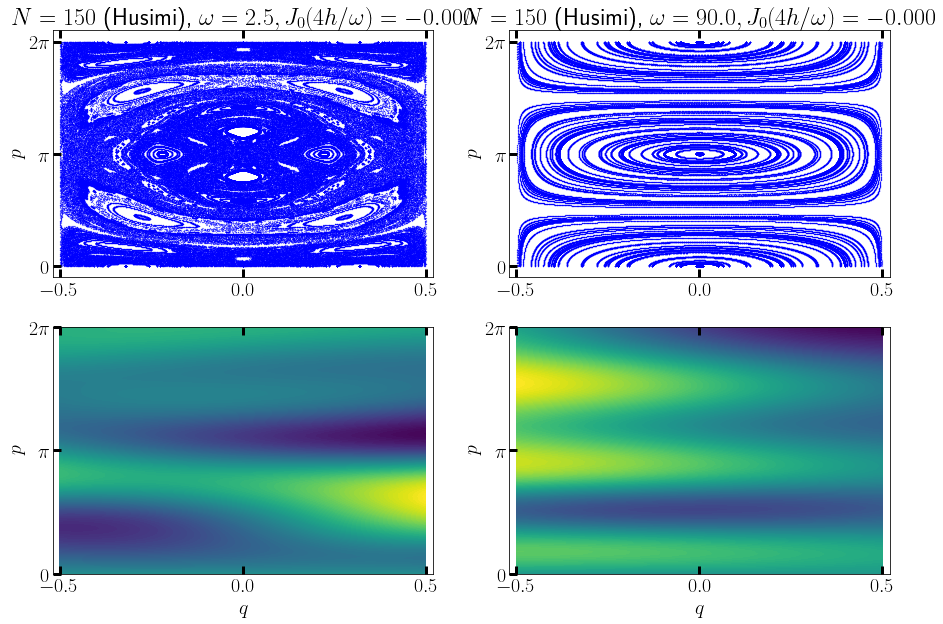

In [48]:
if __name__ == '__main__':
    # Drive parameters
    h0 = 0.0
    omegas = [2.5, 90.0]
    eta = jn_zeros(0,1)
    eta = eta[0]
    
    n_omegas = len(omegas)
    fig, axs = plt.subplots(2, n_omegas, figsize=(15, 10))

    for i, w in enumerate(omegas):
        h_frz = eta * w/4
        print(f"Poincare section dynamics for h = {h_frz} w = {w} with {nprocs} processes ...")   
        start = time.time()
        with Pool(processes = nprocs) as p:
            poincare_data = p.starmap(poincare_sec,[(x0, p0, nmax, (h0, h_frz, w)) for x0, p0 in zip(xv.flatten(), pv.flatten())])
        
        poincare_data = np.vstack(poincare_data)
        qvals = poincare_data[:,0]
        pvals = poincare_data[:,1]
        elapsed =  (time.time() - start)
        print(f"Done in {elapsed} secs")
        
        axs[0,i].set_title(r'$N={:d}$ (Husimi), $\omega = {:2.1f}, J_0(4 h/\omega) = {:1.3f}$'.format(N,w,j0(4*h_frz/w)))
        axs[0,i].scatter(qvals, pvals , color='blue', marker='.', s=.1)  
        
        #Now for the quantum case
        print(f"Husimi plots for h = {h_frz} w = {w} with {nprocs} processes ...")  
        start = time.time()
        params = {'h0':0, 'h':h_frz, 'omega':w, 'N':N, 'opts':opts} 
        H0, H1 = get_hamiltonians(N)
        H = [H0,[H1,drive]]
        T = 2 * np.pi/w
        evecs_f, _ = floquet_modes_mod(H, T, args=params)
        Q_fstate = 0
        for fstate in evecs_f:
            Q_fstate += qfunc(fstate, Q_qvals, Q_pvals)
        
        elapsed =  (time.time() - start)
        print(f"Done in {elapsed} secs")
        axs[1,i].contourf(Q_qvals, Q_pvals, Q_fstate/(2*N+1), 100)
        axs[1,i].set_xlabel(r'$q$')
    
    
    #Formatting
    x_tick = np.array([-0.5, 0.0, 0.5])
    unit   = 1.0
    p_tick = np.arange(0.0, 2.0 + unit, unit)
    p_label = [r"$0$", r"$\pi$", r"$2\pi$"]
    
    for ax in axs.flatten():
        ax.set_xticks(x_tick)
        ax.set_xlim(-0.52, 0.52)
        ax.set_yticks(p_tick*np.pi, p_label)
        ax.set_ylabel(r"$p$")
        ax.tick_params(direction='in', length=8, width=3)
    
    #plt.savefig("lmg_poincare01.svg")
    plt.show()

## Conservation of $S^x$ at freezing, classical and quantum

Here, we compare the quantum evolution of $\langle S^x\rangle$ (both in and out of freezing) with the evolution of $s_x = \sqrt{1-4q^2}\cos{p}$ in the classical case. For the moment, we're choosing random initial conditions for both cases. Below are plots of the relative evolution $\big(\langle S^x(t)\rangle-\langle S^x(0)\rangle\big)/\langle S^x(0)\rangle$ of the quantum case, contrasted with the relative evolution of the classical $\big(s_x(t) -s_x(0)\big)/s_x(0)$, with the drive frequency $\omega=90$ and the amplitude $h$ adjusted both for the freezing case ($J_0(4h/\omega)=0$, lowest root) and out of freezing, with $J_0(4h/\omega)\neq 0$.

CPU times: user 612 ms, sys: 281 ms, total: 893 ms
Wall time: 3min 26s


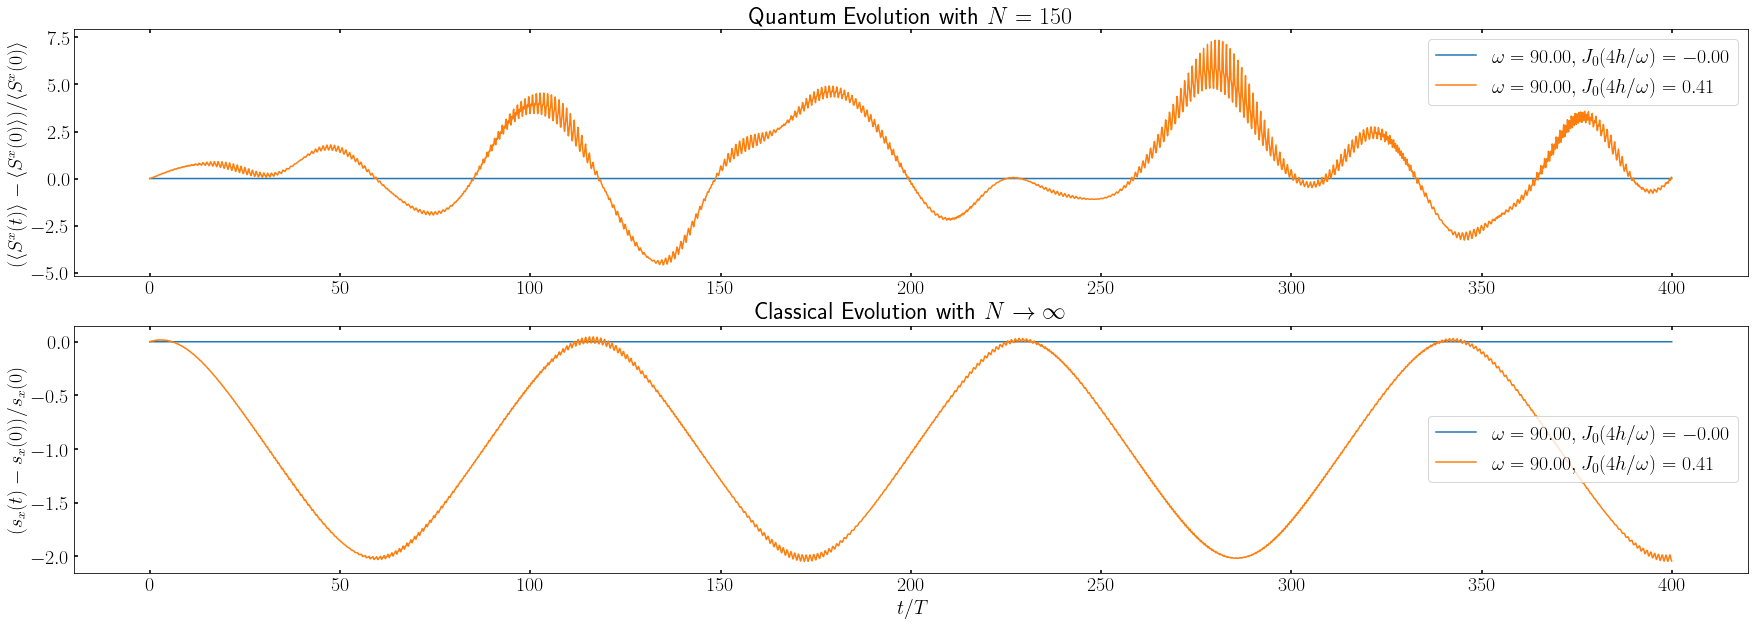

In [25]:
%%time
from qutip import Options, mesolve, rand_ket, parfor
import numpy as np
from scipy.special import jn_zeros
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.figsize": (12, 12),
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 20,
    "font.sans-serif": ["Computer Modern"]})

N = 150
h0 = 0.0
omega = 90
nprocs = 13

fig, (ax_q, ax_c) = plt.subplots(2, 1, figsize=(30, 10))
ax_q.set_title(r"Quantum Evolution with $N={:d}$".format(N))
ax_c.set_title(r"Classical Evolution with $N\rightarrow\infty$")

freezing_pts = jn_zeros(0,3)
psi0 = rand_ket(2*N+1)
qinit = np.random.uniform(-0.5, 0.5)
pinit = np.random.uniform(0.0, 2 * np.pi)
nt = 400
times = np.linspace(0.0, nt*T, nt*10)


def classical_evolve(args):
    h, w = args['h'], args['omega']
    T = 2.0 * np.pi/w
    init = [qinit,pinit]
    p = (0.0, h, w)
    points = odeint(lmg, init, times, args=p)
    points[:,1] = points[:,1] % (2.0 * np.pi)
    qvals, pvals = points[:,0], points[:,1]
    return times/T, np.sqrt(1-4*qvals*qvals) * np.cos(pvals)

def quantum_evolve(args):
    h, w = args['h'], args['omega']
    result = mesolve(H, psi0, times,args=args, e_ops=jmat(N,"x")/N)
    T = 2 * np.pi/w
    return times/T, result.expect[0]

w = omega
T = 2.0 * np.pi/w

h_frz = freezing_pts[0] * w/4
h_nfrz = 0.7 * h_frz

H0, H1 = get_hamiltonians(N)
H = [H0,[H1,drive]]

#Qutip Solver Options
opts = Options(nsteps=1e7, num_cpus=2, openmp_threads=1)
params_frz = {'h0':0, 'h':h_frz, 'omega':w, 'N':N, 'opts':opts}
params_nfrz = {'h0':0, 'h':h_nfrz, 'omega':w, 'N':N, 'opts':opts}

params_arr = [params_frz, params_nfrz]

times_arr, sxq_arr = parfor(quantum_evolve, params_arr)
times_arr, sxc_arr = parfor(classical_evolve, params_arr)

for j, p in enumerate(params_arr):
    h, w = p['h'], p['omega']
    ax_q.plot(times/T, (sxq_arr[j]-sxq_arr[0])/sxq_arr[0], label=r'$\omega = {:2.2f}, J_0(4h/\omega)={:1.2f}$'.format(w, j0(4*h/w)))
    ax_c.plot(times/T, (sxc_arr[j]-sxc_arr[0])/sxc_arr[0], label=r'$\omega = {:2.2f}, J_0(4h/\omega)={:1.2f}$'.format(w, j0(4*h/w)))
    
ax_q.set_ylabel(r'$\big(\langle S^x(t)\rangle - \langle S^x(0)\rangle\big)/\langle S^x(0)\rangle$')
ax_c.set_ylabel(r'$\big(s_x(t) - s_x(0)\big)/s_x(0)$')

ax_c.set_xlabel(r'$t/T$')
#ax_q.set_ylim(-50,50)
#ax_c.set_ylim(-5,5)

ax_q.legend()
ax_c.legend()

### LMG 

LMG Hamiltonian in Hilbert space,
\begin{equation}
H = -\frac{2}{N}\sum \sigma^z_i \sigma^z_j - \sum \sigma^x_i  
\end{equation}
LMG equivalent Totally Symmetric Subspace (TSS), 
\begin{equation}
H = -\frac{2}{N} \hat{S}^z_i \hat{S}^z_j - \hat{S}^x_i = -\frac{2}{N} \big(\hat{S}^z_i\big)^2  - \hat{S}^x_i 
\end{equation}

In [2]:
from qutip import mesolve, basis, jmat

#Modded from qutip to allow parallelism
import numpy as np
import scipy.linalg as la
from numpy import angle, pi
from qutip import Qobj, propagator

def floquet_modes_mod(H, T, args=None, parallel=False, sort=False, U=None):
    """
    Calculate the initial Floquet modes Phi_alpha(0) for a driven system with
    period T.

    Returns a list of :class:`qutip.qobj` instances representing the Floquet
    modes and a list of corresponding quasienergies, sorted by increasing
    quasienergy in the interval [-pi/T, pi/T]. The optional parameter `sort`
    decides if the output is to be sorted in increasing quasienergies or not.

    Parameters
    ----------

    H : :class:`qutip.qobj`
        system Hamiltonian, time-dependent with period `T`

    args : dictionary
        dictionary with variables required to evaluate H

    T : float
        The period of the time-dependence of the hamiltonian. The default value
        'None' indicates that the 'tlist' spans a single period of the driving.

    U : :class:`qutip.qobj`
        The propagator for the time-dependent Hamiltonian with period `T`.
        If U is `None` (default), it will be calculated from the Hamiltonian
        `H` using :func:`qutip.propagator.propagator`.

    Returns
    -------

    output : list of kets, list of quasi energies

        Two lists: the Floquet modes as kets and the quasi energies.

    """
    if 'opts' in args:
        options = args['opts']
    else:
        options = Options()
        options.rhs_reuse = True
        rhs_clear() 
    
    if U is None:
        # get the unitary propagator
        U = propagator(H, T, [], args, parallel=parallel, progressbar=True, options=options)
    
    # find the eigenstates for the propagator
    evals, evecs = la.eig(U.full())

    eargs = angle(evals)

    # make sure that the phase is in the interval [-pi, pi], so that
    # the quasi energy is in the interval [-pi/T, pi/T] where T is the
    # period of the driving.  eargs += (eargs <= -2*pi) * (2*pi) +
    # (eargs > 0) * (-2*pi)
    eargs += (eargs <= -pi) * (2 * pi) + (eargs > pi) * (-2 * pi)
    e_quasi = -eargs / T

    # sort by the quasi energy
    if sort:
        order = np.argsort(-e_quasi)
    else:
        order = list(range(len(evals)))

    # prepare a list of kets for the floquet states
    new_dims = [U.dims[0], [1] * len(U.dims[0])]
    new_shape = [U.shape[0], 1]
    kets_order = [Qobj(np.matrix(evecs[:, o]).T,
                       dims=new_dims, shape=new_shape) for o in order]

    return kets_order, e_quasi[order]


def drive(t, args):
    w = args['omega']
    h = args['h']
    h0 = args['h0']
    return h * np.cos(w*t) + h0

def get_hamiltonians(N):
    sx,sy,sz = jmat(N,"x"),jmat(N,"y"),jmat(N,"z")
    kn =  2.0/N                                      # kacNorm
    H0 = kn * sz **2 
    H1 = 2 * sx
    return H0,H1

def floq_evolv(args):
    N = args['N']
    T = 2 * np.pi/args['omega']
    opts = args['opts']
    H0, H1 = get_hamiltonians(N)
    H = [H0,[H1,drive]]
    f_states, _ = floquet_modes_mod(H, T, args=args)
    return f_states


print("Definitions complete!")

Definitions complete!


CPU times: user 14.4 s, sys: 3.55 s, total: 17.9 s
Wall time: 14.4 s


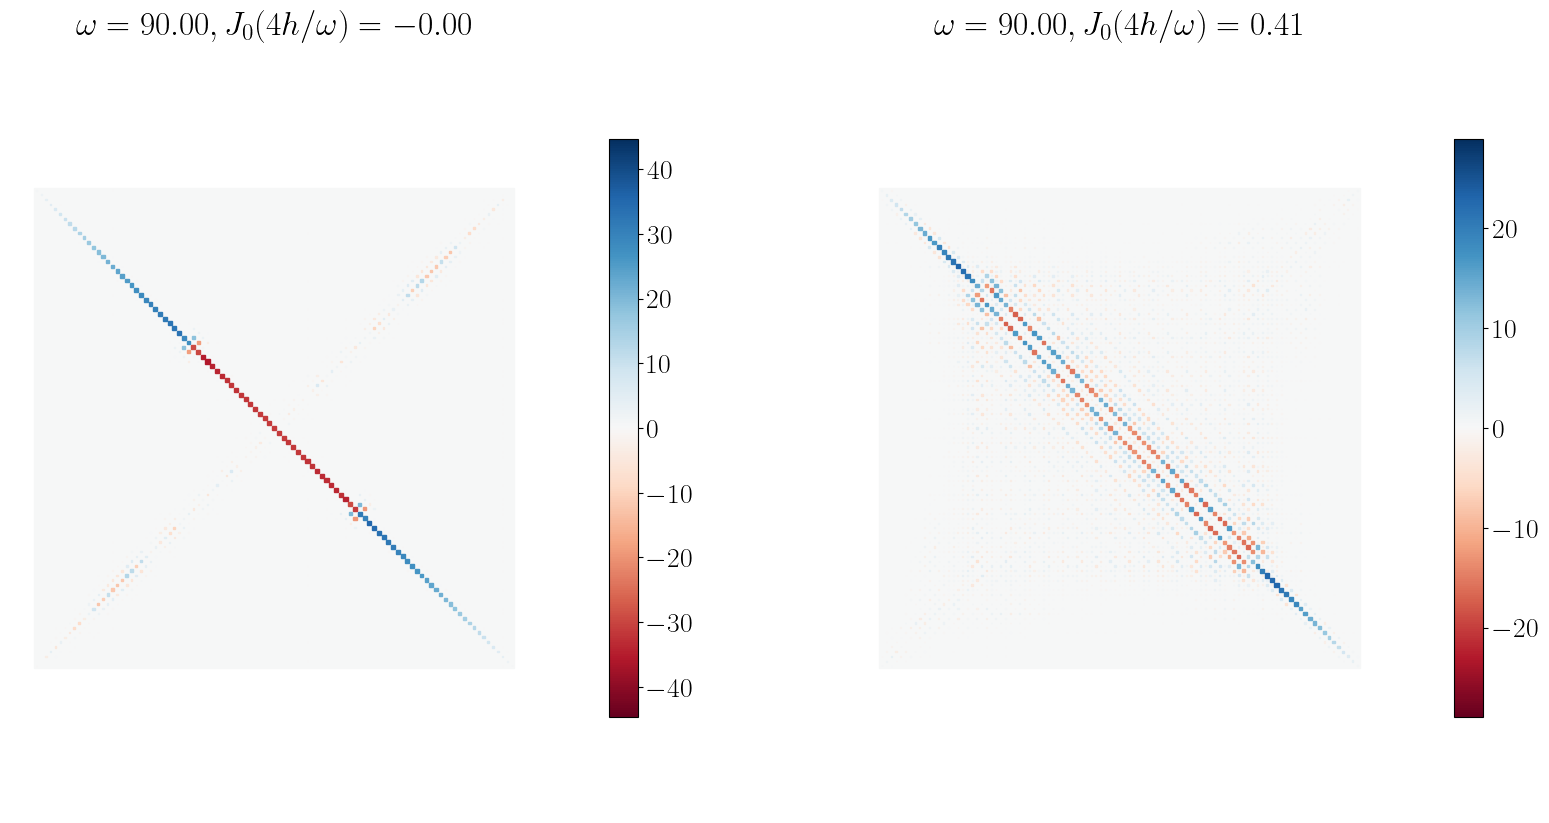

In [6]:
%%time
from qutip import Qobj, hinton, Options, jmat, matrix_histogram
import numpy as np
from multiprocessing import Pool
from tqdm import tqdm
from scipy.special import jn_zeros, j0
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.figsize": (20, 10),
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 20,
    "font.sans-serif": ["Computer Modern"]})


freezing_pts = jn_zeros(0,3)
####################################################################################################
#
#                                     Exact Dynamics
#
####################################################################################################


N = 50
h0 = 0.0
# no anti-diagonal in frozen HF for w =80
# anti-diagonal appears in frozen HF for w =82

omega = 90
nprocs = 8

w = omega
T = 2.0 * np.pi/w

h_frz = freezing_pts[0] * omega/4
h_nfrz = 0.7 * h_frz

H0, H1 = get_hamiltonians(N)
H = [H0,[H1,drive]]
fig, axs = plt.subplots(1,2)
opts = Options(nsteps=1e5, num_cpus=13, openmp_threads=13)

params_frz = {'h0':0, 'h':h_frz, 'omega':w, 'N':N, 'opts':opts}
params_nfrz = {'h0':0, 'h':h_nfrz, 'omega':w, 'N':N, 'opts':opts}
sx = jmat(N,"x")
en, st = sx.eigenstates()

for i,p in enumerate([params_frz, params_nfrz]):
    h, w = p['h'], p['omega']
    f_modes, f_energies = floquet_modes_mod(H, T, args=p, parallel=True)
    HF = 0.
    for j, Omega in enumerate(f_energies):
        HF += Omega * f_modes[j].proj()
    
    HF = HF.transform(st)
    fig, ax = hinton(HF.tidyup(atol=1e-7), ax=axs[i], xlabels=False, ylabels=False)
    ax.set_title(r'$\omega = {:1.2f}, J_0(4h/\omega)={:1.2f} $'.format(w, j0(4*h/w)))

### RWA zeroth order

\begin{equation}
H_{RWA}^0 = -\frac{2}{N}\Bigg[\frac{N}{2}\Big(\frac{N}{2}+1\Big) - \big(S^x\big)^2\Bigg]  -\frac{2}{N}\Big[\big(S^z\big)^2 - \big(S^y\big)^2\Big]  
\end{equation}

CPU times: user 4.42 s, sys: 2.66 s, total: 7.08 s
Wall time: 4.4 s


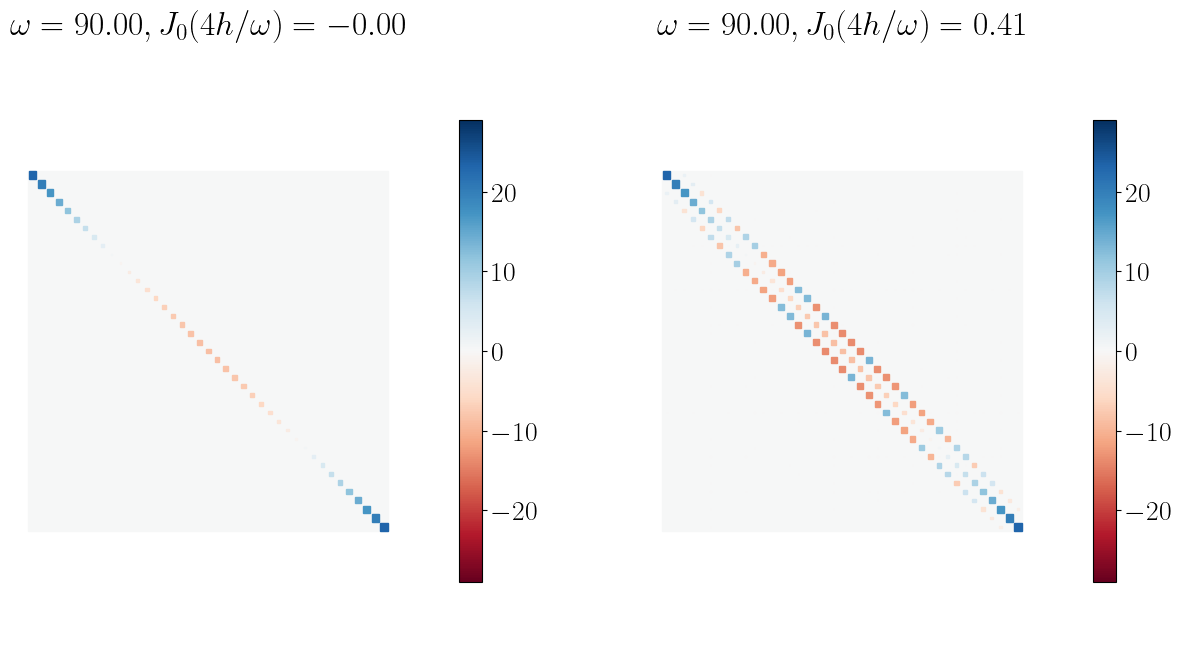

In [7]:
%%time
from qutip import Qobj, hinton, Options, jmat, matrix_histogram
import numpy as np
from multiprocessing import Pool
from tqdm import tqdm
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.special import j0, jn,jn_zeros
from numpy import angle, pi
from qutip import Qobj

def get_hamiltonians_RWA(N, args):
    w = args['omega']
    h = args['h']
    sx,sy,sz = jmat(N,"x"),jmat(N,"y"),jmat(N,"z")
    kn =  2.0/N   
    H0 = -kn * (N/2 *(N/2+1) - sx*sx) 
    H0 += (-2* kn) * (sz*sz - sy*sy) * j0(4*h/w)
    return H0

plt.rcParams.update({
    "figure.figsize": (15, 8),
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 20,
    "font.sans-serif": ["Computer Modern"]})


freezing_pts = jn_zeros(0,3)

N = 20
h0 = 0.0
omega = 90
w = omega
T = 2.0 * np.pi/w
h_frz = freezing_pts[0] * omega/4
h_nfrz = 0.7 * h_frz

nprocs = 6
fig, axs = plt.subplots(1,2)
opts = Options(nsteps=1e5, num_cpus=nprocs, openmp_threads=1)

params_frz = {'h0':0, 'h':h_frz, 'omega':w, 'N':N, 'opts':opts}
params_nfrz = {'h0':0, 'h':h_nfrz, 'omega':w, 'N':N, 'opts':opts}
sx = jmat(N,"x")
en, st = sx.eigenstates()

for i,p in enumerate([params_frz, params_nfrz]):
    H0= get_hamiltonians_RWA(N, p)
    H = [H0]
    h, w = p['h'], p['omega']
    f_modes, f_energies = floquet_modes_mod(H, T, args=p, parallel=True)
    HF = 0.
    for j, Omega in enumerate(f_energies):
        HF += Omega * f_modes[j].proj()
    
    HF = HF.transform(st)
    fig, ax = hinton(HF.tidyup(atol=1e-7), ax=axs[i], xlabels=False, ylabels=False)
    ax.set_title(r'$\omega = {:1.2f}, J_0(4h/\omega)={:1.2f} $'.format(w, j0(4*h/w)))

### Discussion:

   So far we have investigated Inverse Participation Ratio (IPR) for floquet modes of $\bf exact$ dynamics of LMG model. We have studied the hinton weight matrix plot for states of floquet Hamiltonian. It is found that at the freezing points, which corresponds to roots of Bessel function of 1st kind, there are weight points in Hinton plot at antidiagonal axis in addition to diagonal elements. The floquet states are obtained after diagonalisation of the unitary progation of the Hamiltonian after one time period (which is basic floquet engineering for periodically driven system). So, it is obvious that there are states which do not participate perfect diagonalistion.


   Next we tried to find the floquet IPR for Hamiltonian approximated with Rotated wave approximation (RWA). We tested (see the above plots) at zeroth order and found that there is no anti diagonal or sub-diagonal or super-diagonal weight element present in Hinton plot. So we tried next higher order terms in the RWA Hamiltonian.


The full Hamiltonian for the LMG model in the rotated basis (which is $S_x$) is

\begin{equation}
\tilde{H}(t) = -\frac{1}{N}\Bigg[\frac{N}{2}\Big(\frac{N}{2}+1\Big) - \big(S^x\big)^2\Bigg]  -\frac{2}{N}\Big[\big(S^z\big)^2 - \big(S^y\big)^2\Big] \Bigg[\frac12 J_0(\eta) + \sum^\infty_{n=1}J_{2n}(\eta)\cos{\big(2n\omega t\big)}\Bigg] -\frac{2}{N} \big\{S^y, S^z \big\} \sum^\infty_{n=1}J_{2n-1}(\eta)\sin{\Big[\big(2n-1\big)\omega t\Big]}
\end{equation} 

According to RWA we try to ommit fast oscillating term. So when $n=1$ or n is odd, term with "cosine" should be neglected and when n is even term with "sine" should be neglected.

#### First order correction
So the first order correction to $H_{RWA}$ is

\begin{equation*}
\tilde{H}(t) = -\Big(\frac{N}{2}+1\Big) + \frac{2}{N}\big(S^x\big)^2  -\frac{2}{N} J_0(\eta)\Big[\big(S^z\big)^2 - \big(S^y\big)^2\Big]  -\frac{4}{N} \big\{S^y, S^z \big\}J_1(\eta)\sin{\omega t}
\end{equation*}

In [ ]:
from qutip import mesolve, basis, jmat

#Modded from qutip to allow parallelism
import numpy as np
import scipy.linalg as la
from scipy.special import j0, jn
from numpy import angle, pi
from qutip import Qobj, propagator
from qutip import mesolve, basis, jmat

def floquet_modes_mod(H, T, args=None, parallel=False, sort=False, U=None):
    if 'opts' in args:
        options = args['opts']
    else:
        options = Options()
        options.rhs_reuse = True
        rhs_clear() 
    
    if U is None:
        # get the unitary propagator
        U = propagator(H, T, [], args, parallel=parallel, progressbar=True, options=options)
    
    # find the eigenstates for the propagator
    evals, evecs = la.eig(U.full())

    eargs = angle(evals)

    # make sure that the phase is in the interval [-pi, pi], so that
    # the quasi energy is in the interval [-pi/T, pi/T] where T is the
    # period of the driving.  eargs += (eargs <= -2*pi) * (2*pi) +
    # (eargs > 0) * (-2*pi)
    eargs += (eargs <= -pi) * (2 * pi) + (eargs > pi) * (-2 * pi)
    e_quasi = -eargs / T

    # sort by the quasi energy
    if sort:
        order = np.argsort(-e_quasi)
    else:
        order = list(range(len(evals)))

    # prepare a list of kets for the floquet states
    new_dims = [U.dims[0], [1] * len(U.dims[0])]
    new_shape = [U.shape[0], 1]
    kets_order = [Qobj(np.matrix(evecs[:, o]).T,
                       dims=new_dims, shape=new_shape) for o in order]

    return kets_order, e_quasi[order]

def drive1(t, args):
    n = 1
    w, h, h0 = args['omega'], args['h'], args['h0']
    return jn(2*n-1,4*h/w) * np.sin((2*n-1)*w*t)

def get_hamiltonians_RWA(N, args):
    w = args['omega']
    h = args['h']
    sx,sy,sz = jmat(N,"x"),jmat(N,"y"),jmat(N,"z")
    kn =  2.0/N   
    H0 = -kn * (N/2 *(N/2+1) - sx*sx) 
    H0 += (-2* kn) * (sz*sz - sy*sy) * j0(4*h/w)
    H1 = -2 * kn * (sy*sz + sz*sy)
    return H0,H1

def floq_evolv(args):
    N = args['N']
    T = 2 * np.pi/args['omega']
    opts = args['opts']
    H0, H1 = get_hamiltonians(N)
    H = [H0,[H1,drive1]]
    f_states, _ = floquet_modes_mod(H, T, args=args)
    return f_states

def get_hamiltonians_rwa_horder(N,args):
    w = args['omega']
    h = args['h']
    sx,sy,sz = jmat(N,"x"),jmat(N,"y"),jmat(N,"z")
    kn =  2.0/N   
    
    H0 = -kn * (N/2 *(N/2+1) - sx*sx) 
    H0 += (-2* kn) * (sz*sz - sy*sy) * j0(4*h/w)
    H1 = -2 * kn * (sy*sz + sz*sy)
    H2 = -2 * kn * (sz*sz - sy*sy)
    return H0,H1,H2


print("Definitions complete!")

Definitions complete!


CPU times: user 3.72 s, sys: 2.42 s, total: 6.14 s
Wall time: 3.38 s


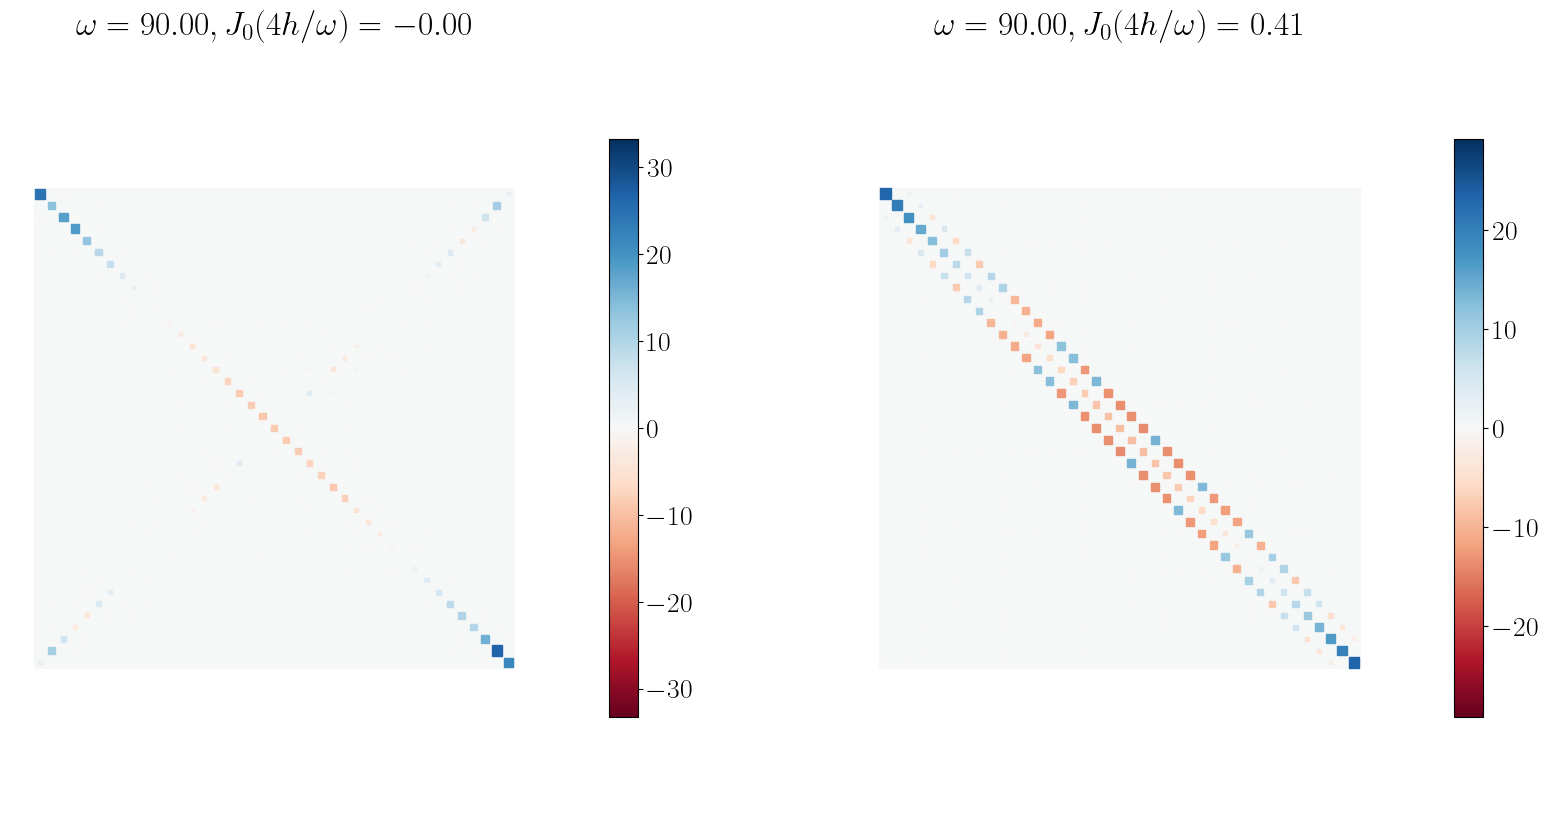

In [5]:
%%time
from qutip import Qobj, hinton, Options, jmat, matrix_histogram
import numpy as np
from multiprocessing import Pool
from tqdm import tqdm
from scipy.special import jn_zeros
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.figsize": (20, 10),
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 20,
    "font.sans-serif": ["Computer Modern"]})


freezing_pts = jn_zeros(0,5)

N = 20
h0 = 0.0
omega = 90
w = omega
T = 2.0 * np.pi/w
h_frz = freezing_pts[0] * omega/4
h_nfrz = 0.7 * h_frz

nprocs = 4
fig, axs = plt.subplots(1,2)
opts = Options(nsteps=1e5, num_cpus=nprocs, openmp_threads=1)

params_frz = {'h0':0, 'h':h_frz, 'omega':w, 'N':N, 'opts':opts}
params_nfrz = {'h0':0, 'h':h_nfrz, 'omega':w, 'N':N, 'opts':opts}
sx = jmat(N,"x")
en, st = sx.eigenstates()

for i,p in enumerate([params_frz, params_nfrz]):
    H0,H1 = get_hamiltonians_RWA(N, p)
    H = [H0,[H1,drive1]]
    h, w = p['h'], p['omega']
    f_modes, f_energies = floquet_modes_mod(H, T, args=p, parallel=True)
    HF = 0.
    for j, Omega in enumerate(f_energies):
        HF += Omega * f_modes[j].proj()
    
    HF = HF.transform(st)
    #fig, ax = hinton(HF.tidyup(atol=1e-7), ax=axs[i], xlabels=False, ylabels=False)
    fig, ax = hinton(HF, ax=axs[i], xlabels=False, ylabels=False)
    ax.set_title(r'$\omega = {:1.2f}, J_0(4h/\omega)={:1.2f} $'.format(w, j0(4*h/w)))

0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
1it [00:03,  3.93s/it]
100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2136.68it/s]

100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2511.56it/s]
2it [00:08,  4.33s/it]
100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 6150.01it/s]

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 5125.00it/s]
3it [00:12,  4.14s/it]


CPU times: user 8.41 s, sys: 9.64 s, total: 18.1 s
Wall time: 12.6 s


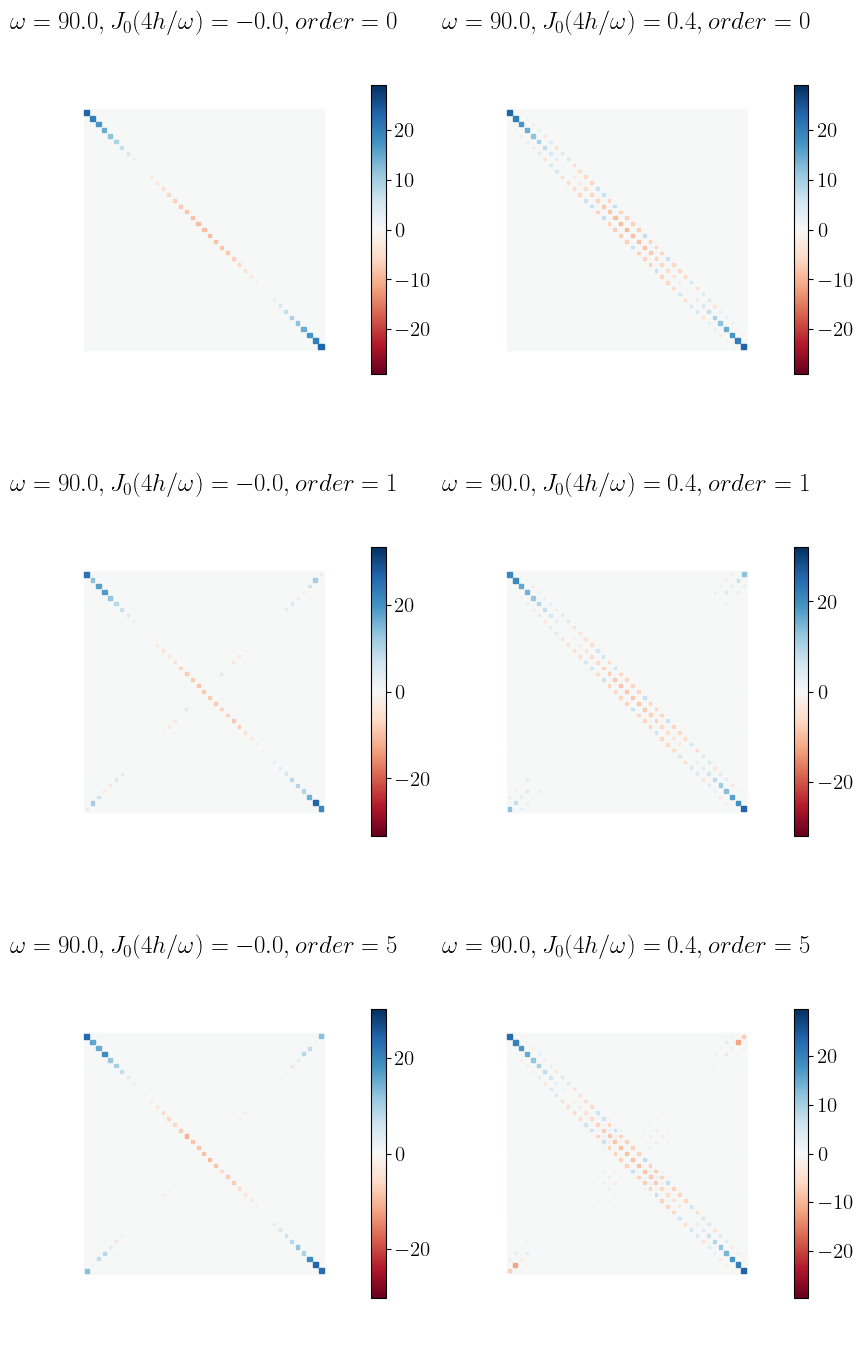

In [73]:
%%time
from qutip import Qobj, hinton, Options, jmat, matrix_histogram
import numpy as np
from multiprocessing import Pool
from tqdm import tqdm
from scipy.special import jn_zeros
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.figsize": (20, 10),"text.usetex": True,"font.family": "sans-serif",
    "font.size": 15,"font.sans-serif": ["Computer Modern"]})
freezing_pts = jn_zeros(0,5)

N = 20
orders = [0,1,5]

kn = 2/N
h0 = 0.0
omega = 90
w = omega
T = 2.0 * np.pi/w
h_frz = freezing_pts[0] * omega/4
h_nfrz = 0.7 * h_frz

nprocs = 4
opts = Options(nsteps=1e5, num_cpus=nprocs, openmp_threads=1)
fig, axs = plt.subplots(len(orders), 2, figsize=(10,17))
#fig.suptitle(fr'Ising nn $ \phi_{{IPR}}$ : $N = {len(fbz)}$')


params_frz = {'h0':0, 'h':h_frz, 'omega':w, 'N':N, 'opts':opts}
params_nfrz = {'h0':0, 'h':h_nfrz, 'omega':w, 'N':N, 'opts':opts}
sx = jmat(N,"x")
en, st = sx.eigenstates()

for m,order in tqdm(enumerate(orders)):
    for i,p in enumerate([params_frz, params_nfrz]):
        h, w = p['h'], p['omega']
        omega = w
        H0,H1,H2 = get_hamiltonians_rwa_horder(N, p)
        H = [H0]

        for n in tqdm(range(1,order+1)):        
            # even order
            if(n%2)!=1:
                cos_drive = 'cos((' + str(2*n) + '*omega'')*t)'
                H.append([H1*jn(2*n, 4*h/w), cos_drive])

            # odd order
            if(n%2)==1:
                sin_drive = 'sin((' + str(2*n-1) + '*omega'')*t)'
                H.append([H2*jn(2*n-1,4*h/w), sin_drive])

        f_modes, f_energies = floquet_modes_mod(H, T, args=p, parallel=True)
        HF = 0.0
        for j, Omega in enumerate(f_energies):
            HF += Omega * f_modes[j].proj()

        HF = HF.transform(st)
        fig, ax = hinton(HF.tidyup(atol=1e-7), ax=axs[m,i], xlabels=False, ylabels=False)
        #fig, ax = hinton(HF, ax=axs[i], xlabels=False, ylabels=False)
        axs[m,i].set_title(r'$\omega = {:1.1f}, J_0(4h/\omega)={:1.1f}, order={:3d} $'.format(w, j0(4*h/w),order))
        

# RWA to higher orders

The full Hamiltonian for the LMG model in the rotated basis is

\begin{equation}
\tilde{H}(t) = -\frac{2}{N}\Bigg[\frac{N}{2}\big(\frac{N}{2}+1\big) - \big(S^x\big)^2\Bigg]  -\frac{4}{N}\Big[\big(S^z\big)^2 - \big(S^y\big)^2\Big] \Bigg[\frac12 J_0(\eta) + \sum^\infty_{n=1}J_{2n}(\eta)\cos{\big(2n\omega t\big)}\Bigg] -\frac{4}{N} \big\{S^y, S^z \big\} \sum^\infty_{n=1}J_{2n-1}(\eta)\sin{\Big[\big(2n-1\big)\omega t\Big]}
\end{equation}

We can numerically obtain successive approximations for $H_F$ by truncating this series to higher orders to probe for the emergene of the anti-diagonal terms in $H_F$ in the $S^x$ representation.

In [6]:
from qutip import mesolve, basis, jmat

#Modded from qutip to allow parallelism
import numpy as np
import scipy.linalg as la
from numpy import angle, pi
from qutip import Qobj, propagator
from scipy.special import j0, jn, jn_zeros

def floquet_modes_mod(H, T, args=None, parallel=False, sort=False, U=None):
    """
    Calculate the initial Floquet modes Phi_alpha(0) for a driven system with
    period T.

    Returns a list of :class:`qutip.qobj` instances representing the Floquet
    modes and a list of corresponding quasienergies, sorted by increasing
    quasienergy in the interval [-pi/T, pi/T]. The optional parameter `sort`
    decides if the output is to be sorted in increasing quasienergies or not.

    Parameters
    ----------

    H : :class:`qutip.qobj`
        system Hamiltonian, time-dependent with period `T`

    args : dictionary
        dictionary with variables required to evaluate H

    T : float
    return jn(2*n,4*h/w) * np.cos(2*n*w*t)
        The period of the time-dependence of the hamiltonian. The default value
        'None' indicates that the 'tlist' spans a single period of the driving.

    U : :class:`qutip.qobj`
        The propagator for the time-dependent Hamiltonian with period `T`.
        If U is `None` (default), it will be calculated from the Hamiltonian
        `H` using :func:`qutip.propagator.propagator`.

    Returns
    -------

    output : list of kets, list of quasi energies

        Two lists: the Floquet modes as kets and the quasi energies.

    """
    if 'opts' in args:
        options = args['opts']
    else:
        options = Options()
        options.rhs_reuse = True
        rhs_clear() 
    
    if U is None:
        # get the unitary propagator
        U = propagator(H, T, [], args, parallel=parallel, progressbar=True, options=options)
    
    # find the eigenstates for the propagator
    evals, evecs = la.eig(U.full())

    eargs = angle(evals)

    # make sure that the phase is in the interval [-pi, pi], so that
    # the quasi energy is in the interval [-pi/T, pi/T] where T is the
    # period of the driving.  eargs += (eargs <= -2*pi) * (2*pi) +
    # (eargs > 0) * (-2*pi)
    eargs += (eargs <= -pi) * (2 * pi) + (eargs > pi) * (-2 * pi)
    e_quasi = -eargs / T

    # sort by the quasi energy
    if sort:
        order = np.argsort(-e_quasi)
    else:
        order = list(range(len(evals)))

    # prepare a list of kets for the floquet states
    new_dims = [U.dims[0], [1] * len(U.dims[0])]
    new_shape = [U.shape[0], 1]
    kets_order = [Qobj(np.matrix(evecs[:, o]).T,
                       dims=new_dims, shape=new_shape) for o in order]

    return kets_order, e_quasi[order]


def drive(t, args):
    w = args['omega']
    h = args['h']
    h0 = args['h0']
    return h * np.cos(w*t) + h0

def get_hamiltonians_rwa_horder(N,args):
    w = args['omega']
    h = args['h']
    sx,sy,sz = jmat(N,"x"),jmat(N,"y"),jmat(N,"z")
    kn =  2.0/N   
    
    H0 = -kn * (N/2 *(N/2+1) - sx*sx) 
    H0 += (-2* kn) * (sz*sz - sy*sy) * j0(4*h/w)
    H1 = -2 * kn * (sy*sz + sz*sy)
    H2 = -2 * kn * (sz*sz - sy*sy)
    return H0,H1,H2

def floq_evolv(args):
    N = args['N']
    T = 2 * np.pi/args['omega']
    opts = args['opts']
    H0, H1 = get_hamiltonians(N)
    H = [H0,[H1,drive]]
    f_states, _ = floquet_modes_mod(H, T, args=args)
    return f_states

print("Definitions complete!")

Definitions complete!


In [7]:
def drive1(t, args):
    n = 1
    w, h, h0 = args['omega'], args['h'], args['h0']
    return jn(2*n-1,4*h/w) * np.sin((2*n-1)*w*t)
def drive2(t, args):
    n = 2
    w, h, h0 = args['omega'], args['h'], args['h0']
    return jn(2*n,4*h/w) * np.cos(2*n*w*t)
def drive3(t, args):
    n = 3
    w, h, h0 = args['omega'], args['h'], args['h0']
    return jn(2*n-1,4*h/w) * np.sin((2*n-1)*w*t)
def drive4(t, args):
    n = 4
    w, h, h0 = args['omega'], args['h'], args['h0']
    return jn(2*n,4*h/w) * np.cos(2*n*w*t)

CPU times: user 3.63 s, sys: 2.36 s, total: 5.99 s
Wall time: 3.35 s


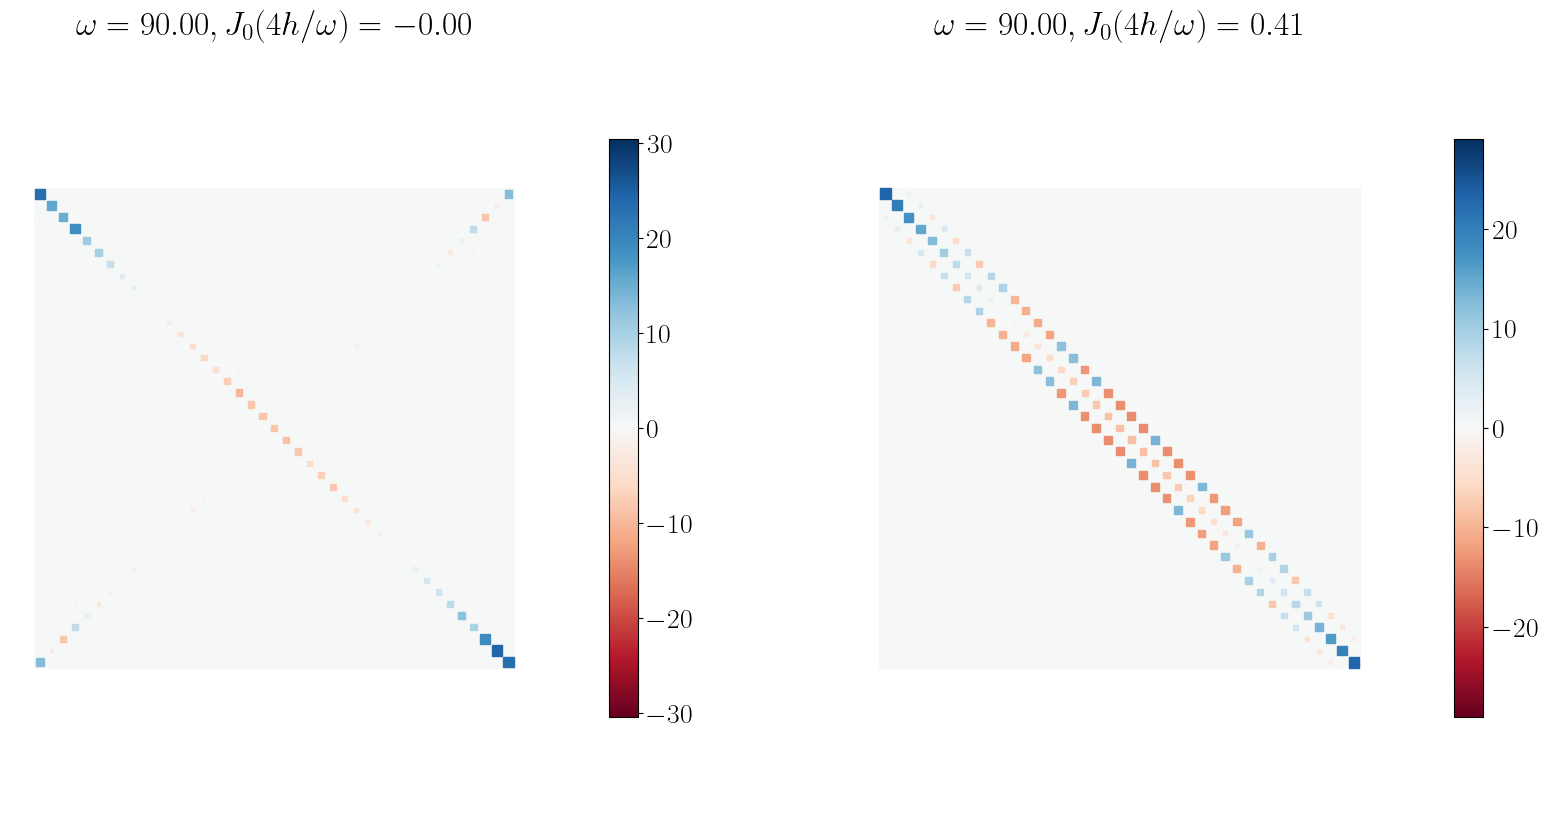

In [8]:
%%time
from qutip import Qobj, hinton, Options, jmat, matrix_histogram
import numpy as np
from multiprocessing import Pool
from tqdm import tqdm
from scipy.special import jn_zeros
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.figsize": (20, 10),
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 20,
    "font.sans-serif": ["Computer Modern"]})


freezing_pts = jn_zeros(0,5)

N = 20
h0 = 0.0
omega = 90
w = omega
T = 2.0 * np.pi/w
h_frz = freezing_pts[0] * omega/4
h_nfrz = 0.7 * h_frz

nprocs = 4
fig, axs = plt.subplots(1,2)
opts = Options(nsteps=1e5, num_cpus=nprocs, openmp_threads=1)

params_frz = {'h0':0, 'h':h_frz, 'omega':w, 'N':N, 'opts':opts}
params_nfrz = {'h0':0, 'h':h_nfrz, 'omega':w, 'N':N, 'opts':opts}
sx = jmat(N,"x")
en, st = sx.eigenstates()

for i,p in enumerate([params_frz, params_nfrz]):
    H0,H1,H2 = get_hamiltonians_rwa_horder(N, p)
    #H = [H0,[H1,drive1],[H2,drive2],[H1,drive3], [H2,drive4]]
    H = [H0,[H1,drive1],[H2,drive2],[H1,drive3], [H2,drive4]]
    h, w = p['h'], p['omega']
    f_modes, f_energies = floquet_modes_mod(H, T, args=p, parallel=True)
    HF = 0.0
    for j, Omega in enumerate(f_energies):
        HF += Omega * f_modes[j].proj()
    
    HF = HF.transform(st)
    #fig, ax = hinton(HF.tidyup(atol=1e-7), ax=axs[i], xlabels=False, ylabels=False)
    fig, ax = hinton(HF, ax=axs[i], xlabels=False, ylabels=False)
    ax.set_title(r'$\omega = {:1.2f}, J_0(4h/\omega)={:1.2f} $'.format(w, j0(4*h/w)))

# Compare exact and rwa LMG

In [2]:
from qutip import mesolve, basis, jmat
import numpy as np
import scipy.linalg as la
from numpy import angle, pi
from qutip import Qobj, propagator
import time as time
import matplotlib.pyplot as plt

def floquet_modes_mod(H, T, args=None, parallel=False, sort=False, U=None):
    if 'opts' in args:
        options = args['opts']
    else:
        options = Options()
        options.rhs_reuse = True
        rhs_clear() 
    
    if U is None:
        # get the unitary propagator
        U = propagator(H, T, [], args, parallel=parallel, progressbar=True, options=options)
    
    # find the eigenstates for the propagator
    evals, evecs = la.eig(U.full())

    eargs = angle(evals)
    eargs += (eargs <= -pi) * (2 * pi) + (eargs > pi) * (-2 * pi)
    e_quasi = -eargs / T

    # sort by the quasi energy
    if sort:
        order = np.argsort(-e_quasi)
    else:
        order = list(range(len(evals)))

    # prepare a list of kets for the floquet states
    new_dims = [U.dims[0], [1] * len(U.dims[0])]
    new_shape = [U.shape[0], 1]
    kets_order = [Qobj(np.matrix(evecs[:, o]).T,
                       dims=new_dims, shape=new_shape) for o in order]

    return kets_order, e_quasi[order]


def drive_exact(t, args):
    w = args['omega']
    h = args['h']
    h0 = args['h0']
    return h * np.cos(w*t) + h0

def get_hamiltonians_exact(args):
    N = args['N']
    sx,sy,sz = jmat(N,"x"),jmat(N,"y"),jmat(N,"z")
    kn =  4.0/N                                      # kacNorm
    H0 = kn * sz **2
    H1 = 2 * sx
    return H0,H1

def floq_evolv_exact(args):
    T = 2 * np.pi/args['omega']
    H0, H1 = get_hamiltonians_exact(args)
    H = [H0,[H1,drive_exact]]
    f_states, _ = floquet_modes_mod(H, T, args=args)
    return f_states

print("Definitions complete!")

Definitions complete!


In [3]:
###   RWA CODES

def get_hamiltonians_RWA(N, args):
    w = args['omega']
    h = args['h']
    h0 = args['h0']
    sx,sy,sz = jmat(N,"x"),jmat(N,"y"),jmat(N,"z")
    kn =  2.0/N   
    
    H0 = -kn * (N/2 *(N/2+1) - sx*sx) - h0 * 2*sx
    H0 += (-kn) * (sz*sz - sy*sy) * j0(4*h/w)
    H1 = -2 * kn * (sz*sz - sy*sy)
    H2 = -2 * kn * (sy*sz + sz*sy)
    return H0,H1,H2

def floq_evolv_RWA1(args):
    N = args['N']
    h = args['h']
    T = 2 * np.pi/args['omega']
    opts = args['opts']
    order = args['order']
    omega = args['omega']
    H0, H1, H2 = get_hamiltonians_RWA(N,args)
    if order==0:
        f_states, _ = floquet_modes_mod(H0, T, args=args)
    else:
        H = [H0]
        for n in range(1,order+1): 
            # even order
            if n%2==0:
                cos_drive = 'cos((' + str(n) + '*omega'')*t)'
                H.append([H1*jn(n, 4*h/w), cos_drive])

            # odd order
            #if(n%2)!=1:
            else:
                sin_drive = 'sin((' + str(n) + '*omega'')*t)'
                H.append([H2*jn(n,4*h/w), sin_drive])
        f_states, _ = floquet_modes_mod(H, T, args=args)
        
    return f_states

def floq_evolv_RWA(args):
    N = args['N']
    h = args['h']
    T = 2 * np.pi/args['omega']
    opts = args['opts']
    order = args['order']
    omega = args['omega']
    H0, H1, H2 = get_hamiltonians_RWA(N,args)
    if order==0:
        f_states, _ = floquet_modes_mod(H0, T, args=args)
    else:
        H = [H0]
        for n in np.arange(1,order+1,2): 
            sin_drive = 'sin((' + str(n) + '*omega'')*t)'
            H.append([H2*jn(n,4*h/w), sin_drive])
            
        for m in np.arange(2,order+1,2):     
            cos_drive = 'cos((' + str(m) + '*omega'')*t)'
            H.append([H1*jn(m, 4*h/w), cos_drive])
            
        f_states, _ = floquet_modes_mod(H, T, args=args)
        
    return f_states

print("Definitions complete!")

Definitions complete!


running for 2N+1 =  81 with 14 processors
running for order =  exact


100%|██████████████████████████████████████████████████████| 55/55 [00:00<00:00, 14554.37it/s]


running for order =  1


100%|██████████████████████████████████████████████████████| 55/55 [00:00<00:00, 11897.20it/s]


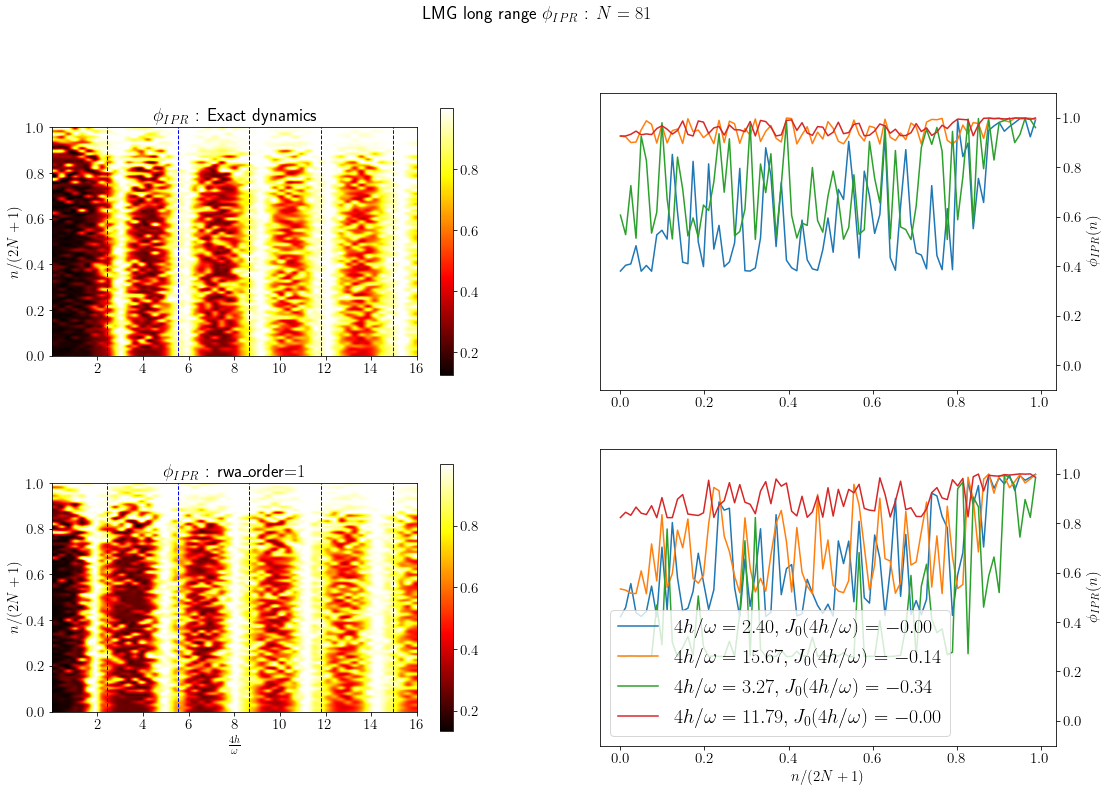

timt taken  0.7201925158500672  minute


In [30]:
import numpy as np
import scipy.linalg as la
from numpy import angle, pi
from qutip import Qobj, propagator, jmat, Options
from multiprocessing import Pool
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.special import j0, jn_zeros, jn
from scipy.interpolate import make_interp_spline
from scipy.signal import savgol_filter
startsss = time.time()
plt.rcParams.update({
    "figure.figsize": (30, 35),"text.usetex": True,"font.family": "sans-serif",
    "font.size": 15,"font.sans-serif": ["Computer Modern"]})


delta = 0.0
freezing_pts = jn_zeros(0,5)+delta

N = 40
h0 = N/8
omega = 90
nprocs = 14
orders = ['exact', 1]
w = omega

hsteps = 50
h1 = (1/4) * omega * 0.01
h2 = (1/4) * omega * 16.0
hroots = freezing_pts * omega/4
hs = np.linspace(h1, h2, hsteps)
hs = np.sort(np.append(hs, hroots))
etas = 4 * hs/w

p = Pool(processes = nprocs)          
print("running for 2N+1 = ", 2*N+1, "with",nprocs,"processors")  
fig, axs = plt.subplots(len(orders), 2, figsize=(18,12))
fig.suptitle(fr'LMG long range $ \phi_{{IPR}}$ : $N = {2*N+1}$')

for i,order in enumerate(orders):
    print('running for order = ',order)
    if order == 'exact':
        p = Pool(processes = nprocs)         
        #Qutip Solver Options
        opts = Options(nsteps=1e5, num_cpus=1, openmp_threads=1)
        params = [{'h0':h0, 'h':h, 'omega':omega, 'N':N, 'opts':opts} for h in hs]
        f_stateslist = p.map(floq_evolv_exact,tqdm(params, position=0, leave=True))
        
        iprmat = np.zeros((len(hs),2*N+1))
        sx = jmat(N,"x")
        en, st = sx.eigenstates()

        for xx,h in enumerate(hs):
            f_states = f_stateslist[xx]
            iprmat[xx,:] = [np.sum([np.abs(state.overlap(sx_ev))**4 for sx_ev in st]) for state in f_states]
        
        axs[i, 0].set_title(fr'$\phi_{{IPR}}$ : Exact dynamics')
        # find minimum of minima & maximum of maxima
        minmin = np.min(np.min(iprmat))
        maxmax = np.max(np.max(iprmat))
        asp = 10
        #ipr_ax.set_xlabel(r'$\frac{4h}{\omega}$')
        axs[i, 0].set_ylabel(r'$n/(2N+1)$')

        for pt in freezing_pts:
            axs[i, 0].axvline(x=pt, color='blue', linestyle="--",linewidth=1.0)

        im = axs[i, 0].imshow(iprmat.T, aspect=asp, interpolation='spline16',\
                        cmap='hot', origin='lower',extent = [etas[0] , etas[-1], 0 , 1], vmax=maxmax, vmin=minmin)
        
        fig.colorbar(im, ax=axs[i, 0], orientation='vertical', shrink=0.9)
        
        #Freezing point
        idx, = np.where(np.isclose(etas, freezing_pts[0], atol=0.03))
        n0 = idx[0]

        #High IPR
        idx = np.where(np.isclose(etas, 10.0, atol=0.5))
        n1 = idx[0][0]+20

        #Intermediate IPR
        idx, = np.where(np.isclose(etas, 3.5, atol=0.5))
        n2 = idx[0]

        #Another IPR
        idx, = np.where(np.isclose(etas, freezing_pts[3], atol=0.005))
        n3 = idx[0]

        for j, n in enumerate([n0,n1, n2, n3]):
            xdata = np.arange(2*N+1)/(2*N+1)
            ydata =  iprmat[n]
            axs[i, 1].plot(xdata, ydata, label=fr"$4h/\omega={etas[n]:1.2f}, J_0(4h/\omega)={j0(etas[n]):1.2f}$")


        #axs[i, 1].set_xlabel(r"$n/(2N+1)$")
        axs[i, 1].yaxis.tick_right()
        axs[i, 1].yaxis.set_label_position("right")
        axs[i, 1].set_ylabel(r"$\phi_{{IPR}}(n)$")
        axs[i, 1].set_ylim(-0.1, 1.1)
        
    else:
        #print('running for order = ',order)
        opts = Options(nsteps=1e6, num_cpus=nprocs)
        params = [{'h0':h0, 'h':h, 'omega':omega, 'N':N, 'order':order, 'opts':opts} for h in hs]
        f_stateslist = p.map(floq_evolv_RWA,tqdm(params, position=0, leave=True))

        iprmat = np.zeros((len(hs),2*N+1))
        sx = jmat(N,"x")
        en, st = sx.eigenstates()


        for xx,h in enumerate(hs):
            f_states = f_stateslist[xx]
            iprmat[xx,:] = [np.sum([np.abs(state.overlap(sx_ev))**4 for sx_ev in st]) for state in f_states]

        axs[i, 0].set_title(fr'$\phi_{{IPR}}$ : rwa_order=${order}$')
        # find minimum of minima & maximum of maxima
        minmin = np.min(np.min(iprmat))
        maxmax = np.max(np.max(iprmat))
        asp = 10
        #ipr_ax.set_xlabel(r'$\frac{4h}{\omega}$')
        axs[i, 0].set_ylabel(r'$n/(2N+1)$')

        for pt in freezing_pts:
            axs[i, 0].axvline(x=pt, color='blue', linestyle="--",linewidth=1.0)

        im = axs[i, 0].imshow(iprmat.T, aspect=asp, interpolation='spline16',\
                        cmap='hot', origin='lower',extent = [etas[0] , etas[-1], 0 , 1], vmax=maxmax, vmin=minmin)

        fig.colorbar(im, ax=axs[i, 0], orientation='vertical', shrink=0.9)


        #Freezing point
        idx, = np.where(np.isclose(etas, freezing_pts[0], atol=0.03))
        n0 = idx[0]

        #High IPR
        idx = np.where(np.isclose(etas, 10.0, atol=0.5))
        n1 = idx[0][0]+20

        #Intermediate IPR
        idx, = np.where(np.isclose(etas, 3.5, atol=0.5))
        n2 = idx[0]

        #Another IPR
        idx, = np.where(np.isclose(etas, freezing_pts[3], atol=0.005))
        n3 = idx[0]

        for j, n in enumerate([n0,n1, n2, n3]):
            xdata = np.arange(2*N+1)/(2*N+1)
            ydata =  iprmat[n]
            axs[i, 1].plot(xdata, ydata, label=fr"$4h/\omega={etas[n]:1.2f}, J_0(4h/\omega)={j0(etas[n]):1.2f}$")


        #axs[i, 1].set_xlabel(r"$n/(2N+1)$")
        axs[i, 1].yaxis.tick_right()
        axs[i, 1].yaxis.set_label_position("right")
        axs[i, 1].set_ylabel(r"$\phi_{{IPR}}(n)$")
        axs[i, 1].set_ylim(-0.1, 1.1)

lastplot = len(orders)-1
axs[lastplot, 0].set_xlabel(r"$\frac{4h}{\omega}$")
axs[lastplot, 1].set_xlabel(r"$n/(2N+1)$")
plt.legend(loc = 'lower left', fontsize = 20)
figname = 'comprasion_LMG_'+str(N)+'_exact_nd_rwa.jpeg'
#plt.savefig(figname, dpi = 400)
plt.show()

print('timt taken ', (time.time()-startsss )/60, ' minute')

### Crossection Plot

In [8]:
from qutip import mesolve, basis, jmat
import numpy as np
import scipy.linalg as la
from numpy import angle, pi
from qutip import Qobj, propagator
import time as time
import matplotlib.pyplot as plt

def floquet_modes_mod(H, T, args=None, parallel=False, sort=False, U=None):
    if 'opts' in args:
        options = args['opts']
    else:
        options = Options()
        options.rhs_reuse = True
        rhs_clear() 
    
    if U is None:
        # get the unitary propagator
        U = propagator(H, T, [], args, parallel=parallel, progressbar=True, options=options)
    
    # find the eigenstates for the propagator
    evals, evecs = la.eig(U.full())

    eargs = angle(evals)
    eargs += (eargs <= -pi) * (2 * pi) + (eargs > pi) * (-2 * pi)
    e_quasi = -eargs / T

    # sort by the quasi energy
    if sort:
        order = np.argsort(-e_quasi)
    else:
        order = list(range(len(evals)))

    # prepare a list of kets for the floquet states
    new_dims = [U.dims[0], [1] * len(U.dims[0])]
    new_shape = [U.shape[0], 1]
    kets_order = [Qobj(np.matrix(evecs[:, o]).T,
                       dims=new_dims, shape=new_shape) for o in order]

    return kets_order, e_quasi[order]


def drive_exact(t, args):
    w = args['omega']
    h = args['h']
    h0 = args['h0']
    return h * np.cos(w*t) + h0

def get_hamiltonians_exact(args):
    N = args['N']
    sx,sy,sz = jmat(N,"x"),jmat(N,"y"),jmat(N,"z")
    kn =  2.0/N                                      # kacNorm
    H0 = kn * sz **2
    H1 = 2 * sx
    return H0,H1

def floq_evolv_exact(args):
    T = 2 * np.pi/args['omega']
    H0, H1 = get_hamiltonians_exact(args)
    H = [H0,[H1,drive_exact]]
    f_states, _ = floquet_modes_mod(H, T, args=args)
    return f_states

print("Definitions complete!")

Definitions complete!


In [9]:
###   RWA CODES

def get_hamiltonians_RWA(N, args):
    w = args['omega']
    h = args['h']
    h0 = args['h0']
    sx,sy,sz = jmat(N,"x"),jmat(N,"y"),jmat(N,"z")
    kn =  1.0/N   
    
    H0 = -kn * (N/2 *(N/2+1) - sx*sx) - h0 * 2*sx
    H0 += (-kn) * (sz*sz - sy*sy) * j0(4*h/w)
    H1 = -2 * kn * (sz*sz - sy*sy)
    H2 = -2 * kn * (sy*sz + sz*sy)
    return H0,H1,H2

def floq_evolv_RWA1(args):
    N = args['N']
    h = args['h']
    T = 2 * np.pi/args['omega']
    opts = args['opts']
    order = args['order']
    omega = args['omega']
    H0, H1, H2 = get_hamiltonians_RWA(N,args)
    if order==0:
        f_states, _ = floquet_modes_mod(H0, T, args=args)
    else:
        H = [H0]
        for n in range(1,order+1): 
            # even order
            if n%2==0:
                cos_drive = 'cos((' + str(n) + '*omega'')*t)'
                H.append([H1*jn(n, 4*h/w), cos_drive])

            # odd order
            #if(n%2)!=1:
            else:
                sin_drive = 'sin((' + str(n) + '*omega'')*t)'
                H.append([H2*jn(n,4*h/w), sin_drive])
        f_states, _ = floquet_modes_mod(H, T, args=args)
        
    return f_states

def floq_evolv_RWA(args):
    N = args['N']
    h = args['h']
    T = 2 * np.pi/args['omega']
    opts = args['opts']
    order = args['order']
    omega = args['omega']
    H0, H1, H2 = get_hamiltonians_RWA(N,args)
    if order==0:
        f_states, _ = floquet_modes_mod(H0, T, args=args)
    else:
        H = [H0]
        for n in np.arange(1,order+1,2): 
            sin_drive = 'sin((' + str(n) + '*omega'')*t)'
            H.append([H2*jn(n,4*h/w), sin_drive])
            
        for m in np.arange(2,order+1,2):     
            cos_drive = 'cos((' + str(m) + '*omega'')*t)'
            H.append([H1*jn(m, 4*h/w), cos_drive])
            
        f_states, _ = floquet_modes_mod(H, T, args=args)
        
    return f_states

print("Definitions complete!")

Definitions complete!


In [9]:
###   RWA CODES

def get_hamiltonians_RWA(N, args):
    w = args['omega']
    h = args['h']
    h0 = args['h0']
    sx,sy,sz = jmat(N,"x"),jmat(N,"y"),jmat(N,"z")
    kn =  1.0/N   
    
    H0 = -kn * (N/2 *(N/2+1) - sx*sx) - h0 * 2*sx
    H0 += (-kn) * (sz*sz - sy*sy) * j0(4*h/w)
    H1 = -2 * kn * (sz*sz - sy*sy)
    H2 = -2 * kn * (sy*sz + sz*sy)
    return H0,H1,H2

def floq_evolv_RWA1(args):
    N = args['N']
    h = args['h']
    T = 2 * np.pi/args['omega']
    opts = args['opts']
    order = args['order']
    omega = args['omega']
    H0, H1, H2 = get_hamiltonians_RWA(N,args)
    if order==0:
        f_states, _ = floquet_modes_mod(H0, T, args=args)
    else:
        H = [H0]
        for n in range(1,order+1): 
            # even order
            if n%2==0:
                cos_drive = 'cos((' + str(n) + '*omega'')*t)'
                H.append([H1*jn(n, 4*h/w), cos_drive])

            # odd order
            #if(n%2)!=1:
            else:
                sin_drive = 'sin((' + str(n) + '*omega'')*t)'
                H.append([H2*jn(n,4*h/w), sin_drive])
        f_states, _ = floquet_modes_mod(H, T, args=args)
        
    return f_states

def floq_evolv_RWA(args):
    N = args['N']
    h = args['h']
    T = 2 * np.pi/args['omega']
    opts = args['opts']
    order = args['order']
    omega = args['omega']
    H0, H1, H2 = get_hamiltonians_RWA(N,args)
    if order==0:
        f_states, _ = floquet_modes_mod(H0, T, args=args)
    else:
        H = [H0]
        for n in np.arange(1,order+1,2): 
            sin_drive = 'sin((' + str(n) + '*omega'')*t)'
            H.append([H2*jn(n,4*h/w), sin_drive])
            
        for m in np.arange(2,order+1,2):     
            cos_drive = 'cos((' + str(m) + '*omega'')*t)'
            H.append([H1*jn(m, 4*h/w), cos_drive])
            
        f_states, _ = floquet_modes_mod(H, T, args=args)
        
    return f_states

print("Definitions complete!")

Definitions complete!


#### high frequency regime

running for 2N+1 =  101 with 10 processors
running for order =  exact


100%|███████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 2027.54it/s]


running for order =  0


100%|███████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 3741.57it/s]


running for order =  1


100%|███████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 3696.51it/s]


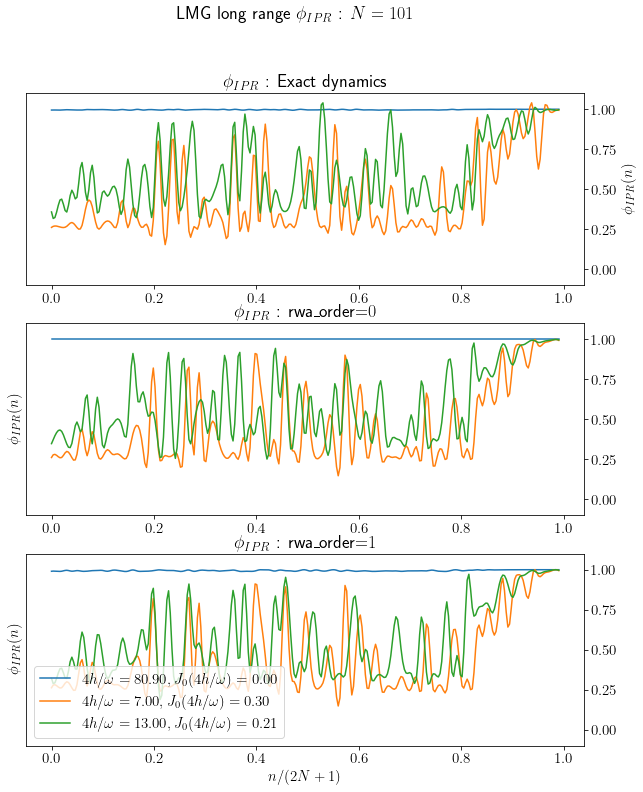

timt taken  1.3502676010131835  minute


In [10]:
import numpy as np
import scipy.linalg as la
from numpy import angle, pi
from qutip import Qobj, propagator, jmat, Options
from multiprocessing import Pool
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.special import j0, jn_zeros, jn
from scipy.interpolate import make_interp_spline
from scipy.signal import savgol_filter
startsss = time.time()
plt.rcParams.update({
    "figure.figsize": (10, 12),"text.usetex": True,"font.family": "sans-serif",
    "font.size": 15,"font.sans-serif": ["Computer Modern"]})

delta = 0.0
freezing_pts = jn_zeros(0,100)+delta

N = 50
h0 = N
omega = 90
nprocs = 10
orders = ['exact', 0, 1]
w = omega
h0, h1, h2, h3 = freezing_pts[0],freezing_pts[int(N/2)], 7.0, 13.0
hs = 1/4*omega * np.array([h1, h2, h3])
etas = 4 * hs/w

p = Pool(processes = nprocs)          
print("running for 2N+1 = ", 2*N+1, "with",nprocs,"processors")  
fig, axs = plt.subplots(len(orders), 1)
fig.suptitle(fr'LMG long range $ \phi_{{IPR}}$ : $N = {2*N+1}$')

for i,order in enumerate(orders):
    print('running for order = ',order)
    if order == 'exact':
        p = Pool(processes = nprocs)         
        #Qutip Solver Options
        opts = Options(nsteps=1e10, num_cpus=1, openmp_threads=1)
        params = [{'h0':h0, 'h':h, 'omega':omega, 'N':N, 'opts':opts} for h in hs]
        f_stateslist = p.map(floq_evolv_exact,tqdm(params, position=0, leave=True))
        
        iprmat = np.zeros((len(hs),2*N+1))
        sx = jmat(N,"x")
        en, st = sx.eigenstates()

        for xx,h in enumerate(hs):
            f_states = f_stateslist[xx]
            iprmat[xx,:] = [np.sum([np.abs(state.overlap(sx_ev))**4 for sx_ev in st]) for state in f_states]
        
        axs[i].set_title(fr'$\phi_{{IPR}}$ : Exact dynamics')
        
        #Freezing point
        idx, = np.where(np.isclose(etas, h1))
        n1 = idx[0]

        #Intermediate IPR
        idx, = np.where(np.isclose(etas, h2))
        n2 = idx[0]
        idx, = np.where(np.isclose(etas, h3))
        n3 = idx[0]

        for j, n in enumerate([n1, n2, n3]):
            xdata = np.arange(2*N+1)/(2*N+1)
            ydata =  iprmat[n]
            xnew = np.linspace(xdata.min(), xdata.max(), 300)
            gfg = make_interp_spline(xdata, ydata, k=3)
            axs[i].plot(xnew, gfg(xnew), label=fr"$4h/\omega={etas[n]:1.2f}, J_0(4h/\omega)={j0(etas[n]):1.2f}$")
            #axs[i].plot(xdata, ydata, label=fr"$4h/\omega={etas[n]:1.2f}, J_0(4h/\omega)={j0(etas[n]):1.2f}$")
            

        #axs[i, 1].set_xlabel(r"$n/(2N+1)$")
        axs[i].yaxis.tick_right()
        axs[i].yaxis.set_label_position("right")
        axs[i].set_ylabel(r"$\phi_{{IPR}}(n)$")
        axs[i].set_ylim(-0.1, 1.1)
        
    else:
        #print('running for order = ',order)
        opts = Options(nsteps=1e10, num_cpus=nprocs)
        params = [{'h0':h0, 'h':h, 'omega':omega, 'N':N, 'order':order, 'opts':opts} for h in hs]
        f_stateslist = p.map(floq_evolv_RWA,tqdm(params, position=0, leave=True))

        iprmat = np.zeros((len(hs),2*N+1))
        sx = jmat(N,"x")
        en, st = sx.eigenstates()


        for xx,h in enumerate(hs):
            f_states = f_stateslist[xx]
            iprmat[xx,:] = [np.sum([np.abs(state.overlap(sx_ev))**4 for sx_ev in st]) for state in f_states]

        axs[i].set_title(fr'$\phi_{{IPR}}$ : rwa_order=${order}$')
        
        #Freezing point
        idx, = np.where(np.isclose(etas, h1))
        n1 = idx[0]

        #Intermediate IPR
        idx, = np.where(np.isclose(etas, h2))
        n2 = idx[0]
        idx, = np.where(np.isclose(etas, h3))
        n3 = idx[0]

        for j, n in enumerate([n1, n2, n3]):
            xdata = np.arange(2*N+1)/(2*N+1)
            ydata =  iprmat[n]
            xnew = np.linspace(xdata.min(), xdata.max(), 300)
            gfg = make_interp_spline(xdata, ydata, k=3)
            axs[i].plot(xnew, gfg(xnew), label=fr"$4h/\omega={etas[n]:1.2f}, J_0(4h/\omega)={j0(etas[n]):1.2f}$")
            #axs[i].plot(xdata, ydata, label=fr"$4h/\omega={etas[n]:1.2f}, J_0(4h/\omega)={j0(etas[n]):1.2f}$")

        #axs[i, 1].set_xlabel(r"$n/(2N+1)$")
        axs[i].yaxis.tick_right()
        axs[i].yaxis.set_label_position("left")
        axs[i].set_ylabel(r"$\phi_{{IPR}}(n)$")
        axs[i].set_ylim(-0.1, 1.1)

lastplot = len(orders)-1
axs[lastplot].set_xlabel(r"$n/(2N+1)$")
plt.legend(loc = 'lower left', fontsize = 15)
figname = 'comprasion_LMG_'+str(N)+'_highFr90_exact_nd_rwa.jpeg'
plt.savefig(figname, dpi = 400)
plt.show()

print('timt taken ', (time.time()-startsss )/60, ' minute')

#### Low frequency regime LMG

running for 2N+1 =  101 with 10 processors
running for order =  exact


100%|███████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 1602.10it/s]


running for order =  0


100%|███████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 3013.15it/s]


running for order =  1


100%|███████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 3120.76it/s]


running for order =  4


100%|███████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 3916.25it/s]


running for order =  7


100%|███████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 2467.72it/s]


timt taken  2.3093222896258037  minute


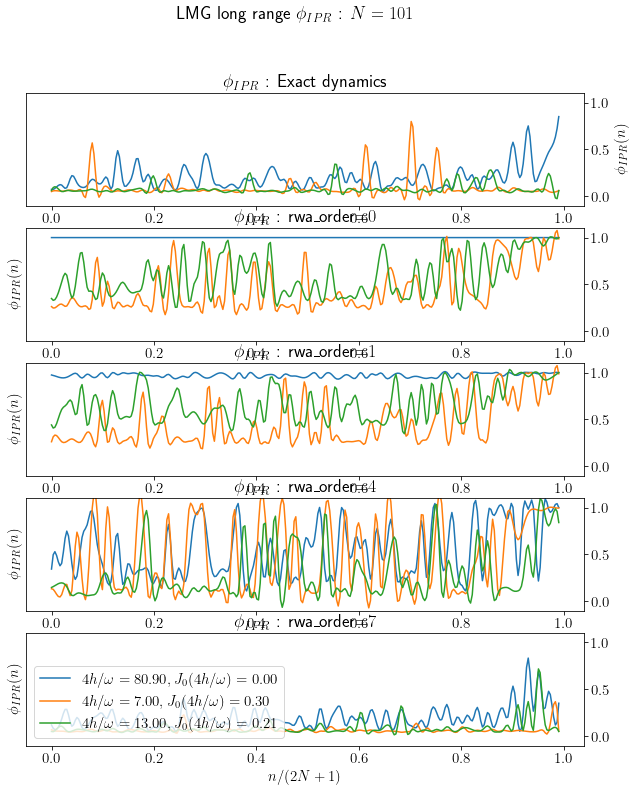

In [27]:
import numpy as np
import scipy.linalg as la
from numpy import angle, pi
from qutip import Qobj, propagator, jmat, Options
from multiprocessing import Pool
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.special import j0, jn_zeros, jn
from scipy.interpolate import make_interp_spline
from scipy.signal import savgol_filter
startsss = time.time()
plt.rcParams.update({
    "figure.figsize": (10, 12),"text.usetex": True,"font.family": "sans-serif",
    "font.size": 15,"font.sans-serif": ["Computer Modern"]})

delta = 0.0
freezing_pts = jn_zeros(0,100)+delta

N = 50
h0 = N
omega = 2.0
nprocs = 10
orders = ['exact', 0, 1, 4, 7]
w = omega
h0, h1, h2, h3 = freezing_pts[0],freezing_pts[int(N/2)], 7.0, 13.0
hs = 1/4*omega * np.array([h1, h2, h3])
etas = 4 * hs/w

p = Pool(processes = nprocs)          
print("running for 2N+1 = ", 2*N+1, "with",nprocs,"processors")  
fig, axs = plt.subplots(len(orders), 1)
fig.suptitle(fr'LMG long range $ \phi_{{IPR}}$ : $N = {2*N+1}$')

for i,order in enumerate(orders):
    print('running for order = ',order)
    if order == 'exact':
        p = Pool(processes = nprocs)         
        #Qutip Solver Options
        opts = Options(nsteps=1e10, num_cpus=1, openmp_threads=1)
        params = [{'h0':h0, 'h':h, 'omega':omega, 'N':N, 'opts':opts} for h in hs]
        f_stateslist = p.map(floq_evolv_exact,tqdm(params, position=0, leave=True))
        
        iprmat = np.zeros((len(hs),2*N+1))
        sx = jmat(N,"x")
        en, st = sx.eigenstates()

        for xx,h in enumerate(hs):
            f_states = f_stateslist[xx]
            iprmat[xx,:] = [np.sum([np.abs(state.overlap(sx_ev))**4 for sx_ev in st]) for state in f_states]
        
        axs[i].set_title(fr'$\phi_{{IPR}}$ : Exact dynamics')
        
        #Freezing point
        idx, = np.where(np.isclose(etas, h1))
        n1 = idx[0]

        #Intermediate IPR
        idx, = np.where(np.isclose(etas, h2))
        n2 = idx[0]
        idx, = np.where(np.isclose(etas, h3))
        n3 = idx[0]

        for j, n in enumerate([n1, n2, n3]):
            xdata = np.arange(2*N+1)/(2*N+1)
            ydata =  iprmat[n]
            xnew = np.linspace(xdata.min(), xdata.max(), 300)
            gfg = make_interp_spline(xdata, ydata, k=3)
            axs[i].plot(xnew, gfg(xnew), label=fr"$4h/\omega={etas[n]:1.2f}, J_0(4h/\omega)={j0(etas[n]):1.2f}$")
            #axs[i].plot(xdata, ydata, label=fr"$4h/\omega={etas[n]:1.2f}, J_0(4h/\omega)={j0(etas[n]):1.2f}$")
            

        #axs[i, 1].set_xlabel(r"$n/(2N+1)$")
        axs[i].yaxis.tick_right()
        axs[i].yaxis.set_label_position("right")
        axs[i].set_ylabel(r"$\phi_{{IPR}}(n)$")
        axs[i].set_ylim(-0.1, 1.1)
        
    else:
        #print('running for order = ',order)
        opts = Options(nsteps=1e10, num_cpus=nprocs)
        params = [{'h0':h0, 'h':h, 'omega':omega, 'N':N, 'order':order, 'opts':opts} for h in hs]
        f_stateslist = p.map(floq_evolv_RWA,tqdm(params, position=0, leave=True))

        iprmat = np.zeros((len(hs),2*N+1))
        sx = jmat(N,"x")
        en, st = sx.eigenstates()


        for xx,h in enumerate(hs):
            f_states = f_stateslist[xx]
            iprmat[xx,:] = [np.sum([np.abs(state.overlap(sx_ev))**4 for sx_ev in st]) for state in f_states]

        axs[i].set_title(fr'$\phi_{{IPR}}$ : rwa_order=${order}$')
        
        #Freezing point
        idx, = np.where(np.isclose(etas, h1))
        n1 = idx[0]

        #Intermediate IPR
        idx, = np.where(np.isclose(etas, h2))
        n2 = idx[0]
        idx, = np.where(np.isclose(etas, h3))
        n3 = idx[0]

        for j, n in enumerate([n1, n2, n3]):
            xdata = np.arange(2*N+1)/(2*N+1)
            ydata =  iprmat[n]
            xnew = np.linspace(xdata.min(), xdata.max(), 300)
            gfg = make_interp_spline(xdata, ydata, k=3)
            axs[i].plot(xnew, gfg(xnew), label=fr"$4h/\omega={etas[n]:1.2f}, J_0(4h/\omega)={j0(etas[n]):1.2f}$")
            #axs[i].plot(xdata, ydata, label=fr"$4h/\omega={etas[n]:1.2f}, J_0(4h/\omega)={j0(etas[n]):1.2f}$")

        #axs[i, 1].set_xlabel(r"$n/(2N+1)$")
        axs[i].yaxis.tick_right()
        axs[i].yaxis.set_label_position("left")
        axs[i].set_ylabel(r"$\phi_{{IPR}}(n)$")
        axs[i].set_ylim(-0.1, 1.1)

lastplot = len(orders)-1
axs[lastplot].set_xlabel(r"$n/(2N+1)$")
plt.legend(loc = 'lower left', fontsize = 15)
figname = 'comprasion_LMG_'+str(N)+'_highFr90_exact_nd_rwa.jpeg'
plt.savefig(figname, dpi = 400)
print('timt taken ', (time.time()-startsss )/60, ' minute')
plt.show()

###  Run the above code in  MPI interface

In [ ]:
%%time
import numpy as np
import scipy.linalg as la
from numpy import angle, pi
from qutip import Qobj, propagator, jmat, Options
from multiprocessing import Pool
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.special import j0, jn_zeros, jn
from scipy.interpolate import make_interp_spline
from scipy.signal import savgol_filter
startsss = time.time()
plt.rcParams.update({
    "figure.figsize": (15, 6),"text.usetex": True,"font.family": "sans-serif",
    "font.size": 15,"font.sans-serif": ["Computer Modern"]})
freezing_pts = jn_zeros(0,100)


nprocs = 4
Ns = np.array([40,60])
omega = 90.0
w = omega
h = 1/4 * omega * freezing_pts[40]
h0 = 2.0
eta = 4*h/w     
opts = Options(nsteps=1e6, num_cpus=1, openmp_threads=1)
params = [{'h0':N, 'h':h, 'omega':w, 'N':N, 'opts':opts} for N in Ns]
p = Pool(processes = nprocs)  
f_stateslist = p.map(floq_evolv_exact,tqdm(params, position=0, leave=True))


for nm, N in enumerate(Ns):
    print('running for N =  ',N)
    iprmat = np.zeros(2*N+1)
    sx = jmat(N,"x")
    en, st = sx.eigenstates()

    f_states = f_stateslist[nm]
    iprmat = [np.sum([np.abs(state.overlap(sx_ev))**4 for sx_ev in st]) for state in f_states]

    plt.title(fr'$\phi_{{IPR}}$ : Exact dynamics')

    xdata = np.arange(2*N+1)/(2*N+1)
    ydata =  iprmat
    #xnew = np.linspace(xdata.min(), xdata.max(), 300)
    #gfg = make_interp_spline(xdata, ydata, k=3)
    #plt.plot(xnew, gfg(xnew), label=fr"$4h/\omega={eta:1.2f}, J_0(4h/\omega)={j0(eta):1.2f}, N={2*N+1:1.2f}$")
    plt.plot(xdata, ydata, label=fr"$4h/\omega={eta:1.2f}, N={N:1.2f}$")

plt.xlabel(r"$n/(2N+1)$")
plt.ylabel(r"$\phi_{{IPR}}(n)$")
#plt.yscale('log')
plt.xlabel(r"$n/(2N+1)$")
plt.legend(loc = 'lower left', fontsize = 15)
figname = 'exact_lowfr_ipr_ns.jpeg'
figname1 = 'exact_lowfr_ipr_ns.svg'
plt.savefig(figname, dpi = 400)
plt.savefig(figname1, dpi = 400)
plt.show()

### Run the above code and plot for average IPR for each N and try to find the pattern of IPR change for N

In [ ]:
%%time
import numpy as np
import scipy.linalg as la
from numpy import angle, pi
from qutip import Qobj, propagator, jmat, Options
from multiprocessing import Pool
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.special import j0, jn_zeros, jn
from scipy.interpolate import make_interp_spline
from scipy.signal import savgol_filter
startsss = time.time()
plt.rcParams.update({
    "figure.figsize": (15, 6),"text.usetex": True,"font.family": "sans-serif",
    "font.size": 15,"font.sans-serif": ["Computer Modern"]})
freezing_pts = jn_zeros(0,100)

Ns = np.arange(80,101,10)
nprocs = len(Ns)
omega = 90.0
w = omega
h = 1/4 * omega * 13.0
h0 = np.sqrt(3)
     
opts = Options(nsteps=1e6, num_cpus=1, openmp_threads=1)
params = [{'h0':h0, 'h':h, 'omega':w, 'N':N, 'opts':opts} for N in Ns]
p = Pool(processes = nprocs)  
f_stateslist = p.map(floq_evolv_exact,tqdm(params, position=0, leave=True))
ydata = np.zeros(len(Ns))

for nm, N in tqdm(enumerate(Ns)):
    #print('running for N =  ',N)
    #sx = 2 * jmat(N,"x")
    #en, st = sx.eigenstates()
    
    sx, sy, sz = jmat(N,"x"), jmat(N,"y"), jmat(N,"z")
    en, st = sx.eigenstates()
    #R = 2/N * sz*sz + h0*sx
    #en, st = R.eigenstates()

    f_states = f_stateslist[nm]
    iprmat = [np.sum([np.abs(state.overlap(sx_ev))**4 for sx_ev in st]) for state in f_states]
    ydata[nm] =  np.average(iprmat)    
    
plt.plot(Ns, ydata, label='simulation')
plt.scatter(Ns, ydata, label='simulation')
plt.plot(Ns, 1/(2*Ns+1), label='analytical')

plt.title(fr'$\phi_{{IPR}}$ : Exact dynamics')
plt.xlabel(r"$N$")
plt.ylabel(r"$\phi_{{IPR}}(n)$")
#plt.yscale('log')
plt.legend(loc = 'upper right', fontsize = 15)
#figname = 'exact_lowfr_ipr_ns.jpeg'
#figname1 = 'exact_lowfr_ipr_ns.svg'
#plt.savefig(figname, dpi = 400)
#plt.savefig(figname1, dpi = 400)
plt.show()

### Now check the quasien energy plot and see if there is any distinct quantum phase change

In [5]:
%%time
import numpy as np
from odeintw import odeintw
import matplotlib.pyplot as plt
from multiprocessing import Pool
from numpy.linalg import multi_dot, norm, eig
from scipy.special import jn_zeros
import math
import time
import tqdm
import h5py
start = time.time()

from collections import Counter
# Bessel's root of first order
# 2.40482555769577	5.52007811028631	8.65372791291101	11.7915344390142	14.9309177084877

freezing_pts = jn_zeros(0, 30)

N = 10
kacN = 2/(N-1)
h0 = np.sqrt(3)
tsteps = 500
steps = 400

#omegas = np.linspace(0.1, 250, steps)

# make logscale data point homogenously distributed
omegas = np.exp(np.linspace(np.log(0.01), np.log(400), steps))
hs = freezing_pts[-1] * omegas/4

wpp = (np.ones((N+1,len(omegas))) * omegas).T
psi = np.eye(N+1) + 1j * np.zeros((N+1,N+1))
H1 = np.zeros((N+1,N+1))

def delta_func(x,y):
        if ( x == y ):
            return 1.0
        else:
            return 0.0
    
def floq_jac(psi0, t, h, h0, H1, H0, w):    
    drive = h0 + h * np.cos(w * t)
    jac = -1j * (H0 + drive * H1)    
    return jac
        
def floq_func(psi0, t, h, h0, H1, H0, w):
    floq_h = np.dot(floq_jac(psi0, t, h, h0, H1, H0, w), psi0)
    return floq_h

def floq_evolv(psi,H0,H1,h0,w):
    T = 2 * np.pi/w                                  
    t = np.linspace(0,T,tsteps)                   
    floqEvolution_mat = np.zeros((N+1,N+1)) + 1j * np.zeros((N+1,N+1))
    h = freezing_pts[-1] * w/4
    
    for m in np.arange(N+1):
        psi0 = psi[m]
        psi_t = odeintw(floq_func,psi0,t,args=(h, h0, H1, H0, w))
        floqEvolution_mat[m] = psi_t[-1]        
    evals, evecs = eig(floqEvolution_mat)
    phasefunc = 1j * np.log(evals + 1j * 0) * w/(2 * np.pi)
    return [w,phasefunc.real,evecs]

if __name__ == '__main__':
    nprocs = 10
    p = Pool(processes = nprocs)          
    print("running for N = ", N, "with",nprocs,"processors")
    start = time.time()       
   
    spin = 0.5 * np.arange(N+1)[-1]
    s = np.arange(-spin,spin+1) 
    H0 = np.diagflat(s **2*kacN)  
    for i in range(N+1):
        for j in range(N+1):
            H1[i][j] = (np.sqrt(spin * (spin+1) - s[i] * (s[i]+1)) * delta_func(s[j],s[i]+1)\
                              + np.sqrt(spin * (spin+1) - s[i] * (s[i]-1)) * delta_func(s[j],s[i]-1))
    
    data1 = p.starmap(floq_evolv,[(psi,H0,H1,h0,w) for w in omegas])
    data = np.asarray(data1,dtype=None).reshape((len(hs),3))
    w_f = data[:,[0]]
    phs_f = data[:,[1]]
    evec_f = data[:,[2]]
    
    ## Save the data in hdf5 files
    
    fname = "quasienergy_logw_N" + str(N+1)+"_" + ".hdf5"
    wdata = np.array(w_f[:,0], dtype= (np.float64))
    phsdata = [phs_f[:,0][i] for i in range(steps)]
    evecdata = [evec_f[:,0][i] for i in range(steps)]

    with h5py.File(fname, 'w') as hf:
        w_f = hf.create_dataset("w_f", np.shape(wdata), data=np.array(wdata))
        phs_f =  hf.create_dataset("phs_f", np.shape(np.array(phsdata)), data=np.array(phsdata))
        evec_f =  hf.create_dataset("evec_f",np.shape(np.array(evecdata)),  data=np.array(evecdata))
        hf.attrs['N'] = N
        hf.attrs['frpt'] = freezing_pts[-1]

running for N =  10 with 10 processors
CPU times: user 186 ms, sys: 96.7 ms, total: 282 ms
Wall time: 4min 3s


<timed exec>:79: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


['evec_f', 'phs_f', 'w_f']


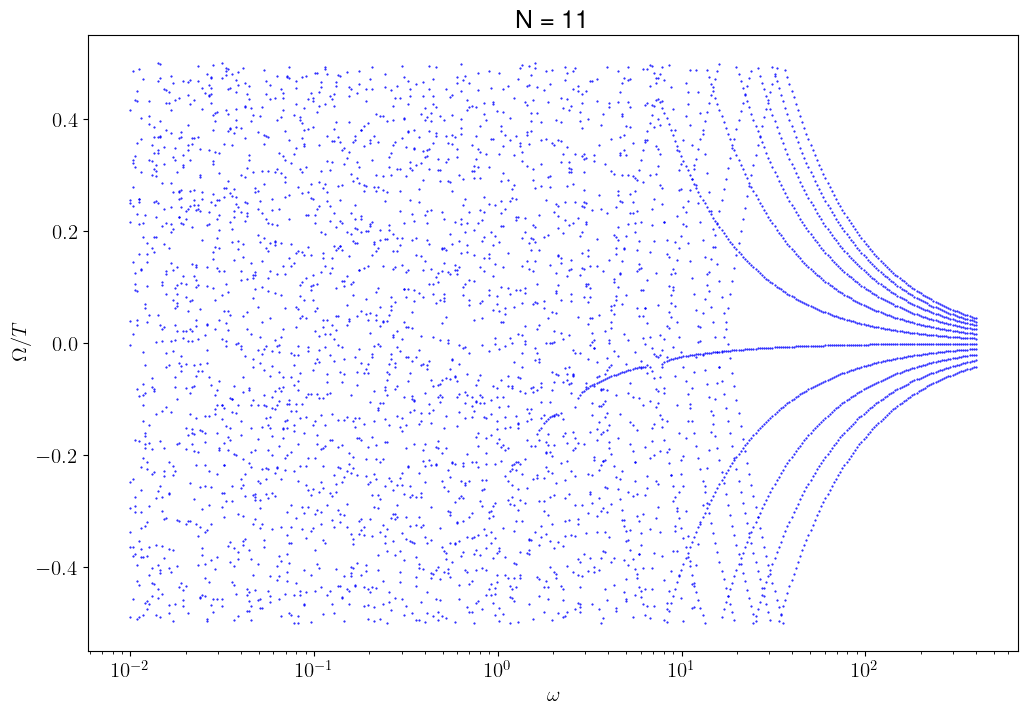

In [7]:
plt.rcParams.update({"figure.figsize": (12,8),"text.usetex": True,"font.family": "sans-serif",
    "font.size": 15,"font.sans-serif": ["Helvetica"]})


## Read the data from hdf5 file

fname = "quasienergy_logw_N11_.hdf5"

with h5py.File(fname, "r") as f:
    print(list(f.keys()))
    a_group_key = list(f.keys())[0]
    b_group_key = list(f.keys())[1]
    c_group_key = list(f.keys())[2]

    evecf = f[a_group_key][()] 
    phsf = f[b_group_key][()] 
    wf = f[c_group_key][()] 
    N = f.attrs['N']
    frzp = f.attrs['frpt']

## Plot the data

for i in range(steps):
    plt.scatter(wf[i]*np.ones(N+1), phsf[i]/wf[i], color = 'blue', marker='.', s = 1.0)

title = 'N = ' + str(N+1)
plt.title(title)
plt.xscale('log')
plt.xlabel(fr"$\omega$")
plt.ylabel(fr"$\Omega/T$")
figname = 'quasienergyT_w_xlog_N' + str(N) + '.jpeg'
plt.savefig(figname, dpi= 300)
plt.show()

### Phase Crossover : qusi-energy distribution

In [ ]:
!rm file_phasetran.txt

import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool
from scipy.special import jn_zeros, j0
import math
from qutip import Options
from functions_needed import*
import h5py, time
freezing_pts = jn_zeros(0, 500)
start = time.time()

Ns = [2,100]
ostp = [1e4, 1e8]
frz_jnth = [5,5]

# which number of floquet mode we take
nth = 0           
# number of freezing point
#frz_nth = 20
h0 = np.sqrt(3)/2**4
ws = np.exp(np.linspace(np.log(.1), np.log(100), 40))

ws1 = np.exp(np.linspace(np.log(0.01), np.log(0.1), 4))
ws2 = np.exp(np.linspace(np.log(0.2), np.log(0.9), 10))
ws3 = np.exp(np.linspace(np.log(1.0), np.log(30.0), 20))
ws4 = np.exp(np.linspace(np.log(35.0), np.log(200), 5))
#ws = np.concatenate((ws1,ws2,ws3,ws4))

if __name__ == '__main__':
    nprocs = 8
    #opts = Options(nsteps=1e4)    
    
    for nn,N in enumerate(Ns):
        start1 = time.time()
        opts = Options(nsteps = ostp[nn])
        frz_nth = frz_jnth[nn] 
        params = [{'h0':h0, 'h': 1/4 * w * freezing_pts[frz_nth], 'omega':w, 'N':N, 'opts':opts} for w in ws]
        p = Pool(processes = nprocs)  

        data = np.array(p.map(floq_evolv_exact_sten,params))

        w_f = np.array(data[:,0])
        evec_ff = np.array(data[:,1])
        phs_f = np.array(data[:,2])

        evec_f = np.array([np.array([np.array(evec_ff[j][i])[:,0].real for i in range(int(2*N+1))]) for j in range(len(ws))])

        evals_single_path = np.zeros(len(ws))
        iprmat_single_path = np.zeros(len(ws))
        iprmat = np.zeros((len(ws),2*N+1))

        sx = jmat(N,"x")
        en, st = sx.eigenstates()

        for xx,w in enumerate(ws):
            #Get the previous Floquet Eigensystem
            if xx == 0:
                evals_prev = phs_f[xx].real
                evecs_prev = evec_f[xx]
            else:
                evals_prev = phs_f[xx-1].real
                evecs_prev = evec_f[xx-1]

            #Sort the Floquet states of this itertaion accordingly to orthonormality with the previous ones
            evals_curr = phs_f[xx]
            evecs_curr = evec_f[xx]
            t = np.copy(evecs_curr)
            condition = np.abs(np.around(evecs_prev.T.conj() @ evecs_curr, 1))
            evals_curr = evals_curr[np.argmax(condition, axis=1)]        
            evecs_curr = evecs_curr[:,np.argmax(condition, axis=1)]

            evals_single_path[xx] = evals_curr[nth]

            f_states = evec_f[xx]
            iprmat[xx,:] = [np.sum([np.abs(Qobj(state).overlap(sx_ev))**4 for sx_ev in st], axis=-1) for state in f_states]

            iprmat_single_path[xx] = iprmat[xx,:][nth]
               
        # save the data
        filename = 'phase_transition_11N' + str(N) +'_.hdf5'

        with h5py.File(filename, 'w') as hf:
            hf.create_dataset('ws', np.shape(ws), data=ws)
            hf.create_dataset('evals_single_path', np.shape(evals_single_path), data=evals_single_path)
            hf.create_dataset('iprmat_single_path', np.shape(iprmat_single_path), data=iprmat_single_path)
            hf.attrs['N'] = N
            hf.attrs['frz_nth'] = frz_nth
            hf.attrs['nth'] = nth
        
        print("For N = ", N, "with", nprocs, "processors : time taken ", (time.time()-start1)/60, ' minutes !')
    print('\n run complete!! \n\n TOTAL TIME TAKEN :', (time.time()-start)/60, ' minutes !')

In [2]:
!rm file_phasetran.txt
!ls phase_transition_11* > file_phasetran.txt
!cat file_phasetran.txt

rm: cannot remove 'file_phasetran.txt': No such file or directory
phase_transition_11N100_.hdf5
phase_transition_11N10_.hdf5
phase_transition_11N20_.hdf5
phase_transition_11N30_.hdf5
phase_transition_11N40_.hdf5
phase_transition_11N50_.hdf5


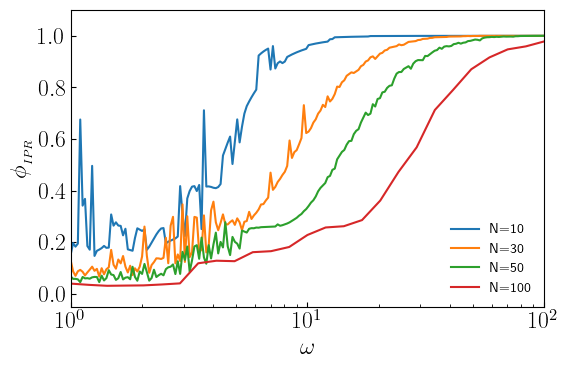

CPU times: user 346 ms, sys: 138 ms, total: 483 ms
Wall time: 3.08 s


In [26]:
%%time
import matplotlib.pyplot as plt
import h5py

plt.rcParams.update({ "figure.figsize": (6, 4),"text.usetex": True,"font.family": "sans-serif",
    "font.size": 17, "font.sans-serif": ["Computer Modern"]})


with open("file_phasetran.txt", 'r') as fp:
    lines = fp.readlines()
    x = len(lines)
    for i in range(0,x):
        filename = lines[i][:-1]
        with h5py.File(filename, 'r') as f:    
            ws = f['ws'][()]
            evals_single_path = f['evals_single_path'][()]
            iprmat_single_path = f['iprmat_single_path'][()]
            N = f.attrs['N']
            
            lbl = 'N=' + str(N)
            plt.plot(ws, iprmat_single_path, label = lbl)
            plt.ylabel(r"$\phi_{{_{{IPR}}}}$")
            plt.xlabel(r"$\omega$")
            plt.ylim(-0.05,1.1)
            plt.xlim(1,ws[-1])
            plt.xscale('log')
            
    figname= "phase_dynam1.jpeg" 
    
    plt.tick_params(which='both',axis="x", direction="in")
    plt.tick_params(axis="y", direction="in")
    plt.tight_layout()
    plt.legend(frameon = False, loc = 4,fontsize= 10)
    #plt.savefig(figname,dpi=600)
    plt.show()

## Phase Transition : Ising Model

In [29]:
%%time
import numpy as np
from qutip import tensor, sigmax, sigmay, sigmaz, qeye, mesolve 
from qutip.floquet import floquet_modes
from scipy.special import j0, jn_zeros
freezing_pts = jn_zeros(0, 5)

def drive(t, args):
    h0 = args['h0']
    h = args['h']
    w = args['omega']
    return h0 + h * np.cos(w * t)

def get_floquet_isingfermion(args, **kwargs):
    k = args['k']
    T = 2 * np.pi/args['omega']
    sx = sigmax()
    sz = sigmaz()
    
    # construct the hamiltonian
    H0 = np.sin(k) * sx + np.cos(k) * sz
    H1 = sz
    H = [H0,[H1,drive]]    
    
    return floquet_modes(H, T, args, **kwargs)

def get_iprvals_exact(w, k, **kwargs):
    params = {'h0':0.0, 'h':freezing_pts[0]*w/2.0, 'k':k,'omega':w}
    
    f_states, f_energies = get_floquet_isingfermion(params, **kwargs)
    floquet_matrix = np.array(f_states)[:,:,0]
    return np.sum(np.abs(floquet_matrix)**4, axis=-1)

CPU times: user 77.9 ms, sys: 28.3 ms, total: 106 ms
Wall time: 207 ms


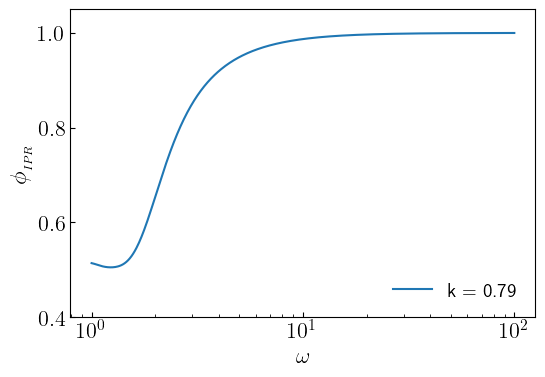

CPU times: user 1.5 s, sys: 7.73 ms, total: 1.51 s
Wall time: 1.51 s


In [38]:
%%time
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j0, jn_zeros
import traceback

plt.rcParams.update({ "figure.figsize": (6, 4),"text.usetex": True,"font.family": "sans-serif",
    "font.size": 16, "font.sans-serif": ["Computer Modern"]})
freezing_pts = jn_zeros(0, 5)

omegas = np.exp(np.linspace(np.log(1), np.log(100), 500))
delta = 1e-4
ks = [np.pi/4]

for k in ks:
    iprvals_exact = np.array([get_iprvals_exact(w, k, sort=True) for w in omegas])
    plt.plot(omegas, iprvals_exact[:,0], label = fr"k = {k:1.2f}")

#plt.title(fr'Phase transition: Ising' )
plt.xscale('log')
plt.xlabel(r'$\omega$')
plt.ylabel(r"$\phi_{{_{{IPR}}}}$", fontsize = 17)
plt.legend(frameon = False, loc=4, fontsize = 14)
plt.ylim(0.4,1.05)
plt.tick_params(which='both',axis="x", direction="in")
plt.tick_params(which='both',axis="y", direction="in")

#plt.savefig('phase_transition_ising.jpeg', dpi = 600)
plt.show()

### Ising Exact

In [115]:
%%time
import numpy as np
from qutip import tensor, sigmax, sigmay, sigmaz, qeye, mesolve 
from qutip.floquet import floquet_modes
from scipy.special import j0

def drive(t, args):
    h0 = args['h0']
    h = args['h']
    w = args['omega']
    return h0 + h * np.cos(w * t)

def get_floquet_isingfermion(k, args, **kwargs):
    
    sx = sigmax()
    sz = sigmaz()
    
    # construct the hamiltonian
    H0 = np.sin(k) * sx + np.cos(k) * sz
    H1 = sz
    
    H = [H0,[H1,drive]]    
    T = 2 * np.pi/args['omega']

    return floquet_modes(H, T, args, **kwargs)

def get_iprvals_exact(k, params, **kwargs):
    f_states, f_energies = get_floquet_isingfermion(k, params, **kwargs)
    floquet_matrix = np.array(f_states)[:,:,0]
    return np.sum(np.abs(floquet_matrix)**4, axis=-1)

CPU times: user 43 µs, sys: 3 µs, total: 46 µs
Wall time: 49.6 µs


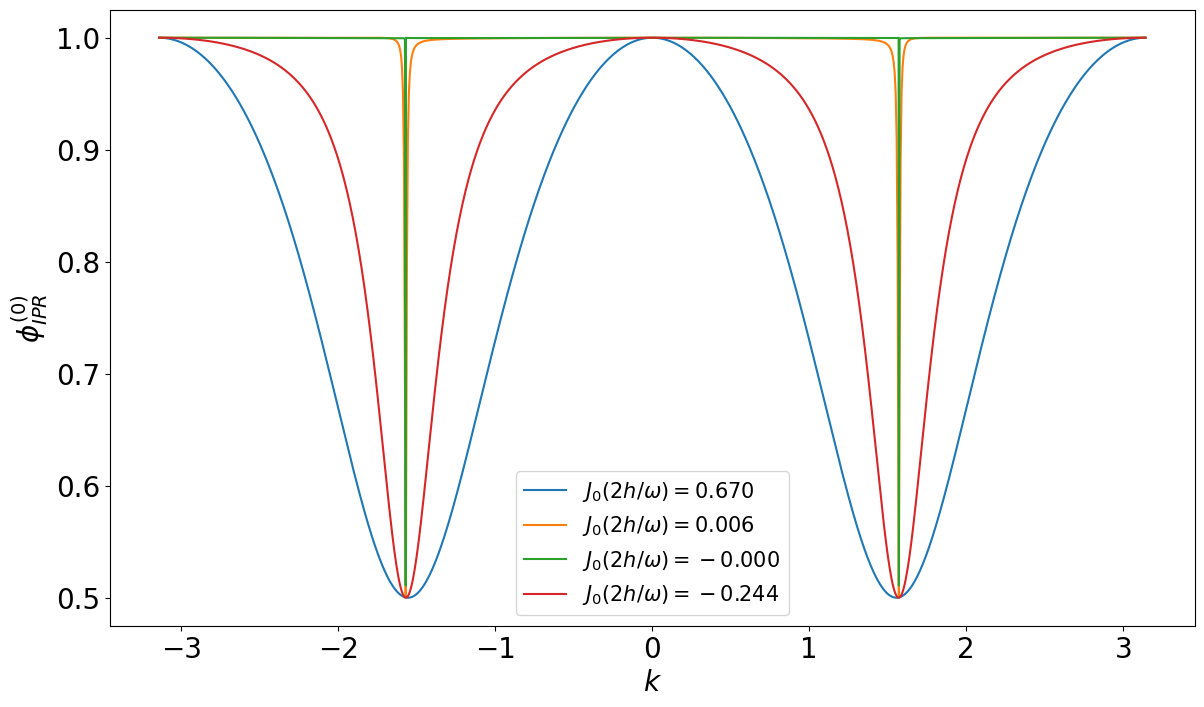

CPU times: user 15.2 s, sys: 623 ms, total: 15.8 s
Wall time: 15.3 s


In [116]:
%%time
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.special import j0, jn_zeros
from tqdm import tqdm
import traceback

plt.rcParams.update({
    "figure.figsize": (14, 8),
    "text.usetex": False,
    "font.size": 20})

freezing_pts = jn_zeros(0, 5)
max_pts = jn_zeros(1,5)

#
# set up the calculation
#
omega = 90.0
w = omega
hfrz = omega * freezing_pts/2
hmed = 0.995 * omega * freezing_pts/2
hmax = 1.25 * omega * max_pts/2
hfin = 0.5 * omega * freezing_pts/2


delta = 1e-4
fbz = np.linspace(-np.pi+delta, np.pi-delta, 1000)
aa = [-np.pi/2.0,np.pi/2.0]
fbz = np.sort(np.append(fbz,aa))

for h in np.sort([hfrz[0], hmed[0], hmax[0], hfin[0]]):
    params = {'h0':0.0, 'h':h, 'omega':omega}
    iprvals_exact = np.array([get_iprvals_exact(k, params, sort=True) for k in fbz])
    plt.plot(fbz, iprvals_exact[:,0], label=fr"$J_0(2h/\omega)={j0(2*h/w):1.3f}$")

plt.ylabel(f'$\phi^{{({{0}})}}_{{IPR}}$')
plt.xlabel(r'$k$')
plt.legend(fontsize = 15)
plt.savefig('ising_exact.jpeg', dpi = 800)
plt.show()